installed dbplyr", version = "2.3.4" because of error in the last version

In [1]:
setwd('/home/thlamp/tcga/bladder_results')

In [2]:
library(TCGAbiolinks)
library(SummarizedExperiment)
library(sesameData)
library(sesame)
library(dbplyr)
library(ggplot2)
library(survminer)
library(pheatmap)
library(dplyr)
library(biomaRt)
library(DESeq2)
library(MOFA2)
library(MOFAdata)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

In [1]:
library(DMRcate)

Loading required package: minfi

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading

# mRNA

In [8]:
# Download only these cases that are about TP ορ ΝΤ

query <- GDCquery(project = "TCGA-BLCA",data.category = "Transcriptome Profiling",data.type = "Gene Expression Quantification", 
    workflow.type = "STAR - Counts", access = "open", sample.type = c("Primary Tumor","Solid Tissue Normal"))

GDCdownload(query = query)

dataPrep <- GDCprepare(query = query,save = TRUE)

# Which samples are Primary Tumor
samples.primary.tumour <- dataPrep$barcode[dataPrep$shortLetterCode == "TP"]

# which samples are solid tissue normal
samples.solid.tissue.normal <- dataPrep$barcode[dataPrep$shortLetterCode == "NT"]

saveRDS(dataPrep, file = "downloaded_dataPrep.rds")
saveRDS(samples.primary.tumour,"samples_primary_tumour.rds")
saveRDS(samples.solid.tissue.normal,"samples_solid_tissue_normal.rds")

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-BLCA

--------------------

oo Filtering results

--------------------

ooo By access

ooo By data.type

ooo By workflow.type

ooo By sample.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------


GDCdownload will download 431 files. A total of 1.823682535 GB

The total size of files is big. We will download files in chunks




Downloading: 240 MB     

|====================================================|100%                      Completed after 15 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

blca subtype information from:doi:10.1016/j.cell.2017.09.007

Available assays in SummarizedExperiment : 
  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand

=> Saving file: TCGA-BLCATranscriptome_ProfilingSat_Mar__2_19:49:34_2024.RData

=> File saved



In [52]:
# samples.primary.tumour <- readRDS("samples_primary_tumour.rds")
# samples.solid.tissue.normal <- readRDS("samples_solid_tissue_normal.rds")
dataPrep <- readRDS("downloaded_dataPrep.rds")

In [53]:
dataPrep

class: RangedSummarizedExperiment 
dim: 60660 431 
metadata(1): data_release
assays(6): unstranded stranded_first ... fpkm_unstrand fpkm_uq_unstrand
rownames(60660): ENSG00000000003.15 ENSG00000000005.6 ...
  ENSG00000288674.1 ENSG00000288675.1
rowData names(10): source type ... hgnc_id havana_gene
colnames(431): TCGA-CU-A3KJ-01A-11R-A21D-07
  TCGA-K4-A3WU-01B-11R-A23N-07 ... TCGA-E7-A6MD-01A-41R-A352-07
  TCGA-ZF-A9R5-01A-12R-A42T-07
colData names(239): barcode patient ... paper_Fusion in TNFRSF21
  paper_Fusion in ASIP

## Raw data

In [169]:
data_matrix <- TCGAanalyze_Preprocessing(object = dataPrep,datatype = "unstranded") 
# saveRDS(data_matrix,"raw_data_matrix.rds")

Number of outliers: 0



In [170]:
head(data_matrix, 2)

,TCGA-2F-A9KO-01A-11R-A38B-07,TCGA-2F-A9KP-01A-11R-A38B-07,TCGA-2F-A9KQ-01A-11R-A38B-07,TCGA-2F-A9KR-01A-11R-A38B-07,TCGA-2F-A9KT-01A-11R-A38B-07,TCGA-2F-A9KW-01A-11R-A38B-07,TCGA-4Z-AA7M-01A-11R-A39I-07,TCGA-4Z-AA7N-01A-11R-A39I-07,TCGA-4Z-AA7O-01A-31R-A39I-07,TCGA-4Z-AA7Q-01A-11R-A39I-07,⋯,TCGA-CU-A0YR-11A-13R-A10U-07,TCGA-GC-A3BM-11A-11R-A22U-07,TCGA-GC-A3WC-11A-11R-A22U-07,TCGA-GC-A6I3-11A-11R-A31N-07,TCGA-GD-A2C5-11A-11R-A180-07,TCGA-GD-A3OP-11A-11R-A220-07,TCGA-GD-A3OQ-11A-21R-A220-07,TCGA-K4-A3WV-11A-21R-A22U-07,TCGA-K4-A54R-11A-11R-A26T-07,TCGA-K4-A5RI-11A-11R-A28M-07
ENSG00000000003.15,6074,11615,5414,4368,3313,2648,8417,2536,7920,3733,⋯,1407,4122,2205,3553,13687,10006,10494,9246,4371,3390
ENSG00000000005.6,0,4,1,1,0,0,4,2,0,0,⋯,42,6,12,0,5,3,4,6,11,5


## DESeq2 for MOFA

In [253]:
# Create a DESeqDataSet object
dds <- DESeqDataSetFromMatrix(countData = assay(dataPrep,"unstranded"),
                              colData = colData(dataPrep),
                              design = ~ shortLetterCode)

# Estimate size factors
dds <- estimateSizeFactors(dds)

# Perform variance-stabilizing transformation with design information
vsd <- varianceStabilizingTransformation(dds, blind = FALSE)

# Extract the normalized counts
normalized_counts <- assay(vsd)

head(normalized_counts, 2)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


,TCGA-CU-A3KJ-01A-11R-A21D-07,TCGA-K4-A3WU-01B-11R-A23N-07,TCGA-DK-A3IU-01A-11R-A20F-07,TCGA-GV-A40G-01A-11R-A23N-07,TCGA-DK-A3IN-01A-11R-A20F-07,TCGA-SY-A9G0-01A-12R-A38B-07,TCGA-XF-A9SU-01A-31R-A39I-07,TCGA-UY-A78O-01A-12R-A33J-07,TCGA-GD-A2C5-01A-12R-A180-07,TCGA-G2-A2EK-01A-22R-A18C-07,⋯,TCGA-DK-A1AD-01A-11R-A13Y-07,TCGA-XF-AAMJ-01A-11R-A42T-07,TCGA-DK-A1A6-01A-11R-A13Y-07,TCGA-XF-AAN2-01A-11R-A42T-07,TCGA-GU-A42Q-01A-11R-A23W-07,TCGA-GC-A4ZW-01A-11R-A26T-07,TCGA-XF-AAMY-01A-11R-A42T-07,TCGA-XF-AAN7-01A-11R-A42T-07,TCGA-E7-A6MD-01A-41R-A352-07,TCGA-ZF-A9R5-01A-12R-A42T-07
ENSG00000000003.15,11.0550661,13.948765,9.546326,12.952404,12.0431342,11.074673,12.429122,13.645186,13.040419,13.7640291,⋯,14.401186,12.2145779,13.13209,11.349758,9.8527139,12.6923794,12.790391,11.613530,12.278166,13.768165
ENSG00000000005.6,0.9656929,3.917102,1.864089,2.327022,0.9656929,3.082569,2.600421,2.039279,2.188613,0.9656929,⋯,3.012336,0.9656929,1.84750,2.641802,0.9656929,0.9656929,3.445115,9.286095,3.890358,2.283959


## Remove patient duplicate with the most zeros in the column, for every patient with duplicates

In [7]:
duplicates_index_to_remove <- function(patient,input_matrix) {
  # for every element in patient search colnames that start with this sample id, whih are from duplicated samples 
  duplicated_columns <- colnames(input_matrix)[grep(patient, colnames(input_matrix))]
    
  # Count zeros in the specified columns
  zero_counts <- colSums(input_matrix[, duplicated_columns] == 0)
  print(zero_counts)

  # find which column for every duplicated sample has more zeros
  index_of_larger_number <- which.max(zero_counts)

  # Find the index from the matrix, of the column with more zeros to remove
  column_index_to_remove <- which(colnames(input_matrix) %in% duplicated_columns[index_of_larger_number])

  return (column_index_to_remove)
}

In [8]:
# find duplicated samples in colData(dataPrep)
patient_duplicates <- colData(dataPrep)$sample[which(duplicated(colData(dataPrep)$sample))]

# use function duplicates_index_to_remove for every element in patient_duplicates
patient_duplicates_to_remove <- sapply(patient_duplicates, duplicates_index_to_remove, input_matrix = data_matrix)

print("Index of duplicates with the most zeros per patient with duplicates")
patient_duplicates_to_remove

print("The names of the columns that will be removed")
colnames(data_matrix)[patient_duplicates_to_remove]

TCGA-BL-A13J-01A-11R-A10U-07 TCGA-BL-A13J-01A-11R-A277-07 
                       31629                        22987 
TCGA-BL-A13I-01A-11R-A13Y-07 TCGA-BL-A13I-01A-11R-A277-07 
                       31291                        39927 
TCGA-BL-A0C8-01A-11R-A10U-07 TCGA-BL-A0C8-01A-11R-A277-07 
                       29242                        23308 
[1] "Index of duplicates with the most zeros per patient with duplicates"


TCGA-BL-A13J-01A TCGA-BL-A13I-01A TCGA-BL-A0C8-01A 
              31               29               25

[1] "The names of the columns that will be removed"


[1] "TCGA-BL-A13J-01A-11R-A10U-07" "TCGA-BL-A13I-01A-11R-A277-07"
[3] "TCGA-BL-A0C8-01A-11R-A10U-07"

In [9]:
# Remove the specified-duplicated columns
data_matrix <- data_matrix[, -patient_duplicates_to_remove, drop = FALSE]
dim(data_matrix)

[1] 60660   428

## Check for rows that have only 0 or NA/NaN, there isn't None in R, instead of this is NULL, but rows with NULL can't appear in matrix

In [7]:
# TRUE if matrix contains any NAs/NaNs
any(is.na(data_matrix))
any(is.nan(data_matrix))

# Get indices of non-numeric
which(is.na(as.numeric(data_matrix)))

[1] FALSE

[1] FALSE

integer(0)

In [8]:
is_all_zeros_or_na <- function(value) {all(value == 0 | is.na(value))}

# Checking for rows where all elements are zeros
rows_with_all_zeros <- apply(data_matrix, 1, is_all_zeros_or_na)

# Counting the number of columns with all zeros
num_columns_with_all_zeros <- sum(rows_with_all_zeros)

num_columns_with_all_zeros

[1] 3141

### A matrix in R can only hold one type of data, if first element is integer, then all the elements in this matrix are integers

In [9]:
typeof(data_matrix[1,1])

[1] "integer"

## dataPrep metadata

In [14]:
# see information that are related with columns
# colData(dataPrep)

DataFrame with 431 rows and 238 columns
                                            barcode      patient
                                        <character>  <character>
TCGA-E7-A678-01A-11R-A30C-07 TCGA-E7-A678-01A-11R.. TCGA-E7-A678
TCGA-UY-A9PB-01A-11R-A38B-07 TCGA-UY-A9PB-01A-11R.. TCGA-UY-A9PB
TCGA-DK-A3IN-01A-11R-A20F-07 TCGA-DK-A3IN-01A-11R.. TCGA-DK-A3IN
TCGA-DK-A3IV-01A-22R-A21D-07 TCGA-DK-A3IV-01A-22R.. TCGA-DK-A3IV
TCGA-XF-A9T4-01A-11R-A39I-07 TCGA-XF-A9T4-01A-11R.. TCGA-XF-A9T4
...                                             ...          ...
TCGA-DK-AA6X-01A-12R-A42T-07 TCGA-DK-AA6X-01A-12R.. TCGA-DK-AA6X
TCGA-E7-A8O7-01A-11R-A36F-07 TCGA-E7-A8O7-01A-11R.. TCGA-E7-A8O7
TCGA-E7-A7PW-01A-11R-A352-07 TCGA-E7-A7PW-01A-11R.. TCGA-E7-A7PW
TCGA-FD-A6TH-01A-11R-A32O-07 TCGA-FD-A6TH-01A-11R.. TCGA-FD-A6TH
TCGA-BT-A20T-01A-11R-A14Y-07 TCGA-BT-A20T-01A-11R.. TCGA-BT-A20T
                                       sample shortLetterCode
                                  <character>     <ch

In [12]:
#take all the information that are related with rows
# head(rowData(dataPrep))
row_data<-rowData(dataPrep)

## TPM

In [11]:
data_matrix <- TCGAanalyze_Preprocessing(object = dataPrep,datatype = "tpm_unstrand") 

Number of outliers: 0



In [12]:
head(data_matrix, 2)

,TCGA-2F-A9KO-01A-11R-A38B-07,TCGA-2F-A9KP-01A-11R-A38B-07,TCGA-2F-A9KQ-01A-11R-A38B-07,TCGA-2F-A9KR-01A-11R-A38B-07,TCGA-2F-A9KT-01A-11R-A38B-07,TCGA-2F-A9KW-01A-11R-A38B-07,TCGA-4Z-AA7M-01A-11R-A39I-07,TCGA-4Z-AA7N-01A-11R-A39I-07,TCGA-4Z-AA7O-01A-31R-A39I-07,TCGA-4Z-AA7Q-01A-11R-A39I-07,⋯,TCGA-CU-A0YR-11A-13R-A10U-07,TCGA-GC-A3BM-11A-11R-A22U-07,TCGA-GC-A3WC-11A-11R-A22U-07,TCGA-GC-A6I3-11A-11R-A31N-07,TCGA-GD-A2C5-11A-11R-A180-07,TCGA-GD-A3OP-11A-11R-A220-07,TCGA-GD-A3OQ-11A-21R-A220-07,TCGA-K4-A3WV-11A-21R-A22U-07,TCGA-K4-A54R-11A-11R-A26T-07,TCGA-K4-A5RI-11A-11R-A28M-07
ENSG00000000003.15,108.0135,186.7056,72.4201,73.9806,76.9549,49.0722,159.5696,69.2064,155.7212,50.5693,⋯,27.3519,66.9105,39.2798,56.5882,152.7241,105.0533,125.2822,149.4164,77.840,48.6603
ENSG00000000005.6,0.0000,0.1976,0.0411,0.0521,0.0000,0.0000,0.2330,0.1677,0.0000,0.0000,⋯,2.5092,0.2993,0.6569,0.0000,0.1715,0.0968,0.1468,0.2980,0.602,0.2206


In [6]:
saveRDS(data_matrix, file = "data_matrix.rds")

In [13]:
data_matrix <- readRDS("data_matrix.rds")

## Max value of matrix

In [70]:
which(data_matrix == max(data_matrix), arr.ind = TRUE)
colnames(data_matrix)[26]
data_matrix[53692,26]

,row,col
ENSG00000276168.1,53692,26


[1] "TCGA-BL-A0C8-01A-11R-A277-07"

[1] 319762.4

## Remove patient duplicate with the most zeros in the column, for every patient with duplicates

In [13]:
# find duplicated samples in colData(dataPrep)
patient_duplicates <- colData(dataPrep)$sample[which(duplicated(colData(dataPrep)$sample))]

# use function duplicates_index_to_remove for every element in patient_duplicates
patient_duplicates_to_remove <- sapply(patient_duplicates, duplicates_index_to_remove, input_matrix = data_matrix)

print("Index of duplicates with the most zeros per patient with duplicates")
patient_duplicates_to_remove

print("The names of the columns that will be removed")
colnames(data_matrix)[patient_duplicates_to_remove]

TCGA-BL-A13J-01A-11R-A10U-07 TCGA-BL-A13J-01A-11R-A277-07 
                       31629                        22987 
TCGA-BL-A13I-01A-11R-A13Y-07 TCGA-BL-A13I-01A-11R-A277-07 
                       31291                        39927 
TCGA-BL-A0C8-01A-11R-A10U-07 TCGA-BL-A0C8-01A-11R-A277-07 
                       29242                        23308 
[1] "Index of duplicates with the most zeros per patient with duplicates"


TCGA-BL-A13J-01A TCGA-BL-A13I-01A TCGA-BL-A0C8-01A 
              31               29               25

[1] "The names of the columns that will be removed"


[1] "TCGA-BL-A13J-01A-11R-A10U-07" "TCGA-BL-A13I-01A-11R-A277-07"
[3] "TCGA-BL-A0C8-01A-11R-A10U-07"

In [14]:
# Remove the specified-duplicated columns
data_matrix <- data_matrix[, -patient_duplicates_to_remove, drop = FALSE]
dim(data_matrix)

[1] 60660   428

## Check for rows that have only 0 or NA/NaN, there isn't None in R, instead of this is NULL, but rows with NULL can't appear in matrix

In [77]:
# TRUE if matrix contains any NAs/NaNs
any(is.na(data_matrix))
any(is.nan(data_matrix))

# Get indices of non-numeric
which(is.na(as.numeric(data_matrix)))

[1] FALSE

[1] FALSE

integer(0)

In [72]:
is_all_zeros_or_na <- function(value) {all(value == 0 | is.na(value))}

# Checking for rows where all elements are zeros
rows_with_all_zeros <- apply(data_matrix, 1, is_all_zeros_or_na)

# Counting the number of columns with all zeros
num_columns_with_all_zeros <- sum(rows_with_all_zeros)

num_columns_with_all_zeros

[1] 3141

### A matrix in R can only hold one type of data, if first element is integer/double, then all the elements in this matrix are integers/doubles

In [51]:
typeof(data_matrix[1,1])

[1] "double"

## Convert gene ids with version to stable ids

In [94]:
# Create a df with a column with old rownames (ensembl_gene_id with version)
check_df <- data.frame( old_rownames = rownames(data_matrix))

# Remove characters after .
rownames(data_matrix) <- gsub("\\..*","", rownames(data_matrix))

# Create a df with a column with old rownames (stable id) in order to check the replacement
check_df$new_rownames <- rownames(data_matrix)
head(check_df)

,old_rownames,new_rownames
,<chr>,<chr>
1,ENSG00000000003.15,ENSG00000000003
2,ENSG00000000005.6,ENSG00000000005
3,ENSG00000000419.13,ENSG00000000419
4,ENSG00000000457.14,ENSG00000000457
5,ENSG00000000460.17,ENSG00000000460
6,ENSG00000000938.13,ENSG00000000938


In [96]:
# Count characters in new_rownames column to see if all the elements have the same length
character_counts <- nchar(check_df$new_rownames)
unique(character_counts)

[1] 15

In [95]:
head(data_matrix)

,TCGA-2F-A9KO-01A-11R-A38B-07,TCGA-2F-A9KP-01A-11R-A38B-07,TCGA-2F-A9KQ-01A-11R-A38B-07,TCGA-2F-A9KR-01A-11R-A38B-07,TCGA-2F-A9KT-01A-11R-A38B-07,TCGA-2F-A9KW-01A-11R-A38B-07,TCGA-4Z-AA7M-01A-11R-A39I-07,TCGA-4Z-AA7N-01A-11R-A39I-07,TCGA-4Z-AA7O-01A-31R-A39I-07,TCGA-4Z-AA7Q-01A-11R-A39I-07,⋯,TCGA-CU-A0YR-11A-13R-A10U-07,TCGA-GC-A3BM-11A-11R-A22U-07,TCGA-GC-A3WC-11A-11R-A22U-07,TCGA-GC-A6I3-11A-11R-A31N-07,TCGA-GD-A2C5-11A-11R-A180-07,TCGA-GD-A3OP-11A-11R-A220-07,TCGA-GD-A3OQ-11A-21R-A220-07,TCGA-K4-A3WV-11A-21R-A22U-07,TCGA-K4-A54R-11A-11R-A26T-07,TCGA-K4-A5RI-11A-11R-A28M-07
ENSG00000000003,6074,11615,5414,4368,3313,2648,8417,2536,7920,3733,⋯,1407,4122,2205,3553,13687,10006,10494,9246,4371,3390
ENSG00000000005,0,4,1,1,0,0,4,2,0,0,⋯,42,6,12,0,5,3,4,6,11,5
ENSG00000000419,3065,2649,1977,2053,2920,2037,2682,1096,1160,1292,⋯,1013,1560,1219,1206,2765,2472,1832,1556,1576,1857
ENSG00000000457,1085,821,971,872,410,514,1014,279,806,880,⋯,499,368,505,375,580,645,1250,747,310,569
ENSG00000000460,688,819,365,334,272,859,1553,163,676,440,⋯,113,174,114,367,350,159,272,265,121,88
ENSG00000000938,436,115,310,584,361,339,175,420,255,704,⋯,460,472,444,777,1061,999,693,322,558,1594


## DEA

In [47]:
dataDEGs <- TCGAanalyze_DEA(mat1 = data_matrix[,samples.primary.tumour],mat2 = data_matrix[,samples.solid.tissue.normal],Cond1type = "TP",Cond2type = "NT",
   method = "glmLRT",fdr.cut = 1, logFC.cut = 0) 

dataDEGsFiltLevel <- TCGAanalyze_LevelTab(FC_FDR_table_mRNA = dataDEGs,typeCond1 = "Tumor",typeCond2 = "Normal",TableCond1 = data_matrix[,samples.primary.tumour],
    TableCond2 = data_matrix[,samples.solid.tissue.normal])

saveRDS(dataDEGs, file = "dataDEGs.rds")

Batch correction skipped since no factors provided

----------------------- DEA -------------------------------

o 412 samples in Cond1type TP

o 19 samples in Cond2type NT

o 60660 features as miRNA or genes 

This may take some minutes...

----------------------- END DEA -------------------------------



In [30]:
dataDEGs <- readRDS("dataDEGs.rds")

In [48]:
head(dataDEGs)

,logFC,logCPM,LR,PValue,FDR,gene_name,gene_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSG00000000003.15,-0.5428192,7.079836,3.9037465,4.817856e-02,1.381475e-01,NA,NA
ENSG00000000005.6,0.3557202,-2.263745,0.2511212,6.162867e-01,7.677164e-01,NA,NA
ENSG00000000419.13,-0.5832640,5.569029,17.0755895,3.592106e-05,3.790175e-04,NA,NA
ENSG00000000457.14,-0.5239437,3.951498,8.9236486,2.815016e-03,1.480739e-02,NA,NA
ENSG00000000460.17,-1.8020572,3.739749,40.0837470,2.433049e-10,9.178406e-09,NA,NA
ENSG00000000938.13,0.1429866,3.479789,0.3168574,5.735024e-01,7.376365e-01,NA,NA


In [49]:
df2 <- dataDEGs[order(dataDEGs$FDR),]
mrna_degs50 <- rownames(df2)[1:50]
mrna_degs100 <- rownames(df2)[1:100]
mrna_degs150 <- rownames(df2)[1:150]

In [52]:
head(mrna_degs50)

[1] "ENSG00000163815.6"  "ENSG00000101605.13" "ENSG00000239474.7" 
[4] "ENSG00000163380.16" "ENSG00000068976.14" "ENSG00000183963.19"

## In order to retrieve gene name and gene type I must run DEA with ensemvl ids without versions

In [11]:
head(dataDEGs)

,logFC,logCPM,LR,PValue,FDR,gene_name,gene_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSG00000000460.17,-1.802057,3.739749,40.08375,2.433049e-10,9.178406e-09,NA,NA
ENSG00000000971.16,1.084089,6.376404,13.89298,1.935200e-04,1.609174e-03,NA,NA
ENSG00000002079.14,-4.075716,0.420151,30.71391,2.990137e-08,7.209130e-07,NA,NA
ENSG00000002587.10,1.508231,5.247224,30.98373,2.602001e-08,6.374693e-07,NA,NA
ENSG00000003096.14,1.925551,2.486444,36.52232,1.509280e-09,4.864660e-08,NA,NA
ENSG00000003249.15,-1.819100,4.748979,24.20651,8.653935e-07,1.460622e-05,NA,NA


## Substitute ensembl ids at mRNA column with gene symbol

In [13]:
dataDEGsFiltLevel$mRNA <- apply(as.matrix(dataDEGsFiltLevel),1, function (x){
  row_data$gene_name[which(row_data$gene_id %in% x)]})

head(dataDEGsFiltLevel)

,mRNA,logFC,FDR,Delta,Tumor,Normal,start,end
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
ENSG00000196924.19,FLNA,2.957065,5.490067e-35,155892.40,52718.63,353792.6,NA,NA
ENSG00000133392.18,MYH11,4.966641,1.099160e-43,104570.62,21054.59,544394.2,NA,NA
ENSG00000171401.15,KRT13,1.976222,1.602415e-03,101092.15,51154.25,217891.5,NA,NA
ENSG00000175084.12,DES,4.086064,1.046887e-17,64654.37,15823.14,235549.4,NA,NA
ENSG00000170345.10,FOS,2.931598,9.927189e-32,55479.76,18924.75,152507.6,NA,NA
ENSG00000101335.10,MYL9,3.588793,7.035675e-39,53611.76,14938.66,160497.5,NA,NA


## GO enrichment

In [14]:
Genelist <- dataDEGsFiltLevel$mRNA

ansEA <- TCGAanalyze_EAcomplete(TFname = "DEA genes Normal Vs Tumor",RegulonList = Genelist)

TCGAvisualize_EAbarplot(tf = rownames(ansEA$ResBP),GOBPTab = ansEA$ResBP,GOCCTab = ansEA$ResCC,GOMFTab = ansEA$ResMF,PathTab = ansEA$ResPat,
    nRGTab = Genelist, nBar = 10)

[1] "I need about  1 minute to finish complete  Enrichment analysis GO[BP,MF,CC] and Pathways... "
[1] "GO Enrichment Analysis BP completed....done"
[1] "GO Enrichment Analysis MF completed....done"
[1] "GO Enrichment Analysis CC completed....done"
[1] "Pathway Enrichment Analysis completed....done"


png 
  2

## Heatmap

### Take column metadata for heatmap

In [19]:
col.metadata <- colData(dataPrep)[, c("barcode", "ajcc_pathologic_stage","shortLetterCode")]
head(col.metadata)

DataFrame with 6 rows and 3 columns
                                            barcode ajcc_pathologic_stage
                                        <character>           <character>
TCGA-CU-A3KJ-01A-11R-A21D-07 TCGA-CU-A3KJ-01A-11R..             Stage III
TCGA-K4-A3WU-01B-11R-A23N-07 TCGA-K4-A3WU-01B-11R..             Stage III
TCGA-DK-A3IU-01A-11R-A20F-07 TCGA-DK-A3IU-01A-11R..              Stage II
TCGA-GV-A40G-01A-11R-A23N-07 TCGA-GV-A40G-01A-11R..              Stage II
TCGA-DK-A3IN-01A-11R-A20F-07 TCGA-DK-A3IN-01A-11R..             Stage III
TCGA-SY-A9G0-01A-12R-A38B-07 TCGA-SY-A9G0-01A-12R..              Stage IV
                             shortLetterCode
                                 <character>
TCGA-CU-A3KJ-01A-11R-A21D-07              TP
TCGA-K4-A3WU-01B-11R-A23N-07              TP
TCGA-DK-A3IU-01A-11R-A20F-07              TP
TCGA-GV-A40G-01A-11R-A23N-07              TP
TCGA-DK-A3IN-01A-11R-A20F-07              TP
TCGA-SY-A9G0-01A-12R-A38B-07              TP

In [20]:
head(col.metadata)

DataFrame with 6 rows and 3 columns
                                            barcode ajcc_pathologic_stage
                                        <character>           <character>
TCGA-CU-A3KJ-01A-11R-A21D-07 TCGA-CU-A3KJ-01A-11R..             Stage III
TCGA-K4-A3WU-01B-11R-A23N-07 TCGA-K4-A3WU-01B-11R..             Stage III
TCGA-DK-A3IU-01A-11R-A20F-07 TCGA-DK-A3IU-01A-11R..              Stage II
TCGA-GV-A40G-01A-11R-A23N-07 TCGA-GV-A40G-01A-11R..              Stage II
TCGA-DK-A3IN-01A-11R-A20F-07 TCGA-DK-A3IN-01A-11R..             Stage III
TCGA-SY-A9G0-01A-12R-A38B-07 TCGA-SY-A9G0-01A-12R..              Stage IV
                             shortLetterCode
                                 <character>
TCGA-CU-A3KJ-01A-11R-A21D-07              TP
TCGA-K4-A3WU-01B-11R-A23N-07              TP
TCGA-DK-A3IU-01A-11R-A20F-07              TP
TCGA-GV-A40G-01A-11R-A23N-07              TP
TCGA-DK-A3IN-01A-11R-A20F-07              TP
TCGA-SY-A9G0-01A-12R-A38B-07              TP

In [21]:
length(col.metadata$shortLetterCode)
unique(col.metadata$shortLetterCode)

[1] 431

[1] "TP" "NT"

### Create df and match barcode with shortLetterCode

In [22]:
metadata<- data.frame(shortLetterCode = col.metadata$shortLetterCode, barcode = col.metadata$barcode)
rownames(metadata) <- metadata$barcode
metadata <-metadata[order(metadata$shortLetterCode), ]
metadata <- metadata[, 1, drop = FALSE]
metadata

,shortLetterCode
,<chr>
TCGA-BL-A13J-11A-13R-A10U-07,NT
TCGA-BT-A2LA-11A-11R-A18C-07,NT
TCGA-K4-A5RI-11A-11R-A28M-07,NT
TCGA-BT-A20W-11A-11R-A14Y-07,NT
TCGA-GC-A6I3-11A-11R-A31N-07,NT
TCGA-K4-A3WV-11A-21R-A22U-07,NT
TCGA-BT-A20N-11A-11R-A14Y-07,NT
TCGA-BT-A20R-11A-11R-A16R-07,NT
TCGA-GD-A2C5-11A-11R-A180-07,NT


### Take first 20 DEGs to plot them with heatmap (they are not ordered by FDR), and create matrix with threir values

In [23]:
degs_rnames <- rownames(dataDEGsFiltLevel)[1:20]
 # head(degs_rnames,4)
subsetted_mat <- data_matrix[rownames(data_matrix) %in% degs_rnames, ]
# head(subsetted_mat,4)
m<-t(subsetted_mat)
# head(m,4)
# reorder the matrix based in the annotation
final_mat <- m[rownames(metadata), ]
final_mat

,ENSG00000068976.14,ENSG00000077157.22,ENSG00000079308.19,ENSG00000101605.13,ENSG00000108924.14,ENSG00000118407.15,ENSG00000118526.7,ENSG00000159176.14,ENSG00000163380.16,ENSG00000163681.16,ENSG00000163815.6,ENSG00000168079.17,ENSG00000172403.11,ENSG00000182253.15,ENSG00000183963.19,ENSG00000196666.6,ENSG00000228789.8,ENSG00000229619.4,ENSG00000239474.7,ENSG00000261616.1
TCGA-BL-A13J-11A-13R-A10U-07,3172,68629,249343,4621,2970,3486,210,211112,235,22665,1040,7484,181667,181284,66514,177,0,3943,593,936
TCGA-BT-A2LA-11A-11R-A18C-07,199,4288,6501,192,586,235,918,19718,63,2490,266,1395,5048,2233,5681,2,0,164,16,9
TCGA-K4-A5RI-11A-11R-A28M-07,867,10489,19646,709,1006,737,1223,49909,124,7192,2560,11754,18287,16947,23291,38,0,692,100,117
TCGA-BT-A20W-11A-11R-A14Y-07,942,14129,30795,669,925,613,1855,29950,150,6200,1008,9891,25793,17384,10799,109,3,779,108,89
TCGA-GC-A6I3-11A-11R-A31N-07,201,2049,3644,174,129,118,268,9578,37,1225,881,804,2121,1263,6938,15,5,82,7,1
TCGA-K4-A3WV-11A-21R-A22U-07,349,6688,9349,259,822,126,168,22461,20,3276,596,738,5087,7464,8673,1,3,202,12,59
TCGA-BT-A20N-11A-11R-A14Y-07,3350,62855,137941,5370,1976,3087,790,132781,191,34435,632,3203,231547,146079,53813,81,2,4998,727,620
TCGA-BT-A20R-11A-11R-A16R-07,7133,131147,276184,10287,5264,7329,9611,311604,371,67119,1490,7366,327408,251735,109953,133,3,5569,3071,1650
TCGA-GD-A2C5-11A-11R-A180-07,223,3724,6905,284,479,148,719,10975,50,3685,1631,6167,3333,2672,3331,38,3,223,20,25
TCGA-BT-A2LB-11A-11R-A18C-07,271,4148,11930,240,699,244,302,16881,43,4303,282,2050,8600,2492,4556,1,13631,283,18,28


In [64]:
dim(final_mat)

[1] 431  20

### Heatmap for TP/NT with scaling per row (per gene)

### from tcga heatmap. If we want to show differences between genes, it is good to make Z-score by samples (force each sample to have zero mean and standard deviation=1). If we want to show differences between samples, it is good to make Z-score by genes (force each gene to have zero mean and standard deviation=1). Possibilities: "row", "col". Default "none"

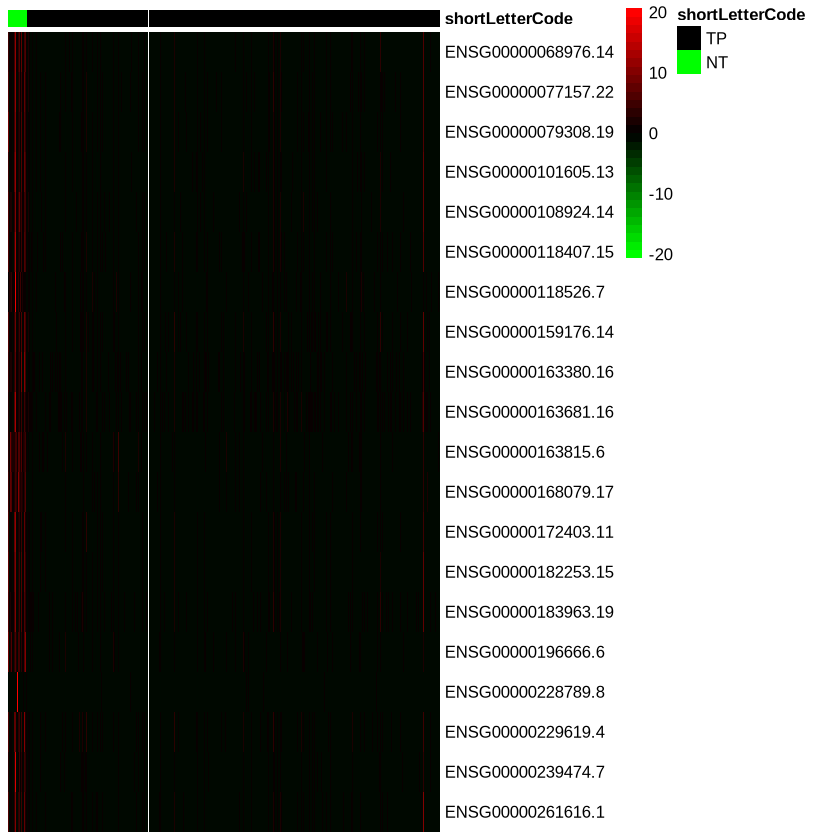

In [24]:
# Custom color schemes for annotations
annotation_colors <- list( shortLetterCode =c("TP" = "black", "NT" = "green"))

# Creating the heatmap
pheatmap(
  t(final_mat),  # Transpose data if necessary
  color = colorRampPalette(c("green", "black", "red"))(n = 30),
  scale = "row",
  cluster_rows = FALSE,
  cluster_cols = FALSE,
  annotation_col = metadata,
  annotation_colors = annotation_colors,
  show_rownames = TRUE,
  show_colnames = FALSE,
  width = 1000,
  height = 500
)

## Volcano mRNA

### Change options because of error from labels 

In [41]:
options(ggrepel.max.overlaps = 20)

In [42]:
res<-TCGAVisualize_volcano(
    x = dataDEGs$logFC,
    y = dataDEGs$FDR,
    filename = "volcanoexp.png",
    names = rownames(dataDEGs),
    color = c("black","red","darkgreen"),
    names.size = 2,
    xlab = " Gene expression fold change (Log2)",
    legend = "State",
    title = "Volcano plot (TP vs NT)",
    width = 10,
    x.cut = 1
)

Saving file as: volcanoexp.png

Warning message:
“ggrepel: 4196 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


## PCA mRNA

In [ ]:
pca <- TCGAvisualize_PCA(
    dataFilt = data_matrix,
    dataDEGsFiltLevel = dataDEGsFiltLevel,
    ntopgenes = 200, 
    group1 = samples.primary.tumour,
    group2 =  samples.solid.tissue.normal
)

## Hist mRNA

In [31]:
# Find and print the maximum value of the matrix
max_value <- max(data_matrix)
max_value

# Flatten the matrix into a vector
mat_vector <- as.vector(data_matrix)

png(filename = "hist.png", width = 1200, height = 480,
    units = "px", pointsize = 12, bg = "white")

# Create a histogram
hist(mat_vector, main = "Histogram of Expression Values", xlab = "Values", col = "lightblue", border = "black", breaks=100)

dev.off()

[1] 319762.4

png 
  2

# miRNA


In [3]:
query.miRNA <- GDCquery(project = "TCGA-BLCA",experimental.strategy = "miRNA-Seq",data.category = "Transcriptome Profiling", 
    data.type = "miRNA Expression Quantification", access = "open")

samplesDown.miRNA <- getResults(query.miRNA,cols=c("cases"))

dataSmTP.miR <- TCGAquery_SampleTypes(barcode = samplesDown.miRNA,typesample = "TP")
dataSmNT.miR <- TCGAquery_SampleTypes(barcode = samplesDown.miRNA,typesample = "NT")

query.miRNA <- GDCquery(project = "TCGA-BLCA",experimental.strategy = "miRNA-Seq",data.category = "Transcriptome Profiling", 
    data.type = "miRNA Expression Quantification",barcode = c(dataSmTP.miR, dataSmNT.miR), access = "open")

GDCdownload(query = query.miRNA)

dataAssy.miR <- GDCprepare(query = query.miRNA)

rownames(dataAssy.miR) <- dataAssy.miR$miRNA_ID

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-BLCA

--------------------

oo Filtering results

--------------------

ooo By access

ooo By experimental.strategy

ooo By data.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-BLCA

--------------------

oo Filtering results

--

  |======================================================================| 100%


In [53]:
# saveRDS(dataAssy.miR, "downloaded_dataAssy_miR.rds")
# saveRDS(dataSmTP.miR, "dataSmTP._miR.rds")
# saveRDS(dataSmNT.miR, "dataSmNT_miRrds")

In [254]:
dataAssy.miR <- readRDS("downloaded_dataAssy_miR.rds")
dataSmTP.miR <- readRDS("dataSmTP._miR.rds")
dataSmNT.miR <- readRDS("dataSmNT_miRrds")

In [255]:
head(dataAssy.miR, 2)

,miRNA_ID,read_count_TCGA-DK-A2I2-01A-11R-A17X-13,reads_per_million_miRNA_mapped_TCGA-DK-A2I2-01A-11R-A17X-13,cross-mapped_TCGA-DK-A2I2-01A-11R-A17X-13,read_count_TCGA-E7-A6MF-01A-12R-A32J-13,reads_per_million_miRNA_mapped_TCGA-E7-A6MF-01A-12R-A32J-13,cross-mapped_TCGA-E7-A6MF-01A-12R-A32J-13,read_count_TCGA-DK-A3IV-01A-22R-A21E-13,reads_per_million_miRNA_mapped_TCGA-DK-A3IV-01A-22R-A21E-13,cross-mapped_TCGA-DK-A3IV-01A-22R-A21E-13,⋯,cross-mapped_TCGA-K4-A54R-11A-11R-A26X-13,read_count_TCGA-GD-A2C5-11A-11R-A17X-13,reads_per_million_miRNA_mapped_TCGA-GD-A2C5-11A-11R-A17X-13,cross-mapped_TCGA-GD-A2C5-11A-11R-A17X-13,read_count_TCGA-CU-A0YN-11A-11R-A10V-13,reads_per_million_miRNA_mapped_TCGA-CU-A0YN-11A-11R-A10V-13,cross-mapped_TCGA-CU-A0YN-11A-11R-A10V-13,read_count_TCGA-BT-A20Q-11A-11R-A14X-13,reads_per_million_miRNA_mapped_TCGA-BT-A20Q-11A-11R-A14X-13,cross-mapped_TCGA-BT-A20Q-11A-11R-A14X-13
,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>,⋯,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>
hsa-let-7a-1,hsa-let-7a-1,18587,4227.118,N,44934,25109.46,N,69295,9249.861,N,⋯,N,102603,10270.60,N,25562,4260.987,N,21645,1261.238,N
hsa-let-7a-2,hsa-let-7a-2,18617,4233.940,N,45179,25246.36,N,68297,9116.643,Y,⋯,N,101773,10187.51,Y,26018,4336.998,Y,21638,1260.830,Y


## Take columns that start with "read_count_" (for raw data) and create matrix

In [256]:
read_countData <-  colnames(dataAssy.miR)[grep("read_count_", colnames(dataAssy.miR))]

data_matrix_miR <- dataAssy.miR[,read_countData]

colnames(data_matrix_miR) <- gsub("read_count_","", colnames(data_matrix_miR))

head(data_matrix_miR, 2)

,TCGA-DK-A2I2-01A-11R-A17X-13,TCGA-E7-A6MF-01A-12R-A32J-13,TCGA-DK-A3IV-01A-22R-A21E-13,TCGA-FD-A6TA-01A-12R-A33A-13,TCGA-FD-A62S-01A-11R-A30J-13,TCGA-BT-A20T-01A-11R-A14X-13,TCGA-UY-A78M-01A-21R-A358-13,TCGA-DK-AA6L-01A-11R-A39B-13,TCGA-FD-A5BT-01A-11R-A26X-13,TCGA-KQ-A41S-01A-12R-A33A-13,⋯,TCGA-BT-A2LB-11A-11R-A18B-13,TCGA-GC-A3WC-11A-11R-A22V-13,TCGA-BL-A13J-11A-13R-A10V-13,TCGA-CU-A0YR-11A-13R-A10V-13,TCGA-BT-A2LA-11A-11R-A18B-13,TCGA-BT-A20U-11A-11R-A14X-13,TCGA-K4-A54R-11A-11R-A26X-13,TCGA-GD-A2C5-11A-11R-A17X-13,TCGA-CU-A0YN-11A-11R-A10V-13,TCGA-BT-A20Q-11A-11R-A14X-13
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
hsa-let-7a-1,18587,44934,69295,33473,41076,38391,18145,63904,41545,41340,⋯,57605,39790,51229,29017,86514,8503,36292,102603,25562,21645
hsa-let-7a-2,18617,45179,68297,33315,41241,38219,18167,63826,41446,41514,⋯,57248,39588,51276,28944,86180,8286,35489,101773,26018,21638


In [257]:
saveRDS(data_matrix_miR,"raw_data_matrix_miR.rds")

## DESeq2 for MOFA

In [258]:
miRcolData <- rep(NA, length(colnames(data_matrix_miR)))
miRcolData[which(colnames(data_matrix_miR) %in% dataSmTP.miR)] <- "TP"
miRcolData[which(colnames(data_matrix_miR) %in% dataSmNT.miR)] <- "NT"
miRcolData <- data.frame(shortLetterCode = miRcolData)
rownames(miRcolData) <- colnames(data_matrix_miR)
head(miRcolData, 2)

,shortLetterCode
,<chr>
TCGA-DK-A2I2-01A-11R-A17X-13,TP
TCGA-E7-A6MF-01A-12R-A32J-13,TP


In [259]:
# Create a DESeqDataSet object
miRdds <- DESeqDataSetFromMatrix(countData = data_matrix_miR,
                              colData = miRcolData,
                              design = ~ shortLetterCode)

# Estimate size factors
miRdds <- estimateSizeFactors(miRdds)

miRvst <- varianceStabilizingTransformation(miRdds, blind = FALSE)

# Extract the normalized counts
normalized_counts_miR <- assay(miRvst)

head(normalized_counts_miR, 2)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


,TCGA-DK-A2I2-01A-11R-A17X-13,TCGA-E7-A6MF-01A-12R-A32J-13,TCGA-DK-A3IV-01A-22R-A21E-13,TCGA-FD-A6TA-01A-12R-A33A-13,TCGA-FD-A62S-01A-11R-A30J-13,TCGA-BT-A20T-01A-11R-A14X-13,TCGA-UY-A78M-01A-21R-A358-13,TCGA-DK-AA6L-01A-11R-A39B-13,TCGA-FD-A5BT-01A-11R-A26X-13,TCGA-KQ-A41S-01A-12R-A33A-13,⋯,TCGA-BT-A2LB-11A-11R-A18B-13,TCGA-GC-A3WC-11A-11R-A22V-13,TCGA-BL-A13J-11A-13R-A10V-13,TCGA-CU-A0YR-11A-13R-A10V-13,TCGA-BT-A2LA-11A-11R-A18B-13,TCGA-BT-A20U-11A-11R-A14X-13,TCGA-K4-A54R-11A-11R-A26X-13,TCGA-GD-A2C5-11A-11R-A17X-13,TCGA-CU-A0YN-11A-11R-A10V-13,TCGA-BT-A20Q-11A-11R-A14X-13
hsa-let-7a-1,14.15373,16.95934,15.18639,14.55119,14.63024,15.97608,14.88960,15.71214,14.50654,14.96509,⋯,15.60613,15.36820,16.41457,16.14623,15.97692,15.99141,15.13047,15.78532,15.94804,15.85062
hsa-let-7a-2,14.15606,16.96719,15.16547,14.54437,14.63603,15.96960,14.89135,15.71038,14.50309,14.97114,⋯,15.59716,15.36085,16.41590,16.14260,15.97134,15.95411,15.09819,15.77360,15.97354,15.85015


## Remove patient duplicate with the most zeros in the column, for every patient with duplicates

In [ ]:
# # keep first 16 characters from colnames, which are sample ids
# sample_ids <- substr(colnames(data_matrix_miR), 0, 16)

# # find duplicated samples in colData(dataPrep)
# patient_duplicates <- sample_ids[which(duplicated(sample_ids))]

# # use function duplicates_index_to_remove for every element in patient_duplicates
# patient_duplicates_to_remove <- sapply(patient_duplicates, duplicates_index_to_remove, input_matrix = data_matrix_miR)

# print("Index of duplicates with the most zeros per patient with duplicates")
# patient_duplicates_to_remove

# print("The names of the columns that will be removed")
# colnames(data_matrix_miR)[patient_duplicates_to_remove]

In [17]:
# # Remove the specified-duplicated columns
# data_matrix_miR <- data_matrix_miR[, -patient_duplicates_to_remove, drop = FALSE]
# dim(data_matrix_miR)

[1] 1881  431

## Check for rows that have only 0 or NA/NaN, there isn't None in R, instead of this is NULL, but rows with NULL can't appear in matrix

In [21]:
# TRUE if matrix contains any NAs/NaNs
any(is.na(data_matrix_miR))
any(is.nan(as.matrix(data_matrix_miR)))

# Get indices of non-numeric
which(is.na(as.numeric(as.matrix(data_matrix_miR))))

[1] FALSE

[1] FALSE

integer(0)

In [22]:
is_all_zeros_or_na <- function(value) {all(value == 0 | is.na(value))}

# Checking for rows where all elements are zeros
rows_with_all_zeros <- apply(data_matrix_miR, 1, is_all_zeros_or_na)

# Counting the number of columns with all zeros
num_columns_with_all_zeros <- sum(rows_with_all_zeros)

num_columns_with_all_zeros

[1] 313

In [23]:
dim(data_matrix_miR)

[1] 1881  436

### A matrix in R can only hold one type of data, if first element is integer/double, then all the elements in this matrix are integers/doubles

In [24]:
typeof(data_matrix_miR[1,1])

[1] "integer"

## Take columns that start with "reads_per_million_miRNA" (for normalized data) and create matrix

In [15]:
read_countData <-  colnames(dataAssy.miR)[grep("reads_per_million_miRNA", colnames(dataAssy.miR))]

data_matrix_miR <- dataAssy.miR[,read_countData]

colnames(data_matrix_miR) <- gsub("reads_per_million_miRNA_mapped_","", colnames(data_matrix_miR))

head(data_matrix_miR, 2)

,TCGA-DK-A2I2-01A-11R-A17X-13,TCGA-E7-A6MF-01A-12R-A32J-13,TCGA-DK-A3IV-01A-22R-A21E-13,TCGA-FD-A6TA-01A-12R-A33A-13,TCGA-FD-A62S-01A-11R-A30J-13,TCGA-BT-A20T-01A-11R-A14X-13,TCGA-UY-A78M-01A-21R-A358-13,TCGA-DK-AA6L-01A-11R-A39B-13,TCGA-FD-A5BT-01A-11R-A26X-13,TCGA-KQ-A41S-01A-12R-A33A-13,⋯,TCGA-BT-A2LB-11A-11R-A18B-13,TCGA-GC-A3WC-11A-11R-A22V-13,TCGA-BL-A13J-11A-13R-A10V-13,TCGA-CU-A0YR-11A-13R-A10V-13,TCGA-BT-A2LA-11A-11R-A18B-13,TCGA-BT-A20U-11A-11R-A14X-13,TCGA-K4-A54R-11A-11R-A26X-13,TCGA-GD-A2C5-11A-11R-A17X-13,TCGA-CU-A0YN-11A-11R-A10V-13,TCGA-BT-A20Q-11A-11R-A14X-13
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-let-7a-1,4227.118,25109.46,9249.861,5408.821,5888.805,11645.36,5980.638,9529.839,6661.821,5619.656,⋯,8035.191,4950.450,3714.047,4619.003,11074.03,5780.253,8489.891,10270.60,4260.987,1261.238
hsa-let-7a-2,4233.940,25246.36,9116.643,5383.290,5912.460,11593.18,5987.890,9518.207,6645.946,5643.309,⋯,7985.394,4925.318,3717.455,4607.383,11031.28,5632.738,8302.043,10187.51,4336.998,1260.830


## Remove patient duplicate with the most zeros in the column, for every patient with duplicates

In [16]:
# keep first 16 characters from colnames, which are sample ids
sample_ids <- substr(colnames(data_matrix_miR), 0, 16)

# find duplicated samples in colData(dataPrep)
patient_duplicates <- sample_ids[which(duplicated(sample_ids))]

# use function duplicates_index_to_remove for every element in patient_duplicates
patient_duplicates_to_remove <- sapply(patient_duplicates, duplicates_index_to_remove, input_matrix = data_matrix_miR)

print("Index of duplicates with the most zeros per patient with duplicates")
patient_duplicates_to_remove

print("The names of the columns that will be removed")
colnames(data_matrix_miR)[patient_duplicates_to_remove]

TCGA-C4-A0F7-01A-11R-A25G-13 TCGA-C4-A0F7-01A-11R-A085-13 
                        1110                         1318 
TCGA-C4-A0F1-01A-11R-A25G-13 TCGA-C4-A0F1-01A-11R-A035-13 
                        1149                         1309 
TCGA-BL-A0C8-01A-11R-A10V-13 TCGA-BL-A0C8-01A-11R-A27D-13 
                        1215                         1179 
TCGA-BL-A13I-01A-11R-A27D-13 TCGA-BL-A13I-01A-11R-A13X-13 
                        1207                         1274 
TCGA-BL-A13J-01A-11R-A27D-13 TCGA-BL-A13J-01A-11R-A10V-13 
                        1141                         1172 
[1] "Index of duplicates with the most zeros per patient with duplicates"


TCGA-C4-A0F7-01A TCGA-C4-A0F1-01A TCGA-BL-A0C8-01A TCGA-BL-A13I-01A 
             132              148              130              264 
TCGA-BL-A13J-01A 
             375

[1] "The names of the columns that will be removed"


[1] "TCGA-C4-A0F7-01A-11R-A085-13" "TCGA-C4-A0F1-01A-11R-A035-13"
[3] "TCGA-BL-A0C8-01A-11R-A10V-13" "TCGA-BL-A13I-01A-11R-A13X-13"
[5] "TCGA-BL-A13J-01A-11R-A10V-13"

In [17]:
# Remove the specified-duplicated columns
data_matrix_miR <- data_matrix_miR[, -patient_duplicates_to_remove, drop = FALSE]
dim(data_matrix_miR)

[1] 1881  431

## Check for rows that have only 0 or NA/NaN, there isn't None in R, instead of this is NULL, but rows with NULL can't appear in matrix

In [81]:
# TRUE if matrix contains any NAs/NaNs
any(is.na(data_matrix_miR))
any(is.nan(as.matrix(data_matrix_miR)))

# Get indices of non-numeric
which(is.na(as.numeric(as.matrix(data_matrix_miR))))

[1] FALSE

[1] FALSE

integer(0)

In [80]:
is_all_zeros_or_na <- function(value) {all(value == 0 | is.na(value))}

# Checking for rows where all elements are zeros
rows_with_all_zeros <- apply(data_matrix_miR, 1, is_all_zeros_or_na)

# Counting the number of columns with all zeros
num_columns_with_all_zeros <- sum(rows_with_all_zeros)

num_columns_with_all_zeros

[1] 313

### A matrix in R can only hold one type of data, if first element is integer/double, then all the elements in this matrix are integers/doubles

In [70]:
typeof(data_matrix_miR[1,1])

[1] "double"

## Max value of a matrix

In [30]:
which(data_matrix_miR == max(data_matrix_miR), arr.ind = TRUE)
colnames(data_matrix_miR)[418]
data_matrix_miR[190,418]

,row,col
hsa-mir-143,190,418


## DEA

In [56]:
# dataFilt.miR <- TCGAanalyze_Filtering(tabDF = dataAssy.miR,method = "quantile",qnt.cut =  0.25)   

dataDEGs.miR <- TCGAanalyze_DEA(mat1 = data_matrix_miR[,dataSmNT.miR],mat2 = data_matrix_miR[,dataSmTP.miR],Cond1type = "Normal",
    Cond2type = "Tumor",fdr.cut = 1, logFC.cut = 0,method = "glmLRT") 

dataDEGsFiltLevel.miR <- TCGAanalyze_LevelTab(FC_FDR_table_mRNA = dataDEGs.miR,typeCond1 = "Normal",typeCond2 = "Tumor",TableCond1 = data_matrix_miR[,dataSmNT.miR],
    TableCond2 = data_matrix_miR[,dataSmTP.miR])

Batch correction skipped since no factors provided

----------------------- DEA -------------------------------

o 19 samples in Cond1type Normal

o 417 samples in Cond2type Tumor

o 1881 features as miRNA or genes 

This may take some minutes...

----------------------- END DEA -------------------------------



In [57]:
head(dataDEGs.miR)

,logFC,logCPM,LR,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-let-7a-1,0.4994647,13.000402,11.093483,8.663164e-04,3.366820e-03
hsa-let-7a-2,0.5047416,12.997061,11.284241,7.816778e-04,3.069595e-03
hsa-let-7a-3,0.5071242,13.008625,11.443041,7.176224e-04,2.841785e-03
hsa-let-7b,0.4838212,13.335747,6.104547,1.348345e-02,3.791087e-02
hsa-let-7c,-1.4949656,10.022287,23.468123,1.270007e-06,9.995327e-06
hsa-let-7d,1.0319037,9.293533,26.946484,2.091673e-07,2.161779e-06


In [58]:
df_mir <- dataDEGs.miR[order(dataDEGs.miR$FDR),]
head(df_mir)

,logFC,logCPM,LR,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-mir-21,2.216282,18.161653,124.37924,6.958783e-29,1.308947e-25
hsa-mir-671,2.707735,3.592268,90.94884,1.474354e-21,1.386630e-18
hsa-mir-143,-2.128490,17.233669,81.62495,1.645237e-19,6.189382e-17
hsa-mir-210,5.556154,10.131234,82.05263,1.325106e-19,6.189382e-17
hsa-mir-96,4.297872,5.354431,82.32563,1.154156e-19,6.189382e-17
hsa-mir-148b,1.857658,7.150263,78.44459,8.227383e-19,2.579285e-16


In [59]:
mirna_degs50 <- rownames(df_mir)[1:50]
mirna_degs100 <- rownames(df_mir)[1:100]
mirna_degs150 <- rownames(df_mir)[1:150]
head(mirna_degs50)

[1] "hsa-mir-21"   "hsa-mir-671"  "hsa-mir-143"  "hsa-mir-210"  "hsa-mir-96"  
[6] "hsa-mir-148b"

## Changed first column to miRNA, but maybe TCGAanalyze_LevelTab is only for mRNA (FC_FDR_table_mRNA)

In [59]:
dataDEGsFiltLevel.miR <- TCGAanalyze_LevelTab(FC_FDR_table_mRNA = dataDEGs.miR,typeCond1 = "Tumor",typeCond2 = "Normal",TableCond1 = data_matrix_miR[,dataSmTP.miR],
    TableCond2 = data_matrix_miR[,dataSmNT.miR])

colnames(dataDEGsFiltLevel.miR)[1] <- "miRNA"

head(dataDEGsFiltLevel.miR)

,miRNA,logFC,FDR,Delta,Tumor,Normal
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-mir-21,hsa-mir-21,2.216279,6.710475e-26,672882.66,303609.24,65335.314
hsa-mir-182,hsa-mir-182,2.830011,1.867410e-11,73838.71,26091.32,3669.148
hsa-mir-203a,hsa-mir-203a,1.987820,3.825456e-03,65968.12,33186.16,8366.787
hsa-mir-183,hsa-mir-183,3.575300,2.108294e-14,52980.80,14818.56,1243.064
hsa-mir-200c,hsa-mir-200c,2.017406,2.092149e-06,35751.15,17721.34,4377.110
hsa-mir-205,hsa-mir-205,2.650162,1.723964e-06,28852.65,10887.13,1734.238


## PCA miRNA

Warning message:
“In prcomp.default(t(expr2), cor = TRUE) :
 extra argument ‘cor’ will be disregarded”
Warning message:
“Removed 25 rows containing missing values (`geom_text()`).”


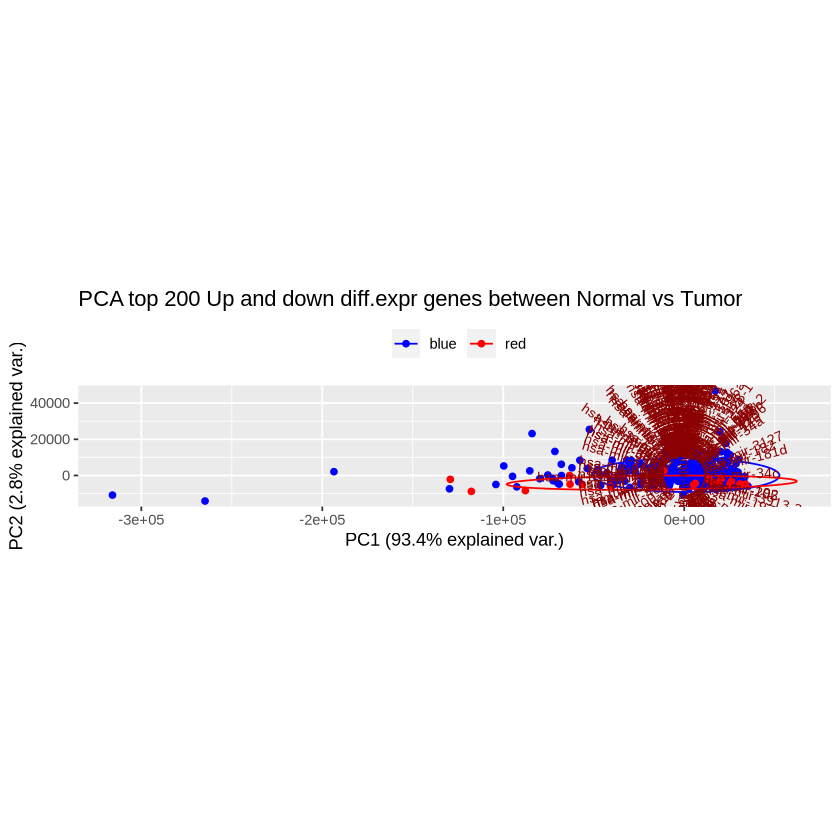

In [10]:
pca <- TCGAvisualize_PCA(
    dataFilt = data_matrix_miR,
    dataDEGsFiltLevel = dataDEGsFiltLevel.miR,
    ntopgenes = 200, 
    group1 = dataSmTP.miR,
    group2 = dataSmNT.miR
)

## Hist miRNA

In [37]:
# Find and print the maximum value of the matrix
max_value <- max(data_matrix_miR)
max_value
# Assuming df is your dataframe
# You can use the unlist function to convert the dataframe to a vector
data_vector <- unlist(data_matrix_miR)

png(filename = "hist_miRNA.png", width = 1200, height = 480,
    units = "px", pointsize = 12, bg = "white")

# Create a histogram
hist(data_vector, main = "Histogram of All Columns", xlab = "Values", col = "lightblue", border = "black", breaks=100)

dev.off()

[1] 937080.8

png 
  2

# Methylation


In [81]:
query_met <- GDCquery(
    project = "TCGA-BLCA", 
    data.category = "DNA Methylation", 
    data.type = "Methylation Beta Value",
    platform = "Illumina Human Methylation 450", 
    access = "open"
)

samplesDown_met <- getResults(query_met,cols=c("cases"))

# return barcodes that are TP
dataSmTP_met <- TCGAquery_SampleTypes(barcode = samplesDown_met,typesample = "TP")
# return barcodes that are NT
dataSmNT_met <- TCGAquery_SampleTypes(barcode = samplesDown_met,typesample = "NT")

query_met <- GDCquery(
    project = "TCGA-BLCA", 
    data.category = "DNA Methylation", 
    data.type = "Methylation Beta Value",
    platform = "Illumina Human Methylation 450", 
    access = "open",
    barcode = c(dataSmTP_met, dataSmNT_met)
)

GDCdownload(query = query_met)

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-BLCA

--------------------

oo Filtering results

--------------------

ooo By platform

ooo By access

ooo By data.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-BLCA

--------------------

oo Filtering results

---------------

Downloading: 390 MB     

Downloading: 390 MB     

Downloading: 390 MB     

Downloading: 400 MB     

Downloading: 390 MB     

Downloading: 310 MB     

In [82]:
saveRDS(query_met, "query_met.rds")

In [4]:
query_met <- readRDS("query_met.rds")

In [ ]:
data_met <- GDCprepare(query_met)
# saveRDS(data_met, "downloaded_data_met.rds")
# saveRDS(dataSmTP_met,"dataSmTP_met.rds")
# saveRDS(dataSmNT_met,"dataSmNT_met.rds")

In [60]:
data_met <- readRDS("downloaded_data_met.rds")
# dataSmTP_met <- readRDS("dataSmTP_met.rds")
# dataSmNT_met <- readRDS("dataSmNT_met.rds")
data_met

class: RangedSummarizedExperiment 
dim: 485577 439 
metadata(1): data_release
assays(1): ''
rownames(485577): cg13869341 cg14008030 ... cg11478607 cg08417382
rowData names(52): address_A address_B ... MASK_extBase MASK_general
colnames(439): TCGA-FD-A3NA-01A-11D-A21B-05
  TCGA-E7-A6MF-01A-12D-A32C-05 ... TCGA-BL-A13J-11A-13D-A10W-05
  TCGA-GD-A3OQ-11A-21D-A223-05
colData names(238): barcode patient ... paper_Fusion in TNFRSF21
  paper_Fusion in ASIP

In [61]:
dim(assay(data_met))
head(assay(data_met), 1)

[1] 485577    439

,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,TCGA-UY-A78M-01A-21D-A34V-05,TCGA-FD-A5BT-01A-11D-A26N-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
cg13869341,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [180]:
meth_matrix <- assay(data_met)
head(meth_matrix, 1)

,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,TCGA-UY-A78M-01A-21D-A34V-05,TCGA-FD-A5BT-01A-11D-A26N-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
cg13869341,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Convertion to M-values for MOFA

In [260]:
meth_mat_mean <- readRDS("meth_mat_mean_with_na.rds")

m_values <- log2(meth_mat_mean / (1 - meth_mat_mean))

dim(m_values)
head(m_values, 2)

[1] 37930   439

,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,TCGA-UY-A78M-01A-21D-A34V-05,TCGA-FD-A5BT-01A-11D-A26N-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
ENSG00000000003,-1.6731590,-2.496407,-1.5537959,-1.7752266,-2.147910,-1.750815,-1.832955,-2.2118050,-0.8630033,-1.419756,⋯,-1.399898,-0.6412204,-0.7384546,-1.16531,-0.4496351,-0.530620,-1.548875,-0.8266681,-1.123247,-1.597692
ENSG00000000005,0.6200819,1.397996,0.3556771,-0.0869612,2.279113,1.443138,3.583669,0.9985654,-0.1273481,1.161536,⋯,2.899890,1.3499670,1.8978214,2.90263,2.2700290,1.574616,3.031188,1.6356497,3.253244,3.363951


In [261]:
# Create a logical matrix indicating where NAs or NaNs are present
is_na_nan <- is.na(m_values) | is.nan(m_values)

# Summarize each row to check if all elements are NA or NaN
all_na_nan_rows <- apply(is_na_nan, 1, all)

# Identify row indices where all elements are TRUE
rows_with_only_na_nan <- which(all_na_nan_rows)

m_values <- m_values[!all_na_nan_rows, ]

## Remove patient duplicate with the most zeros in the column, for every patient with duplicates

In [22]:
duplicates_index_to_remove_for_methylation <- function(patient,input_matrix) {
  # for every element in patient search colnames that start with this sample id, whih are from duplicated samples 
  duplicated_columns <- colnames(input_matrix)[grep(patient, colnames(input_matrix))]
  
  # Count the number of NA values in each specified column
  na_counts <- colSums(is.na(input_matrix[, duplicated_columns]))
  print(na_counts)

  # find which column for every duplicated sample has more zeros
  index_of_larger_number <- which.max(na_counts)

  # Find the index from the matrix, of the column with more zeros to remove
  column_index_to_remove <- which(colnames(input_matrix) %in% duplicated_columns[index_of_larger_number])

  return (column_index_to_remove)
}

In [23]:
# find duplicated samples in colData(dataPrep)
patient_duplicates <- colData(data_met)$sample[which(duplicated(colData(data_met)$sample))]

# use function duplicates_index_to_remove for every element in patient_duplicates
patient_duplicates_to_remove <- sapply(patient_duplicates, duplicates_index_to_remove_for_methylation, input_matrix = meth_matrix)

print("Index of duplicates with the most zeros per patient with duplicates")
patient_duplicates_to_remove

print("The names of the columns that will be removed")
colnames(meth_matrix)[patient_duplicates_to_remove]

TCGA-BL-A13I-01A-11D-A13Z-05 TCGA-BL-A13I-01A-11D-A276-05 
                       70003                        78309 
TCGA-BL-A0C8-01A-11D-A276-05 TCGA-BL-A0C8-01A-11D-A10W-05 
                       77030                        93139 
TCGA-BL-A13J-01A-11D-A10W-05 TCGA-BL-A13J-01A-11D-A276-05 
                       77227                        81411 
[1] "Index of duplicates with the most zeros per patient with duplicates"


TCGA-BL-A13I-01A TCGA-BL-A0C8-01A TCGA-BL-A13J-01A 
             300              345              398

[1] "The names of the columns that will be removed"


[1] "TCGA-BL-A13I-01A-11D-A276-05" "TCGA-BL-A0C8-01A-11D-A10W-05"
[3] "TCGA-BL-A13J-01A-11D-A276-05"

In [24]:
# Remove the specified-duplicated columns
meth_matrix <- meth_matrix[, -patient_duplicates_to_remove, drop = FALSE]
dim(meth_matrix)

[1] 485577    436

## Check for rows that have only 0 or NA/NaN, there isn't None in R, instead of this is NULL, but rows with NULL can't appear in matrix

In [83]:
is_all_zeros_or_na <- function(value) {all(value == 0 | is.na(value))}

# Checking for rows where all elements are zeros
rows_with_all_zeros <- apply(assay(data_met), 1, is_all_zeros_or_na)

# Counting the number of columns with all zeros
num_columns_with_all_zeros <- sum(rows_with_all_zeros)

num_columns_with_all_zeros

[1] 64220

### A matrix in R can only hold one type of data, if first element is integer/double, then all the elements in this matrix are integers/doubles

In [25]:
typeof(assay(data_met)[1,1])

[1] "double"

## Remove the rows that have at least one NA

In [31]:
# na.omit
data_met <- data_met[rowSums(is.na(assay(data_met))) == 0,]
head(assay(data_met))

,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,TCGA-UY-A78M-01A-21D-A34V-05,TCGA-FD-A5BT-01A-11D-A26N-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
cg16619049,0.3756185,0.03666365,0.4997181,0.2023811,0.3520077,0.3108895,0.2993181,0.2349854,0.2127136,0.4577936,⋯,0.4038090,0.4894903,0.4352221,0.4644328,0.4522823,0.3883846,0.3454956,0.4294653,0.3881193,0.3837940
cg18147296,0.6587823,0.75214447,0.7269647,0.6757211,0.6300320,0.5469870,0.8340163,0.6970405,0.6927025,0.7092280,⋯,0.6744512,0.6361787,0.6522986,0.6125903,0.6445321,0.5559067,0.5434577,0.6293830,0.5565833,0.6541837
cg13938959,0.4730780,0.91998643,0.4880943,0.4145957,0.6354954,0.3862603,0.4176617,0.5102106,0.3306258,0.6812871,⋯,0.7340995,0.7816124,0.7907097,0.7685573,0.8704710,0.7944413,0.8729773,0.5421802,0.8290652,0.8006693
cg12445832,0.2910751,0.88852353,0.3300772,0.2093543,0.3620125,0.2583255,0.2360047,0.2946073,0.2390897,0.4281056,⋯,0.5190293,0.5062436,0.6467032,0.5405029,0.7525516,0.5865062,0.6265222,0.4008233,0.6150903,0.6264947
cg23999112,0.5600379,0.89377422,0.4990788,0.5443186,0.8551309,0.4092382,0.4892752,0.4753013,0.3533445,0.6960211,⋯,0.8633101,0.8123911,0.8906572,0.8954997,0.9194234,0.9157894,0.9187857,0.6748022,0.9166921,0.8302839
cg11527153,0.7307246,0.52660896,0.7823555,0.5567775,0.5710294,0.4140516,0.6276143,0.6893751,0.6281392,0.8491099,⋯,0.8524084,0.7904111,0.8995841,0.8998211,0.8944471,0.9118951,0.8879874,0.6809255,0.8821675,0.8974090


In [32]:
meth_matrix <- assay(data_met)

## DMC (p.cut = 10^-5 from tutorial, 0.01 and 0.2 are defaults)

In [33]:
data <- TCGAanalyze_DMC(
    data = data_met, 
    groupCol = "shortLetterCode",
    group1 = "TP",
    group2 = "NT",
    p.cut = 0.01,
    diffmean.cut = 0.2,
    legend = "State",
    plot.filename = "TP_vs_NT_volcanoMeth.pdf"
)

saveRDS(data,"dmc_data_new.rds")

Group1:TP

Group2:NT

Calculating the p-values of each probe...



|====================                                |39.38228% ~24 m remaining ggg

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|==========================                          |51.63425% ~24 m remaining 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|==============================                      |58.10767% ~23 m remaining 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|=================================                   |63.61192% ~22 m remaining 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|===================================                 |68.73364% ~20 m remaining 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|======================================              |73.65602% ~18 m remaining 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|========================================            |78.50644% ~16 m remaining 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|==========================================          |81.70838% ~14 m remaining 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|===========================================         |84.28888% ~12 m remaining 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|=============================================       |86.78874% ~11 m remaining 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|==============================================      |89.35185% ~9 m remaining  

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|===============================================     |91.87269% ~7 m remaining  

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|====================================================|100%                      Completed after 2 h 


Saving volcano plot as: TP_vs_NT_volcanoMeth.pdf

Saving file as: TP_vs_NT_volcanoMeth.pdf

Saving the results also in a csv file: ./DMR_results_shortLetterCode_TP_NT_pcut_0.01_meancut_0.2.csv



In [39]:
data <- readRDS("dmc_data_new.rds")

In [30]:
# Get content into a data frame
data <- read.csv("DMR_results_shortLetterCode_TP_NT_pcut_1e-05_meancut_0.25.csv", header = TRUE)

In [62]:
head(data)

,mean.TP,mean.NT,mean.TP.minus.mean.NT,p.value.TP.NT,p.value.adj.TP.NT,status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
cg12663811,0.1594076,0.3980333,-0.2386257,3.194809e-13,2.252547e-10,Hypomethylated in TP
cg05948763,0.8554916,0.6141818,0.2413098,3.885787e-13,2.252547e-10,Hypermethylated in TP
cg24579224,0.9186333,0.6584855,0.2601478,2.490616e-13,2.252547e-10,Hypermethylated in TP
cg01520454,0.4149525,0.6769896,-0.2620371,3.936745e-13,2.252547e-10,Hypomethylated in TP
cg00492341,0.3600214,0.6826590,-0.3226376,4.910502e-13,2.252547e-10,Hypomethylated in TP
cg03976856,0.2004466,0.5222599,-0.3218133,6.041127e-13,2.252547e-10,Hypomethylated in TP


In [41]:
data <- data[order(data$p.value.adj.TP.NT	),]
head(data) 

,mean.TP,mean.NT,mean.TP.minus.mean.NT,p.value.TP.NT,p.value.adj.TP.NT,status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
cg12663811,0.1594076,0.3980333,-0.2386257,3.194809e-13,2.252547e-10,Hypomethylated in TP
cg05948763,0.8554916,0.6141818,0.2413098,3.885787e-13,2.252547e-10,Hypermethylated in TP
cg24579224,0.9186333,0.6584855,0.2601478,2.490616e-13,2.252547e-10,Hypermethylated in TP
cg01520454,0.4149525,0.6769896,-0.2620371,3.936745e-13,2.252547e-10,Hypomethylated in TP
cg00492341,0.3600214,0.6826590,-0.3226376,4.910502e-13,2.252547e-10,Hypomethylated in TP
cg03976856,0.2004466,0.5222599,-0.3218133,6.041127e-13,2.252547e-10,Hypomethylated in TP


In [42]:
meth_degs50 <- rownames(data)[1:50]
meth_degs100 <- rownames(data)[1:100]
meth_degs150 <- rownames(data)[1:150]
head(meth_degs50)

[1] "cg12663811" "cg05948763" "cg24579224" "cg01520454" "cg00492341"
[6] "cg03976856"

In [65]:
mapping_data <- readRDS("mapping_data_102_with_na_features.rds")
head(mapping_data)
df50 <- data.frame(probeIDS = meth_degs50)
df100 <- data.frame(probeIDS = meth_degs100)
df150 <- data.frame(probeIDS = meth_degs150)
head(df50)

probeID,transcriptIDs,ensembl_ids
<chr>,<chr>,<chr>
cg13869341,ENST00000488147.1,ENSG00000227232
cg14008030,ENST00000619216.1,ENSG00000278267
cg14008030,ENST00000488147.1,ENSG00000227232
cg12045430,ENST00000607096.1,ENSG00000284332
cg12045430,ENST00000469289.1,ENSG00000243485
cg12045430,ENST00000473358.1,ENSG00000243485


,probeIDS
,<chr>
1,cg12663811
2,cg05948763
3,cg24579224
4,cg01520454
5,cg00492341
6,cg03976856


In [67]:
# df50$ensembl_ids <- apply(as.matrix(df$probeIDS),1, function (x){mapping_data$ensembl_ids[which(mapping_data$probeID %in% x)]})
# head(df50)
df100$ensembl_ids <- apply(as.matrix(df$probeIDS),1, function (x){mapping_data$ensembl_ids[which(mapping_data$probeID %in% x)]})
head(df100)
df150$ensembl_ids <- apply(as.matrix(df$probeIDS),1, function (x){mapping_data$ensembl_ids[which(mapping_data$probeID %in% x)]})
head(df150)

,probeIDS,ensembl_ids
,<chr>,<list>
1,cg12663811,ENSG0000....
2,cg05948763,ENSG0000....
3,cg24579224,ENSG0000....
4,cg01520454,ENSG0000....
5,cg00492341,ENSG0000....
6,cg03976856,


,probeIDS,ensembl_ids
,<chr>,<list>
1,cg12663811,ENSG0000....
2,cg05948763,ENSG0000....
3,cg24579224,ENSG0000....
4,cg01520454,ENSG0000....
5,cg00492341,ENSG0000....
6,cg03976856,


In [69]:
head(df50$ensembl_ids)

[[1]]
[1] "ENSG00000187583" "ENSG00000187583" "ENSG00000187583"

[[2]]
[1] "ENSG00000157933" "ENSG00000157933" "ENSG00000157933"

[[3]]
[1] "ENSG00000157933" "ENSG00000157933" "ENSG00000157933"

[[4]]
[1] "ENSG00000116151" "ENSG00000116151" "ENSG00000116151" "ENSG00000116151"
[5] "ENSG00000116151" "ENSG00000116151"

[[5]]
[1] "ENSG00000142606" "ENSG00000142606" "ENSG00000142606" "ENSG00000142606"

[[6]]
character(0)

In [71]:
values_vector50 <- unlist(df50$ensembl_ids)
values_vector50
values_vector100 <- unlist(df100$ensembl_ids)

values_vector150 <- unlist(df150$ensembl_ids)


[1] "ENSG00000187583" "ENSG00000187583" "ENSG00000187583" "ENSG00000157933"
  [5] "ENSG00000157933" "ENSG00000157933" "ENSG00000157933" "ENSG00000157933"
  [9] "ENSG00000157933" "ENSG00000116151" "ENSG00000116151" "ENSG00000116151"
 [13] "ENSG00000116151" "ENSG00000116151" "ENSG00000116151" "ENSG00000142606"
 [17] "ENSG00000142606" "ENSG00000142606" "ENSG00000142606" "ENSG00000284745"
 [21] "ENSG00000284745" "ENSG00000162591" "ENSG00000162591" "ENSG00000207776"
 [25] "ENSG00000162591" "ENSG00000162591" "ENSG00000162591" "ENSG00000162591"
 [29] "ENSG00000116213" "ENSG00000116213" "ENSG00000116213" "ENSG00000116213"
 [33] "ENSG00000116213" "ENSG00000116213" "ENSG00000116254" "ENSG00000116254"
 [37] "ENSG00000116254" "ENSG00000116254" "ENSG00000116254" "ENSG00000116254"
 [41] "ENSG00000116254" "ENSG00000116254" "ENSG00000116254" "ENSG00000116254"
 [45] "ENSG00000116254" "ENSG00000097021" "ENSG00000097021" "ENSG00000097021"
 [49] "ENSG00000097021" "ENSG00000097021" "ENSG00000097021" "ENSG00000097021"
 [53] "ENSG00000097021" "ENSG00000097021" "ENSG00000097021" "ENSG00000097021"
 [57] "ENSG00000097021" "ENSG00000097021" "ENSG00000097021" "ENSG00000097021"
 [61] "ENSG00000097021" "ENSG00000097021" "ENSG00000097021" "ENSG00000171735"
 [65] "ENSG00000270330" "ENSG00000049249" "ENSG00000049249" "ENSG00000049249"
 [69] "ENSG00000237276" "ENSG00000237276" "ENSG00000117118" "ENSG00000117118"
 [73] "ENSG00000117118" "ENSG00000117154" "ENSG00000117154" "ENSG00000159189"
 [77] "ENSG00000159189" "ENSG00000159189" "ENSG00000173369" "ENSG00000173369"
 [81] "ENSG00000173369" "ENSG00000188822" "ENSG00000130695" "ENSG00000130695"
 [85] "ENSG00000130695" "ENSG00000130695" "ENSG00000130695" "ENSG00000130695"
 [89] "ENSG00000175793" "ENSG00000142765" "ENSG00000142765" "ENSG00000142765"
 [93] "ENSG00000142765" "ENSG00000142765" "ENSG00000142765" "ENSG00000142765"
 [97] "ENSG00000142765" "ENSG00000142765" "ENSG00000142765" "ENSG00000142765"
[101] "ENSG00000142765" "ENSG00000142765" "ENSG00000142765" "ENSG00000142765"
[105] "ENSG00000142765" "ENSG00000142765" "ENSG00000142765" "ENSG00000142765"
[109] "ENSG00000142765"

In [72]:
meth_degs50<- unique(values_vector50)
meth_degs100<- unique(values_vector100)
meth_degs150<- unique(values_vector150)

In [73]:
degs50 <- c(mrna_degs50, mirna_degs50, meth_degs50)
degs100 <- c(mrna_degs100, mirna_degs100, meth_degs100)
degs150 <- c(mrna_degs150, mirna_degs150, meth_degs150)
degs50

[1] "ENSG00000163815.6"  "ENSG00000101605.13" "ENSG00000239474.7" 
  [4] "ENSG00000163380.16" "ENSG00000068976.14" "ENSG00000183963.19"
  [7] "ENSG00000159176.14" "ENSG00000228789.8"  "ENSG00000077157.22"
 [10] "ENSG00000182253.15" "ENSG00000196666.6"  "ENSG00000079308.19"
 [13] "ENSG00000229619.4"  "ENSG00000108924.14" "ENSG00000172403.11"
 [16] "ENSG00000118407.15" "ENSG00000118526.7"  "ENSG00000168079.17"
 [19] "ENSG00000163681.16" "ENSG00000261616.1"  "ENSG00000144655.15"
 [22] "ENSG00000158445.10" "ENSG00000181856.15" "ENSG00000065325.13"
 [25] "ENSG00000112425.16" "ENSG00000123358.20" "ENSG00000065534.19"
 [28] "ENSG00000165410.15" "ENSG00000128591.16" "ENSG00000140416.23"
 [31] "ENSG00000115556.14" "ENSG00000187942.12" "ENSG00000135842.17"
 [34] "ENSG00000141052.18" "ENSG00000126218.12" "ENSG00000148339.12"
 [37] "ENSG00000197361.8"  "ENSG00000075073.15" "ENSG00000133392.18"
 [40] "ENSG00000168309.18" "ENSG00000121577.14" "ENSG00000091436.17"
 [43] "ENSG00000117600.12" "ENSG00000168477.19" "ENSG00000259370.2" 
 [46] "ENSG00000106034.18" "ENSG00000267505.1"  "ENSG00000197766.8" 
 [49] "ENSG00000095637.22" "ENSG00000164530.15" "hsa-mir-21"        
 [52] "hsa-mir-671"        "hsa-mir-143"        "hsa-mir-210"       
 [55] "hsa-mir-96"         "hsa-mir-148b"       "hsa-mir-1298"      
 [58] "hsa-mir-1307"       "hsa-mir-17"         "hsa-mir-18a"       
 [61] "hsa-mir-130b"       "hsa-mir-185"        "hsa-mir-7705"      
 [64] "hsa-mir-590"        "hsa-mir-1-2"        "hsa-mir-183"       
 [67] "hsa-mir-454"        "hsa-mir-3613"       "hsa-mir-301b"      
 [70] "hsa-mir-19a"        "hsa-mir-93"         "hsa-mir-301a"      
 [73] "hsa-mir-1-1"        "hsa-mir-20a"        "hsa-mir-139"       
 [76] "hsa-mir-133a-1"     "hsa-mir-33a"        "hsa-mir-503"       
 [79] "hsa-mir-425"        "hsa-mir-106b"       "hsa-mir-133a-2"    
 [82] "hsa-mir-19b-2"      "hsa-mir-19b-1"      "hsa-mir-345"       
 [85] "hsa-mir-576"        "hsa-mir-877"        "hsa-mir-92a-2"     
 [88] "hsa-mir-331"        "hsa-mir-92a-1"      "hsa-mir-1277"      
 [91] "hsa-mir-940"        "hsa-mir-937"        "hsa-mir-1912"      
 [94] "hsa-mir-182"        "hsa-mir-141"        "hsa-mir-1301"      
 [97] "hsa-mir-188"        "hsa-mir-133b"       "hsa-mir-191"       
[100] "hsa-mir-651"        "ENSG00000187583"    "ENSG00000157933"   
[103] "ENSG00000116151"    "ENSG00000142606"    "ENSG00000284745"   
[106] "ENSG00000162591"    "ENSG00000207776"    "ENSG00000116213"   
[109] "ENSG00000116254"    "ENSG00000097021"    "ENSG00000171735"   
[112] "ENSG00000270330"    "ENSG00000049249"    "ENSG00000237276"   
[115] "ENSG00000117118"    "ENSG00000117154"    "ENSG00000159189"   
[118] "ENSG00000173369"    "ENSG00000188822"    "ENSG00000130695"   
[121] "ENSG00000175793"    "ENSG00000142765"

In [74]:
length(degs50)

[1] 122

In [75]:
write.csv(degs50,file="DEGs50.csv",row.names=F)
write.csv(degs100,file="DEGs100.csv",row.names=F)
write.csv(degs150,file="DEGs150.csv",row.names=F)

## Mean Methylation

In [7]:
TCGAvisualize_meanMethylation(data = data_met,groupCol = "shortLetterCode")

==================== DATA Summary ====================



  groups      Mean    Median       Max       Min
1     NT 0.4936504 0.4942819 0.5051722 0.4741619
2     TP 0.4503661 0.4588729 0.5429089 0.3272561


==================== END DATA Summary ====================

==================== T test results ====================



             TP           NT
TP           NA 1.780016e-38
NT 1.780016e-38           NA


==================== END T test results ====================



  [1] "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP"
 [16] "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP"
 [31] "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP"
 [46] "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP"
 [61] "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP"
 [76] "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP"
 [91] "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP"
[106] "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP"
[121] "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP"
[136] "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP"
[151] "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP"
[166] "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP" "TP"
[181] "TP" "TP" "TP" "TP" "T

Plot saved in:  /home/thlamp/tcga/bladder_results/groupMeanMet.pdf



## Mean Methylation for probes

In [ ]:
tumor_meth_mat <- meth_matrix[, which(colnames(meth_matrix) %in% dataSmTP_met)]
tumor_means <- colMeans(tumor_meth_mat, na.rm=T)
cat("TP\n")
cat("Mean: ", round(mean(tumor_means), 7),"\n")
cat("Median: ", round(median(tumor_means), 7),"\n")
cat("Max: ", round(max(tumor_means), 7),"\n")
cat("Min: ", round(min(tumor_means), 7),"\n")
cat("NT\n")
control_meth_mat <- meth_matrix[, which(colnames(meth_matrix) %in% dataSmNT_met)]
control_means <- colMeans(control_meth_mat, na.rm=T)
cat("Mean: ", round(mean(control_means), 7),"\n")
cat("Median: ", round(median(control_means), 7),"\n")
cat("Max: ", round(max(control_means), 7),"\n")
cat("Min: ", round(min(control_means), 7),"\n")
cat("p-value: ", t.test(tumor_means, control_means)$p.value)

In [60]:
df_tumor <- data.frame(sample_means = tumor_means, class="TP")
df_control <- data.frame(sample_means = control_means, class="NT")
df = rbind(df_tumor,df_control)

In [ ]:
ggplot(df, aes(x=as.factor(class), y=sample_means, fill=class)) + geom_boxplot(outlier.shape = NA) + ylab("Mean DNA methylation") + 
geom_jitter(color="black", size=1.8, alpha=0.9, position = position_jitter(width = 0.1)) +theme_minimal() + 
labs(x = "", fill = "shortLetterCode", title = "Mean DNA methylation") + 
theme(plot.title = element_text(hjust = 0.5), legend.position = "top", legend.justification = "center", legend.box.just = "center")

## Mean Methylation for genes

In [5]:
meth_mat_mean <- readRDS("meth_mat_mean_with_na.rds")

tumor_meth_mat_genes <- meth_mat_mean[, which(colnames(meth_mat_mean) %in% dataSmTP_met)]
tumor_means_genes <- colMeans(tumor_meth_mat_genes, na.rm=T)
cat("TP\n")
cat("Mean: ", round(mean(tumor_means_genes), 7),"\n")
cat("Median: ", round(median(tumor_means_genes), 7),"\n")
cat("Max: ", round(max(tumor_means_genes), 7),"\n")
cat("Min: ", round(min(tumor_means_genes), 7),"\n")
cat("NT\n")
control_meth_mat_genes <- meth_mat_mean[, which(colnames(meth_mat_mean) %in% dataSmNT_met)]
control_means_genes <- colMeans(control_meth_mat_genes, na.rm=T)
cat("Mean: ", round(mean(control_means_genes), 7),"\n")
cat("Median: ", round(median(control_means_genes), 7),"\n")
cat("Max: ", round(max(control_means_genes), 7),"\n")
cat("Min: ", round(min(control_means_genes), 7),"\n")
cat("p-value: ", t.test(tumor_means_genes, control_means_genes)$p.value)

TP
Mean:  0.4458111 
Median:  0.4534232 
Max:  0.5292919 
Min:  0.3224818 
NT
Mean:  0.4979821 
Median:  0.4976319 
Max:  0.5109976 
Min:  0.4778294 
p-value:  4.085278e-43

In [65]:
df_tumor_genes <- data.frame(sample_means = tumor_means_genes, class="TP")
df_control_genes <- data.frame(sample_means = control_means_genes, class="NT")
df_genes = rbind(df_tumor_genes,df_control_genes)

In [ ]:
ggplot(df_genes, aes(x=as.factor(class), y=sample_means, fill=class)) + geom_boxplot(outlier.shape = NA) + ylab("Mean DNA methylation") + 
geom_jitter(color="black", size=1.8, alpha=0.9, position = position_jitter(width = 0.1)) +theme_minimal() + 
labs(x = "", fill = "shortLetterCode", title = "Mean DNA methylation") + 
theme(plot.title = element_text(hjust = 0.5), legend.position = "top", legend.justification = "center", legend.box.just = "center")

## Hist Meth

In [15]:
# Find the maximum value of the matrix
max_value <- max(meth_matrix)

# Print the result
print(max_value)

# Flatten the matrix into a vector
mat_vector <- as.vector(meth_matrix)

png(filename = "hist_meth.png", width = 1200, height = 480,
    units = "px", pointsize = 12, bg = "white")

# Create a histogram
hist(mat_vector, main = "Histogram of Methylation Values", xlab = "Values", col = "lightblue", border = "black", breaks=100)

dev.off()

[1] 0.9951354


png 
  2

In [36]:
head(dataDEGs)

,logFC,logCPM,LR,PValue,FDR,gene_name,gene_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSG00000000003.15,-0.1527518,6.934034,1.183089,0.2767280419,0.90654878,NA,NA
ENSG00000000005.6,0.9458677,5.075900,5.652517,0.0174303388,0.19878254,NA,NA
ENSG00000000460.17,-0.7218856,6.145499,9.701813,0.0018408635,0.03681727,NA,NA
ENSG00000000938.13,0.1911563,6.273903,1.135949,0.2865099859,0.91587146,NA,NA
ENSG00000000971.16,0.4955941,6.587191,11.865264,0.0005719067,0.01462557,NA,NA
ENSG00000001036.14,-0.1503554,6.905229,1.118471,0.2902478855,0.91863067,NA,NA


## Add gene name and gene type at dataDEGs_new (for mRNA)

In [14]:
dataDEGs_new <- dataDEGs
dataDEGs_new$gene_name <- apply(as.matrix(rownames(dataDEGs_new)),1, function (x){
  row_data$gene_name[which(row_data$gene_id %in% x)]})
dataDEGs_new$gene_type <- apply(as.matrix(rownames(dataDEGs_new)),1, function (x){
  row_data$gene_type[which(row_data$gene_id %in% x)]})
head(dataDEGs_new)

ERROR: Error in eval(expr, envir, enclos): object 'data_dmc' not found


## data_dmc is object from readRDS for DMC data, add new column with probe IDS

In [ ]:
data_dmc_new <- data_dmc
data_dmc_new$probeID <- ""
dmc_rownames <- rownames(data_dmc_new)
data_dmc_new$probeID <-dmc_rownames

In [39]:
head(data_dmc_new)

,mean.TP,mean.NT,mean.TP.minus.mean.NT,p.value.TP.NT,p.value.adj.TP.NT,status,probeID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cg16619049,0.3050122,0.4284076,-0.12339541,5.958731e-05,2.176044e-04,Not Significant,cg16619049
cg18147296,0.6752837,0.6369843,0.03829937,1.162804e-02,2.238072e-02,Not Significant,cg18147296
cg13938959,0.5108953,0.7744803,-0.26358494,3.742539e-09,4.562984e-08,Hypomethylated in TP,cg13938959
cg12445832,0.3073540,0.5808143,-0.27346027,9.698621e-11,2.590277e-09,Hypomethylated in TP,cg12445832
cg23999112,0.5795147,0.8530734,-0.27355870,4.630471e-09,5.452269e-08,Hypomethylated in TP,cg23999112
cg11527153,0.6718636,0.8591173,-0.18725372,1.368352e-07,9.916008e-07,Not Significant,cg11527153


## Change mean.TP.minus.mean.NT to diffmean.TP.NT to avoid error in TCGAvisualize_starburst

In [40]:
colnames(data_dmc_new)[3] ="diffmean.TP.NT"

## Starburst with data_dmc_new and dataDEGs_new

In [53]:
starburst <- TCGAvisualize_starburst(
    met = data_dmc_new, 
    exp = dataDEGs_new,
    genome = "hg38",
    group1 = "TP",
    group2 = "NT",
    filename = "starburst(logFC_1).png",
    met.platform = "Illumina Human Methylation 450",
    met.p.cut = 10^-5,
    exp.p.cut = 10^-5,
    diffmean.cut = 0.25,
    logFC.cut = 1,
    names = FALSE, 
    height = 10,
    width = 15,
    dpi = 300
)

o Fetching auxiliary information

oo Fetching probes genomic information

Accessing DNAm annotation from sesame package for: hg38 - HM450

see ?sesameData and browseVignettes('sesameData') for documentation

loading from cache

o Mapping results information

o Plotting figure

Saving figure as starburst(logFC_1).png

o Saving results

oo Saving significant results as: starburst_results.csv

oo It contains pair with changes both in the expression level of the nearest gene and  in the DNA methylation level



## Download hg38 manifest by sesame package

In [5]:
tsv_path <- sesameAnno_download("HM450.hg38.manifest.gencode.v36.tsv.gz")
df <- sesameAnno_readManifestTSV(tsv_path)

Warning message:
“The following named parsers don't match the column names: address_A, address_B, target, nextBase, channel, Probe_ID, mapFlag_A, mapChrm_A, mapPos_A, mapQ_A, mapCigar_A, AlleleA_ProbeSeq, mapNM_A, mapAS_A, mapYD_A, mapFlag_B, mapChrm_B, mapPos_B, mapQ_B, mapCigar_B, AlleleB_ProbeSeq, mapNM_B, mapAS_B, mapYD_B, type”


In [8]:
saveRDS(df,"HM450.hg38.manifest.v36.rds")

In [16]:
df <- readRDS("HM450.hg38.manifest.v36.rds")

In [17]:
dim(df)
head(df)

[1] 485577     12

CpG_chrm,CpG_beg,CpG_end,probe_strand,probeID,genesUniq,geneNames,transcriptTypes,transcriptIDs,distToTSS,CGI,CGIposition
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,15864,15866,-,cg13869341,WASH7P,WASH7P,unprocessed_pseudogene,ENST00000488147.1,13706,NA,NA
chr1,18826,18828,-,cg14008030,MIR6859-1;WASH7P,MIR6859-1;WASH7P,miRNA;unprocessed_pseudogene,ENST00000619216.1;ENST00000488147.1,-1390;10744,NA,NA
chr1,29406,29408,-,cg12045430,MIR1302-2;MIR1302-2HG;WASH7P,MIR1302-2;MIR1302-2HG;MIR1302-2HG;WASH7P,miRNA;lncRNA;lncRNA;unprocessed_pseudogene,ENST00000607096.1;ENST00000469289.1;ENST00000473358.1;ENST00000488147.1,-959;-860;-147;164,CGI:chr1:28735-29737,Island
chr1,29424,29426,-,cg20826792,MIR1302-2;MIR1302-2HG;WASH7P,MIR1302-2;MIR1302-2HG;MIR1302-2HG;WASH7P,miRNA;lncRNA;lncRNA;unprocessed_pseudogene,ENST00000607096.1;ENST00000469289.1;ENST00000473358.1;ENST00000488147.1,-941;-842;-129;146,CGI:chr1:28735-29737,Island
chr1,29434,29436,-,cg00381604,MIR1302-2;MIR1302-2HG;WASH7P,MIR1302-2;MIR1302-2HG;MIR1302-2HG;WASH7P,miRNA;lncRNA;lncRNA;unprocessed_pseudogene,ENST00000607096.1;ENST00000469289.1;ENST00000473358.1;ENST00000488147.1,-931;-832;-119;136,CGI:chr1:28735-29737,Island
chr1,68848,68850,-,cg20253340,OR4F5,OR4F5;OR4F5,protein_coding;protein_coding,ENST00000335137.4;ENST00000641515.2,-206;3430,NA,NA


### Keep only the columns that I need

In [7]:
mapping_data <- df[c("probeID","transcriptIDs")]
head(mapping_data)

probeID,transcriptIDs
<chr>,<chr>
cg13869341,ENST00000488147.1
cg14008030,ENST00000619216.1;ENST00000488147.1
cg12045430,ENST00000607096.1;ENST00000469289.1;ENST00000473358.1;ENST00000488147.1
cg20826792,ENST00000607096.1;ENST00000469289.1;ENST00000473358.1;ENST00000488147.1
cg00381604,ENST00000607096.1;ENST00000469289.1;ENST00000473358.1;ENST00000488147.1
cg20253340,ENST00000335137.4;ENST00000641515.2


### Retain only probe IDs from the matrix after removing NAs

In [17]:
selected_probe_ids <- rownames(meth_matrix)
mapping_data <- mapping_data[which(mapping_data$probeID %in% selected_probe_ids),]
dim(mapping_data)

[1] 485577      2

### Separate transcriptIDs by ; into different row per id

In [18]:
library(tidyr)
mapping_data <- separate_rows(mapping_data, transcriptIDs, sep=";")
dim(mapping_data)
head(mapping_data,10)


Attaching package: ‘tidyr’


The following object is masked from ‘package:S4Vectors’:

    expand




[1] 2771500       2

probeID,transcriptIDs
<chr>,<chr>
cg13869341,ENST00000488147.1
cg14008030,ENST00000619216.1
cg14008030,ENST00000488147.1
cg12045430,ENST00000607096.1
cg12045430,ENST00000469289.1
cg12045430,ENST00000473358.1
cg12045430,ENST00000488147.1
cg20826792,ENST00000607096.1
cg20826792,ENST00000469289.1


### NAs per column

In [19]:
colSums(is.na(mapping_data))

probeID transcriptIDs 
            0         61891

### Remove probeIDs that don't match with transcriptIDs

In [20]:
mapping_data <- mapping_data[complete.cases(mapping_data),]
dim(mapping_data)

[1] 2709609       2

### Create column with transcriptIDs_without_version

In [ ]:
# mapping_data$transcriptIDs_without_version <-gsub("\\.[0-9]*", "", mapping_data$transcriptIDs)
# head(mapping_data)

### Check values in transcriptIDs_without_version

In [14]:
# test <- grep("*\\..",mapping_data$transcriptIDs)

In [21]:
head(mapping_data)

probeID,transcriptIDs
<chr>,<chr>
cg13869341,ENST00000488147.1
cg14008030,ENST00000619216.1
cg14008030,ENST00000488147.1
cg12045430,ENST00000607096.1
cg12045430,ENST00000469289.1
cg12045430,ENST00000473358.1


### Biomart transcriptIDs to ensemblIDs

In [22]:
library(biomaRt)

In [23]:
ensembl <- useEnsembl(biomart = 'genes',dataset = "hsapiens_gene_ensembl",version = 102)

### Search for unique transcriptIDs to avoid repetitions of same transcriptIDs

In [24]:
# check number of unique transcriptIDs to be sure there are all in bm_results with ensembl_gene_id
length(unique(mapping_data$transcriptIDs))

[1] 185976

In [25]:
searchAttributes(mart = ensembl, pattern = "transcript_id")

,name,description,page
,<chr>,<chr>,<chr>
3,ensembl_transcript_id,Transcript stable ID,feature_page
4,ensembl_transcript_id_version,Transcript stable ID version,feature_page
203,ensembl_transcript_id,Transcript stable ID,structure
204,ensembl_transcript_id_version,Transcript stable ID version,structure
243,ensembl_transcript_id,Transcript stable ID,homologs
244,ensembl_transcript_id_version,Transcript stable ID version,homologs
2922,ensembl_transcript_id,Transcript stable ID,snp
2923,ensembl_transcript_id_version,Transcript stable ID version,snp
2966,ensembl_transcript_id,Transcript stable ID,snp_somatic


In [26]:
# transcript_ids <- unique(mapping_data$transcriptIDs_without_version)
transcript_ids <- unique(mapping_data$transcriptIDs)

# bm_results <- getBM(attributes = c('ensembl_gene_id', 'ensembl_transcript_id'),
#       filters = 'ensembl_transcript_id',
#       values = transcript_ids, 
#       mart = ensembl)
bm_results <- getBM(attributes = c('ensembl_gene_id', 'ensembl_transcript_id_version'),
      filters = 'ensembl_transcript_id_version',
      values = transcript_ids, 
      mart = ensembl)


Batch submitting query [>------------------------------]   3% eta: 39s

Batch submitting query [=>-----------------------------]   5% eta: 36s

Batch submitting query [=>-----------------------------]   8% eta: 34s

Batch submitting query [==>----------------------------]  11% eta: 33s

Batch submitting query [===>---------------------------]  13% eta: 31s

Batch submitting query [====>--------------------------]  16% eta: 30s

Batch submitting query [=====>-------------------------]  18% eta: 29s

Batch submitting query [======>------------------------]  21% eta: 28s

Batch submitting query [======>------------------------]  24% eta: 27s

Batch submitting query [=======>-----------------------]  26% eta: 26s

Batch submitting query [========>----------------------]  29% eta: 25s

Batch submitting query [=========>---------------------]  32% eta: 24s

Batch submitting query [==========>--------------------]  34% eta: 23s

Batch submitting query [==========>--------------------]  37% e

In [27]:
dim(bm_results)

[1] 185976      2

In [28]:
head(bm_results)

,ensembl_gene_id,ensembl_transcript_id_version
,<chr>,<chr>
1,ENSG00000227232,ENST00000488147.1
2,ENSG00000278267,ENST00000619216.1
3,ENSG00000243485,ENST00000473358.1
4,ENSG00000243485,ENST00000469289.1
5,ENSG00000284332,ENST00000607096.1
6,ENSG00000186092,ENST00000641515.2


In [29]:
head(mapping_data)

probeID,transcriptIDs
<chr>,<chr>
cg13869341,ENST00000488147.1
cg14008030,ENST00000619216.1
cg14008030,ENST00000488147.1
cg12045430,ENST00000607096.1
cg12045430,ENST00000469289.1
cg12045430,ENST00000473358.1


### Match ensembl_gene_id with the data from mapping_data by ensembl_transcript_id

In [30]:
# mapping_data$ensembl_ids <- apply(as.matrix(mapping_data$transcriptIDs_without_version),1, function (x){bm_results$ensembl_gene_id[which(bm_results$ensembl_transcript_id %in% x)]})
# head(mapping_data)
mapping_data$ensembl_ids <- apply(as.matrix(mapping_data$transcriptIDs),1, function (x){bm_results$ensembl_gene_id[which(bm_results$ensembl_transcript_id_version %in% x)]})
head(mapping_data)

probeID,transcriptIDs,ensembl_ids
<chr>,<chr>,<chr>
cg13869341,ENST00000488147.1,ENSG00000227232
cg14008030,ENST00000619216.1,ENSG00000278267
cg14008030,ENST00000488147.1,ENSG00000227232
cg12045430,ENST00000607096.1,ENSG00000284332
cg12045430,ENST00000469289.1,ENSG00000243485
cg12045430,ENST00000473358.1,ENSG00000243485


In [32]:
saveRDS(mapping_data,"mapping_data_102_with_na_features.rds")

In [51]:
mapping_data <- readRDS("mapping_data_102_with_na_features.rds")
head(mapping_data)

probeID,transcriptIDs,ensembl_ids
<chr>,<chr>,<chr>
cg13869341,ENST00000488147.1,ENSG00000227232
cg14008030,ENST00000619216.1,ENSG00000278267
cg14008030,ENST00000488147.1,ENSG00000227232
cg12045430,ENST00000607096.1,ENSG00000284332
cg12045430,ENST00000469289.1,ENSG00000243485
cg12045430,ENST00000473358.1,ENSG00000243485


### Keep only probeID and ensembl_ids with unique pairs of probeID and ensembl_ids

In [52]:
mapping_data <- mapping_data[c("probeID","ensembl_ids")]
dim(mapping_data)
mapping_data <- mapping_data[!duplicated(mapping_data[,c('probeID','ensembl_ids')]),]
dim(mapping_data)

[1] 2709609       2

[1] 583278      2

In [53]:
head(mapping_data)

probeID,ensembl_ids
<chr>,<chr>
cg13869341,ENSG00000227232
cg14008030,ENSG00000278267
cg14008030,ENSG00000227232
cg12045430,ENSG00000284332
cg12045430,ENSG00000243485
cg12045430,ENSG00000227232


### Check results from matching

In [10]:
which(duplicated(mapping_data$probeID))

[1]      3     12     14     16     18     20     22     24     26     27
   [11]     29     30     32     33     35     36     98    117    119    121
   [21]    123    136    138    140    142    183    185    187    189    191
   [31]    193    195    197    199    201    203    205    207    209    226
   [41]    228    238    240    242    244    246    248    250    252    325
   [51]    327    329    331    333    335    346    348    350    352    354
   [61]    356    451    453    455    457    460    462    464    466    467
   [71]    469    470    472    474    476    478    480    482    487    489
   [81]    491    493    495    497    499    501    503    505    507    509
   [91]    511    513    515    517    519    521    523    525    527    529
  [101]    531    533    603    605    607    609    611    613    615    665
  [111]    667    669    671    673    703    705    722    724    726    728
  [121]    730    732    734    736    738    740    742    744    746    748
  [131]    750    752    754    756    758    760    762    765    767    769
  [141]    771    773    775    777    779    781    783    787    789    791
  [151]    793    795    797    799    801    841    843    845    905    907
  [161]    909    911    913    915    917    919    921    923    925    927
  [171]    929    933    935    937    939    941    944    946    948    950
  [181]    953    955    957    959    961    963    965    977    979    981
  [191]    983    985    987    989    991    993    995    997   1082   1084
  [201]   1086   1123   1125   1127   1129   1131   1133   1135   1137   1139
  [211]   1141   1144   1146   1148   1150   1152   1154   1157   1159   1161
  [221]   1163   1165   1167   1169   1171   1173   1175   1177   1179   1181
  [231]   1183   1185   1187   1223   1225   1227   1229   1231   1241   1243
  [241]   1245   1247   1249   1251   1317   1319   1321   1323   1325   1327
  [251]   1329   1331   1333   1335   1337   1493   1495   1497   1499   1501
  [261]   1503   1505   1507   1509   1511   1662   1664   1731   1733   1735
  [271]   1736   1738   1739   1741   1742   1794   1796   1798   1800   1802
  [281]   1950   1952   1954   1956   1958   1960   1965   1967   1969   1971
  [291]   1973   1975   2012   2014   2016   2018   2020   2022   2024   2026
  [301]   2060   2062   2064   2066   2068   2070   2072   2074   2076   2078
  [311]   2080   2082   2084   2086   2088   2090   2111   2113   2115   2117
  [321]   2119   2121   2123   2243   2245   2247   2248   2250   2251   2253
  [331]   2254   2256   2257   2259   2260   2340   2342   2344   2346   2348
  [341]   2350   2352   2354   2356   2358   2360   2362   2413   2415   2448
  [351]   2450   2452   2454   2456   2458   2460   2491   2493   2531   2533
  [361]   2535   2537   2539   2541   2543   2545   2547   2549   2551   2553
  [371]   2555   2557   2559   2561   2651   2653   2655   2657   2659   2772
  [381]   2774   2776   2778   2780   2782   2784   2786   2788   2935   2937
  [391]   2943   2945   2947   2949   2951   2953   2955   2957   2959   2961
  [401]   2963   2965   2967   2969   2971   2973   3015   3017   3019   3021
  [411]   3248   3250   3252   3254   3256   3258   3305   3307   3309   3311
  [421]   3313   3315   3317   3319   3321   3323   3325   3327   3394   3396
  [431]   3398   3400   3402   3404   3406   3408   3410   3412   3414   3416
  [441]   3418   3420   3422   3424   3426   3428   3430   3432   3434   3436
  [451]   3438   3440   3442   3446   3448   3450   3452   3454   3456   3458
  [461]   3541   3545   3547   3549   3551   3553   3555   3557   3559   3561
  [471]   3563   3565   3567   3569   3571   3584   3604   3606   3608   3610
  [481]   3656   3658   3660   3662   3664   3666   3668   3670   3672   3674
  [491]   3676   3678   3680   3682   3684   3686   3688   3690   3692   3694
  [501]   3716   3718   3720   3722   3724   3726   3728   3730   3732   3734
  [511]   3763   3765   38

In [15]:
mapping_data[which(mapping_data$probeID %in% mapping_data$probeID[413070]),]

probeID,ensembl_ids
<chr>,<chr>
cg12727431,ENSG00000089820
cg12727431,ENSG00000102030
cg12727431,ENSG00000102032


### Create an empty dataframe to match mapping_data with values from meth_matrix

In [54]:
meth_df <- data.frame(matrix(NA, nrow = nrow(mapping_data), ncol = ncol(meth_matrix)+ncol(mapping_data)))
dim(meth_df)

[1] 583278    441

### Set colnames and insert probeID and ensembl_ids

In [55]:
colnames(meth_df)[1:2] <- c("probeID", "ensembl_ids") 
meth_df$probeID <- mapping_data$probeID
meth_df$ensembl_ids <- mapping_data$ensembl_ids
colnames(meth_df)[3:ncol(meth_df)] <- colnames(meth_matrix)
head(meth_df)

,probeID,ensembl_ids,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,cg13869341,ENSG00000227232,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,cg14008030,ENSG00000278267,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,cg14008030,ENSG00000227232,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,cg12045430,ENSG00000284332,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,cg12045430,ENSG00000243485,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,cg12045430,ENSG00000227232,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Insert values to meth_df from meth_matrix matched by probeID

In [56]:
transfer_values <- function(df, mat) {
  matching_rows <- match(df$probeID, rownames(mat))
  df[, 3:ncol(df)] <- mat[matching_rows, ]
  return(df)
}

meth_df_updated <- transfer_values(meth_df, meth_matrix)

In [ ]:
head(meth_df_updated,100)

In [ ]:
saveRDS(meth_df_updated,"meth_df_updated_with_na.rds")

In [31]:
meth_df_updated <- readRDS("meth_df_updated_with_na.rds")

## Check results from id mapping

In [ ]:
head(meth_df_updated,2)

In [8]:
head(meth_matrix,2)

,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,TCGA-UY-A78M-01A-21D-A34V-05,TCGA-FD-A5BT-01A-11D-A26N-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
cg16619049,0.3756185,0.03666365,0.4997181,0.2023811,0.3520077,0.3108895,0.2993181,0.2349854,0.2127136,0.4577936,⋯,0.4038090,0.4894903,0.4352221,0.4644328,0.4522823,0.3883846,0.3454956,0.4294653,0.3881193,0.3837940
cg18147296,0.6587823,0.75214447,0.7269647,0.6757211,0.6300320,0.5469870,0.8340163,0.6970405,0.6927025,0.7092280,⋯,0.6744512,0.6361787,0.6522986,0.6125903,0.6445321,0.5559067,0.5434577,0.6293830,0.5565833,0.6541837


In [24]:
# convert df to matrix without two first columns
meth_mat_updated <- as.matrix(meth_df_updated[-c(1,2)])

rownames(meth_mat_updated) <- meth_df_updated$probeID

colnames(meth_mat_updated) <- colnames(meth_df_updated)[3:ncol(meth_df_updated)]

# keep unique rownames, if the one row is ok then the duplicate will be the same
check_meth_mat_updated <- meth_mat_updated[!duplicated(rownames(meth_mat_updated)), ]

# Identify common row names
common_row_names <- intersect(rownames(check_meth_mat_updated), rownames(meth_matrix))

# Check if values for common row names are identical
values_identical <- identical(check_meth_mat_updated[common_row_names, ], meth_matrix[common_row_names, ])

# Print the results
if (values_identical) {
  print("The values for the common row names are identical")
} else {
  print("The values for the common row names are not identical")
}

[1] "The values for the common row names are identical"


### Calculate mean value per column for common ensembl ids

In [33]:
meth_df_updated <- meth_df_updated[,2:length(colnames(meth_df_updated))]
head(meth_df_updated)

,ensembl_ids,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,TCGA-UY-A78M-01A-21D-A34V-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000227232,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,ENSG00000278267,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,ENSG00000227232,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,ENSG00000284332,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,ENSG00000243485,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,ENSG00000227232,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [35]:
# group by ensembl_ids and then calculate the mean per column that start with TCGA for every ensembl id
meth_df_updated <- meth_df_updated %>% group_by(ensembl_ids) %>% summarise(across(starts_with("TCGA"), ~mean(., na.rm = TRUE)))
dim(meth_df_updated)

[1] 37930   440

In [36]:
# meth_df_updated <- aggregate(meth_df_updated[3:ncol(meth_df_updated)], by=list(meth_df_updated$ensembl_ids), FUN=mean)
head(meth_df_updated)

ensembl_ids,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,TCGA-UY-A78M-01A-21D-A34V-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,0.2387135,0.1505393,0.2540724,0.2260951,0.1840992,0.2290696,0.2191703,0.1775396,0.3547583,⋯,0.2748137,0.3906787,0.3747581,0.3083741,0.4227088,0.4090733,0.2547194,0.3605443,0.3146270,0.2483492
ENSG00000000005,0.6058278,0.7249236,0.5613239,0.4849353,0.8291706,0.7311190,0.9230132,0.6664457,0.4779466,⋯,0.8818483,0.7182355,0.7884270,0.8820460,0.8282769,0.7486529,0.8910061,0.7565295,0.9050790,0.9114697
ENSG00000000419,0.1178325,0.1234904,0.1074870,0.1131896,0.1210688,0.1209866,0.1081228,0.1165495,0.1198469,⋯,0.1283536,0.1279853,0.1322744,0.1328414,0.1118885,0.1289726,0.1308155,0.1161732,0.1299091,0.1082305
ENSG00000000457,0.2670827,0.2168660,0.2770998,0.2431043,0.2516276,0.2287701,0.2518552,0.2284875,0.2557735,⋯,0.2772068,0.2743403,0.2659583,0.2732396,0.2737861,0.2705068,0.2681463,0.2741836,0.2584690,0.2666568
ENSG00000000460,0.4436307,0.3737125,0.4417753,0.3872603,0.3896061,0.3454119,0.4138059,0.2615974,0.3971209,⋯,0.4519261,0.3996746,0.4449273,0.4474967,0.4534179,0.4513251,0.4400299,0.4234064,0.4144037,0.4409280
ENSG00000000938,0.5438053,0.4496814,0.5568034,0.6666494,0.5146676,0.4753789,0.5400387,0.5367315,0.5435034,⋯,0.5679367,0.5774811,0.5839556,0.5459100,0.6185687,0.5658374,0.5650642,0.5350111,0.5637159,0.5888963


### Convert df with mean values per gene to matrix

In [37]:
meth_mat_mean <- as.matrix(meth_df_updated[, 2:ncol(meth_df_updated)])

rownames(meth_mat_mean) <- meth_df_updated$ensembl_ids

head(meth_mat_mean)

,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,TCGA-UY-A78M-01A-21D-A34V-05,TCGA-FD-A5BT-01A-11D-A26N-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
ENSG00000000003,0.2387135,0.1505393,0.2540724,0.2260951,0.1840992,0.2290696,0.2191703,0.1775396,0.3547583,0.2720790,⋯,0.2748137,0.3906787,0.3747581,0.3083741,0.4227088,0.4090733,0.2547194,0.3605443,0.3146270,0.2483492
ENSG00000000005,0.6058278,0.7249236,0.5613239,0.4849353,0.8291706,0.7311190,0.9230132,0.6664457,0.4779466,0.6910677,⋯,0.8818483,0.7182355,0.7884270,0.8820460,0.8282769,0.7486529,0.8910061,0.7565295,0.9050790,0.9114697
ENSG00000000419,0.1178325,0.1234904,0.1074870,0.1131896,0.1210688,0.1209866,0.1081228,0.1165495,0.1198469,0.1083114,⋯,0.1283536,0.1279853,0.1322744,0.1328414,0.1118885,0.1289726,0.1308155,0.1161732,0.1299091,0.1082305
ENSG00000000457,0.2670827,0.2168660,0.2770998,0.2431043,0.2516276,0.2287701,0.2518552,0.2284875,0.2557735,0.2775308,⋯,0.2772068,0.2743403,0.2659583,0.2732396,0.2737861,0.2705068,0.2681463,0.2741836,0.2584690,0.2666568
ENSG00000000460,0.4436307,0.3737125,0.4417753,0.3872603,0.3896061,0.3454119,0.4138059,0.2615974,0.3971209,0.4005870,⋯,0.4519261,0.3996746,0.4449273,0.4474967,0.4534179,0.4513251,0.4400299,0.4234064,0.4144037,0.4409280
ENSG00000000938,0.5438053,0.4496814,0.5568034,0.6666494,0.5146676,0.4753789,0.5400387,0.5367315,0.5435034,0.5757990,⋯,0.5679367,0.5774811,0.5839556,0.5459100,0.6185687,0.5658374,0.5650642,0.5350111,0.5637159,0.5888963


In [38]:
saveRDS(meth_mat_mean,"meth_mat_mean_with_na.rds")

In [20]:
meth_mat_mean <- readRDS("meth_mat_mean_with_na.rds")
dim(meth_mat_mean)
head(meth_mat_mean, 2)

[1] 37930   439

,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,TCGA-UY-A78M-01A-21D-A34V-05,TCGA-FD-A5BT-01A-11D-A26N-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
ENSG00000000003,0.2387135,0.1505393,0.2540724,0.2260951,0.1840992,0.2290696,0.2191703,0.1775396,0.3547583,0.2720790,⋯,0.2748137,0.3906787,0.3747581,0.3083741,0.4227088,0.4090733,0.2547194,0.3605443,0.314627,0.2483492
ENSG00000000005,0.6058278,0.7249236,0.5613239,0.4849353,0.8291706,0.7311190,0.9230132,0.6664457,0.4779466,0.6910677,⋯,0.8818483,0.7182355,0.7884270,0.8820460,0.8282769,0.7486529,0.8910061,0.7565295,0.905079,0.9114697


In [21]:
duplicates_index_to_remove_for_methylation <- function(patient, input_matrix) {
  # for every element in patient search colnames that start with this sample id, which are from duplicated samples 
  duplicated_columns <- colnames(input_matrix)[grep(patient, colnames(input_matrix))]
  
  # Count the number of NA values in each specified column
  na_counts <- colSums(is.na(input_matrix[, duplicated_columns]))
  print(na_counts)
  # Count the number of zeros in each specified column
  zero_counts <- colSums(input_matrix[, duplicated_columns] == 0)
  print(zero_counts)
  mat <- cbind(na_counts, zero_counts)
  counts <- rowSums(mat, na.rm = TRUE)
  print(counts)
  cat("\n")
  # find which column for every duplicated sample has more zeros or NA values
  index_of_larger_number <- which.max(counts)

  # Find the index from the matrix, of the column with more zeros or NA values to remove
  column_index_to_remove <- which(colnames(input_matrix) %in% duplicated_columns[index_of_larger_number])

  return(column_index_to_remove)
}


In [24]:
# find duplicated samples in colData(dataPrep)
patient_duplicates <- colData(data_met)$sample[which(duplicated(colData(data_met)$sample))]

# use function duplicates_index_to_remove for every element in patient_duplicates
patient_duplicates_to_remove <- sapply(patient_duplicates, duplicates_index_to_remove_for_methylation, input_matrix = meth_mat_mean)

print("Index of duplicates with the most zeros per patient with duplicates")
patient_duplicates_to_remove

print("The names of the columns that will be removed")
colnames(meth_mat_mean)[patient_duplicates_to_remove]

TCGA-BL-A13I-01A-11D-A13Z-05 TCGA-BL-A13I-01A-11D-A276-05 
                        3100                         3463 
TCGA-BL-A13I-01A-11D-A13Z-05 TCGA-BL-A13I-01A-11D-A276-05 
                          NA                           NA 
TCGA-BL-A13I-01A-11D-A13Z-05 TCGA-BL-A13I-01A-11D-A276-05 
                        3100                         3463 

TCGA-BL-A0C8-01A-11D-A276-05 TCGA-BL-A0C8-01A-11D-A10W-05 
                        3405                         3795 
TCGA-BL-A0C8-01A-11D-A276-05 TCGA-BL-A0C8-01A-11D-A10W-05 
                          NA                           NA 
TCGA-BL-A0C8-01A-11D-A276-05 TCGA-BL-A0C8-01A-11D-A10W-05 
                        3405                         3795 

TCGA-BL-A13J-01A-11D-A10W-05 TCGA-BL-A13J-01A-11D-A276-05 
                        3275                         3536 
TCGA-BL-A13J-01A-11D-A10W-05 TCGA-BL-A13J-01A-11D-A276-05 
                          NA                           NA 
TCGA-BL-A13J-01A-11D-A10W-05 TCGA-BL-A13J-01A-11D-A276

TCGA-BL-A13I-01A TCGA-BL-A0C8-01A TCGA-BL-A13J-01A 
             300              345              398

[1] "The names of the columns that will be removed"


[1] "TCGA-BL-A13I-01A-11D-A276-05" "TCGA-BL-A0C8-01A-11D-A10W-05"
[3] "TCGA-BL-A13J-01A-11D-A276-05"

In [25]:
# Remove the specified-duplicated columns
meth_mat_mean <- meth_mat_mean[, -patient_duplicates_to_remove, drop = FALSE]
dim(meth_mat_mean)

[1] 37930   436

In [26]:
check_and_compare <- function(ensembl_id, mapping_data, meth_matrix, meth_mat_mean) {
  # Subset the mapping_data based on the ensembl_id
  check_subset <- mapping_data[mapping_data$ensembl_ids %in% ensembl_id, ]
  
  # Remove duplicated rows based on 'probeID' and 'ensembl_ids', because use only one time per probe id every ensembl id 
  check_subset <- check_subset[!duplicated(check_subset[, c('probeID', 'ensembl_ids')]), ]
    
  # if length(check_subset$probeID)== 1 then it returns error in colMeans
  if (length(check_subset$probeID)>1) {
      # Calculate the column means for the selected rows in meth_matrix
      matrix_col_means <- colMeans(meth_matrix[check_subset$probeID, ])
      
      # Check if the column means are identical to the corresponding row in meth_mat_mean
      is_identical <- all.equal(meth_mat_mean[ensembl_id, ], matrix_col_means)
  # if length(check_subset$probeID)== 1 I compare the row from meth_mat_mean with the unique row from meth_matrix
  } else {
      is_identical <- all.equal(meth_mat_mean[ensembl_id,],meth_matrix[check_subset$probeID,])
  }
  return(is_identical = is_identical)
}


In [27]:
# vector of Ensembl IDs from rownames
ensembl_ids_vector <- rownames(meth_mat_mean)[1:15000]

# Apply check_and_compare to each Ensembl ID in the vector
results_list <- lapply(ensembl_ids_vector, function(ensembl_id) {
  check_and_compare(ensembl_id, mapping_data, meth_matrix, meth_mat_mean)
})

# Convert the list to a vector if needed
results_vector <- unlist(results_list)

# Print ensembl_ids that they aren't identical
print("Results: ")
ensembl_ids_vector[!results_vector]


ERROR: Error in FUN(X[[i]], ...): object 'mapping_data' not found


## Convertion to M-values for MOFA

In [65]:
meth_mat_mean <- readRDS("meth_mat_mean_with_na.rds")

m_values <- log2(meth_mat_mean / (1 - meth_mat_mean))

head(m_values, 2)

,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,TCGA-UY-A78M-01A-21D-A34V-05,TCGA-FD-A5BT-01A-11D-A26N-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
ENSG00000000003,-1.6731590,-2.496407,-1.5537959,-1.7752266,-2.147910,-1.750815,-1.832955,-2.2118050,-0.8630033,-1.419756,⋯,-1.399898,-0.6412204,-0.7384546,-1.16531,-0.4496351,-0.530620,-1.548875,-0.8266681,-1.123247,-1.597692
ENSG00000000005,0.6200819,1.397996,0.3556771,-0.0869612,2.279113,1.443138,3.583669,0.9985654,-0.1273481,1.161536,⋯,2.899890,1.3499670,1.8978214,2.90263,2.2700290,1.574616,3.031188,1.6356497,3.253244,3.363951


# MOFA

## mRNA

In [262]:
head(normalized_counts, 2)

,TCGA-CU-A3KJ-01A-11R-A21D-07,TCGA-K4-A3WU-01B-11R-A23N-07,TCGA-DK-A3IU-01A-11R-A20F-07,TCGA-GV-A40G-01A-11R-A23N-07,TCGA-DK-A3IN-01A-11R-A20F-07,TCGA-SY-A9G0-01A-12R-A38B-07,TCGA-XF-A9SU-01A-31R-A39I-07,TCGA-UY-A78O-01A-12R-A33J-07,TCGA-GD-A2C5-01A-12R-A180-07,TCGA-G2-A2EK-01A-22R-A18C-07,⋯,TCGA-DK-A1AD-01A-11R-A13Y-07,TCGA-XF-AAMJ-01A-11R-A42T-07,TCGA-DK-A1A6-01A-11R-A13Y-07,TCGA-XF-AAN2-01A-11R-A42T-07,TCGA-GU-A42Q-01A-11R-A23W-07,TCGA-GC-A4ZW-01A-11R-A26T-07,TCGA-XF-AAMY-01A-11R-A42T-07,TCGA-XF-AAN7-01A-11R-A42T-07,TCGA-E7-A6MD-01A-41R-A352-07,TCGA-ZF-A9R5-01A-12R-A42T-07
ENSG00000000003.15,11.0550661,13.948765,9.546326,12.952404,12.0431342,11.074673,12.429122,13.645186,13.040419,13.7640291,⋯,14.401186,12.2145779,13.13209,11.349758,9.8527139,12.6923794,12.790391,11.613530,12.278166,13.768165
ENSG00000000005.6,0.9656929,3.917102,1.864089,2.327022,0.9656929,3.082569,2.600421,2.039279,2.188613,0.9656929,⋯,3.012336,0.9656929,1.84750,2.641802,0.9656929,0.9656929,3.445115,9.286095,3.890358,2.283959


In [263]:
barcode <- colnames(normalized_counts)
sample_ids <- ""
sample_ids <- apply(as.matrix(barcode),1, function (x){dataPrep$sample[which(dataPrep$barcode %in% x)]})

shortLetterCode <- ""
shortLetterCode <- apply(as.matrix(barcode),1, function (x){dataPrep$shortLetterCode[which(dataPrep$barcode %in% x)]})

ajcc_pathologic_stage <- ""
ajcc_pathologic_stage <- apply(as.matrix(barcode),1, function (x){dataPrep$ajcc_pathologic_stage[which(dataPrep$barcode %in% x)]})

age_at_diagnosis <- ""
age_at_diagnosis <- apply(as.matrix(barcode),1, function (x){dataPrep$age_at_diagnosis[which(dataPrep$barcode %in% x)]})

primary_diagnosis <- ""
primary_diagnosis <- apply(as.matrix(barcode),1, function (x){dataPrep$primary_diagnosis[which(dataPrep$barcode %in% x)]})

cigarettes_per_day  <- ""
cigarettes_per_day  <- apply(as.matrix(barcode),1, function (x){dataPrep$cigarettes_per_day [which(dataPrep$barcode %in% x)]})

gender <- ""
gender <- apply(as.matrix(barcode),1, function (x){dataPrep$gender[which(dataPrep$barcode %in% x)]})

ethnicity <- ""
ethnicity <- apply(as.matrix(barcode),1, function (x){dataPrep$ethnicity[which(dataPrep$barcode %in% x)]})

age_at_index <- ""
age_at_index <- apply(as.matrix(barcode),1, function (x){dataPrep$age_at_index[which(dataPrep$barcode %in% x)]})

race <- ""
race <- apply(as.matrix(barcode),1, function (x){dataPrep$race[which(dataPrep$barcode %in% x)]})

days_to_death <- ""
days_to_death <- apply(as.matrix(barcode),1, function (x){dataPrep$days_to_death[which(dataPrep$barcode %in% x)]})

mrna_samples <- data.frame(barcode,sample_ids, shortLetterCode, ajcc_pathologic_stage, age_at_diagnosis, cigarettes_per_day, gender,ethnicity, 
                           age_at_index, race, days_to_death)
head(mrna_samples,2)

,barcode,sample_ids,shortLetterCode,ajcc_pathologic_stage,age_at_diagnosis,cigarettes_per_day,gender,ethnicity,age_at_index,race,days_to_death
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>
1,TCGA-CU-A3KJ-01A-11R-A21D-07,TCGA-CU-A3KJ-01A,TP,Stage III,27692,3.287671,male,not hispanic or latino,75,white,NA
2,TCGA-K4-A3WU-01B-11R-A23N-07,TCGA-K4-A3WU-01B,TP,Stage III,32134,NA,male,not hispanic or latino,87,white,NA


### Add "-1" at the end of duplicate sample ids to modified_sample_ids to make integration easier.

In [264]:
mrna_samples$modified_sample_ids <- mrna_samples$sample_ids
modified_ids <- which(duplicated(mrna_samples$sample_ids))
mrna_samples$modified_sample_ids[modified_ids] <- paste0(mrna_samples$modified_sample_ids[modified_ids], "-1")
head(mrna_samples,2)

,barcode,sample_ids,shortLetterCode,ajcc_pathologic_stage,age_at_diagnosis,cigarettes_per_day,gender,ethnicity,age_at_index,race,days_to_death,modified_sample_ids
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
1,TCGA-CU-A3KJ-01A-11R-A21D-07,TCGA-CU-A3KJ-01A,TP,Stage III,27692,3.287671,male,not hispanic or latino,75,white,NA,TCGA-CU-A3KJ-01A
2,TCGA-K4-A3WU-01B-11R-A23N-07,TCGA-K4-A3WU-01B,TP,Stage III,32134,NA,male,not hispanic or latino,87,white,NA,TCGA-K4-A3WU-01B


In [265]:
mrna_samples[mrna_samples$sample_ids %in% c("TCGA-BL-A13J-01A","TCGA-BL-A13I-01A","TCGA-BL-A0C8-01A"), ]

,barcode,sample_ids,shortLetterCode,ajcc_pathologic_stage,age_at_diagnosis,cigarettes_per_day,gender,ethnicity,age_at_index,race,days_to_death,modified_sample_ids
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
38,TCGA-BL-A13J-01A-11R-A277-07,TCGA-BL-A13J-01A,TP,Stage IV,23927,1.3150685,male,not hispanic or latino,65,white,81,TCGA-BL-A13J-01A
52,TCGA-BL-A13J-01A-11R-A10U-07,TCGA-BL-A13J-01A,TP,Stage IV,23927,1.3150685,male,not hispanic or latino,65,white,81,TCGA-BL-A13J-01A-1
116,TCGA-BL-A13I-01A-11R-A277-07,TCGA-BL-A13I-01A,TP,Stage III,20885,0.8219178,female,not hispanic or latino,57,white,223,TCGA-BL-A13I-01A
222,TCGA-BL-A13I-01A-11R-A13Y-07,TCGA-BL-A13I-01A,TP,Stage III,20885,0.8219178,female,not hispanic or latino,57,white,223,TCGA-BL-A13I-01A-1
241,TCGA-BL-A0C8-01A-11R-A277-07,TCGA-BL-A0C8-01A,TP,Stage I,26819,0.5479452,male,not hispanic or latino,73,white,NA,TCGA-BL-A0C8-01A
242,TCGA-BL-A0C8-01A-11R-A10U-07,TCGA-BL-A0C8-01A,TP,Stage I,26819,0.5479452,male,not hispanic or latino,73,white,NA,TCGA-BL-A0C8-01A-1


### Replace barcodes with sample ids at colnames

In [266]:
colnames(normalized_counts) <- apply(as.matrix(colnames(normalized_counts)),1, function (x){mrna_samples$modified_sample_ids[which(mrna_samples$barcode %in% x)]})
head(normalized_counts, 1)

,TCGA-CU-A3KJ-01A,TCGA-K4-A3WU-01B,TCGA-DK-A3IU-01A,TCGA-GV-A40G-01A,TCGA-DK-A3IN-01A,TCGA-SY-A9G0-01A,TCGA-XF-A9SU-01A,TCGA-UY-A78O-01A,TCGA-GD-A2C5-01A,TCGA-G2-A2EK-01A,⋯,TCGA-DK-A1AD-01A,TCGA-XF-AAMJ-01A,TCGA-DK-A1A6-01A,TCGA-XF-AAN2-01A,TCGA-GU-A42Q-01A,TCGA-GC-A4ZW-01A,TCGA-XF-AAMY-01A,TCGA-XF-AAN7-01A,TCGA-E7-A6MD-01A,TCGA-ZF-A9R5-01A
ENSG00000000003.15,11.05507,13.94876,9.546326,12.9524,12.04313,11.07467,12.42912,13.64519,13.04042,13.76403,⋯,14.40119,12.21458,13.13209,11.34976,9.852714,12.69238,12.79039,11.61353,12.27817,13.76816


### Biomart transcriptIDs to ensemblIDs

In [267]:
library(biomaRt)

In [268]:
ensembl <- useEnsembl(biomart = 'genes',dataset = "hsapiens_gene_ensembl",version = 102)

### Search for unique transcriptIDs to avoid repetitions of same transcriptIDs

In [269]:
# check number of rownames to be sure there are all in bm_results with ensembl_gene_id
length(rownames(normalized_counts))

[1] 60660

In [270]:
searchAttributes(mart = ensembl, pattern = "ensembl")

,name,description,page
,<chr>,<chr>,<chr>
1,ensembl_gene_id,Gene stable ID,feature_page
2,ensembl_gene_id_version,Gene stable ID version,feature_page
3,ensembl_transcript_id,Transcript stable ID,feature_page
4,ensembl_transcript_id_version,Transcript stable ID version,feature_page
5,ensembl_peptide_id,Protein stable ID,feature_page
6,ensembl_peptide_id_version,Protein stable ID version,feature_page
7,ensembl_exon_id,Exon stable ID,feature_page
51,clone_based_ensembl_gene,Clone-based (Ensembl) gene ID,feature_page
52,clone_based_ensembl_transcript,Clone-based (Ensembl) transcript ID,feature_page


In [271]:
gene_ids_versions <- rownames(normalized_counts)

bm_results <- getBM(attributes = c('ensembl_gene_id', 'ensembl_gene_id_version'),
      filters = 'ensembl_gene_id_version',
      values = gene_ids_versions, 
      mart = ensembl)

In [272]:
dim(bm_results)

[1] 60616     2

In [273]:
head(bm_results,2)

,ensembl_gene_id,ensembl_gene_id_version
,<chr>,<chr>
1,ENSG00000000003,ENSG00000000003.15
2,ENSG00000000005,ENSG00000000005.6


In [274]:
# Load the tidyverse package
library(tidyverse)

# Create the initial data frame
df <- data.frame(
  ensembl_gene_id_version = gene_ids_versions[grep("PAR_Y", gene_ids_versions)]
)

# Use regular expressions to extract the desired part and add it as a new column
df <- df %>%
  mutate(
    ensembl_gene_id = str_remove(ensembl_gene_id_version, "\\.\\d+")
  )

# Reorder the columns of df to match bm_results
df <- df[, colnames(bm_results)]

# Combine the two data frames using rbind
bm_results <- rbind(bm_results, df)

dim(bm_results)

[1] 60660     2

### Match ensembl_gene_id with the data from mapping_data by ensembl_transcript_id

In [275]:
rownames(normalized_counts) <- apply(as.matrix(rownames(normalized_counts)),1, function (x){bm_results$ensembl_gene_id[which(bm_results$ensembl_gene_id_version %in% x)]})
head(normalized_counts, 2)

,TCGA-CU-A3KJ-01A,TCGA-K4-A3WU-01B,TCGA-DK-A3IU-01A,TCGA-GV-A40G-01A,TCGA-DK-A3IN-01A,TCGA-SY-A9G0-01A,TCGA-XF-A9SU-01A,TCGA-UY-A78O-01A,TCGA-GD-A2C5-01A,TCGA-G2-A2EK-01A,⋯,TCGA-DK-A1AD-01A,TCGA-XF-AAMJ-01A,TCGA-DK-A1A6-01A,TCGA-XF-AAN2-01A,TCGA-GU-A42Q-01A,TCGA-GC-A4ZW-01A,TCGA-XF-AAMY-01A,TCGA-XF-AAN7-01A,TCGA-E7-A6MD-01A,TCGA-ZF-A9R5-01A
ENSG00000000003,11.0550661,13.948765,9.546326,12.952404,12.0431342,11.074673,12.429122,13.645186,13.040419,13.7640291,⋯,14.401186,12.2145779,13.13209,11.349758,9.8527139,12.6923794,12.790391,11.613530,12.278166,13.768165
ENSG00000000005,0.9656929,3.917102,1.864089,2.327022,0.9656929,3.082569,2.600421,2.039279,2.188613,0.9656929,⋯,3.012336,0.9656929,1.84750,2.641802,0.9656929,0.9656929,3.445115,9.286095,3.890358,2.283959


## miRNA

In [276]:
head(normalized_counts_miR, 2)

,TCGA-DK-A2I2-01A-11R-A17X-13,TCGA-E7-A6MF-01A-12R-A32J-13,TCGA-DK-A3IV-01A-22R-A21E-13,TCGA-FD-A6TA-01A-12R-A33A-13,TCGA-FD-A62S-01A-11R-A30J-13,TCGA-BT-A20T-01A-11R-A14X-13,TCGA-UY-A78M-01A-21R-A358-13,TCGA-DK-AA6L-01A-11R-A39B-13,TCGA-FD-A5BT-01A-11R-A26X-13,TCGA-KQ-A41S-01A-12R-A33A-13,⋯,TCGA-BT-A2LB-11A-11R-A18B-13,TCGA-GC-A3WC-11A-11R-A22V-13,TCGA-BL-A13J-11A-13R-A10V-13,TCGA-CU-A0YR-11A-13R-A10V-13,TCGA-BT-A2LA-11A-11R-A18B-13,TCGA-BT-A20U-11A-11R-A14X-13,TCGA-K4-A54R-11A-11R-A26X-13,TCGA-GD-A2C5-11A-11R-A17X-13,TCGA-CU-A0YN-11A-11R-A10V-13,TCGA-BT-A20Q-11A-11R-A14X-13
hsa-let-7a-1,14.15373,16.95934,15.18639,14.55119,14.63024,15.97608,14.88960,15.71214,14.50654,14.96509,⋯,15.60613,15.36820,16.41457,16.14623,15.97692,15.99141,15.13047,15.78532,15.94804,15.85062
hsa-let-7a-2,14.15606,16.96719,15.16547,14.54437,14.63603,15.96960,14.89135,15.71038,14.50309,14.97114,⋯,15.59716,15.36085,16.41590,16.14260,15.97134,15.95411,15.09819,15.77360,15.97354,15.85015


In [277]:
# miRcolData is the metadata that is needed to create DESeq2 object for miRNA
head(miRcolData, 2)

,shortLetterCode
,<chr>
TCGA-DK-A2I2-01A-11R-A17X-13,TP
TCGA-E7-A6MF-01A-12R-A32J-13,TP


In [278]:
miRcolData$sample_ids <- ""
miRcolData$sample_ids <- rownames(miRcolData)
miRcolData$sample_ids <- substr(miRcolData$sample_ids, 1, 16)   
head(miRcolData, 1)

,shortLetterCode,sample_ids
,<chr>,<chr>
TCGA-DK-A2I2-01A-11R-A17X-13,TP,TCGA-DK-A2I2-01A


In [279]:
miRcolData$modified_sample_ids <- miRcolData$sample_ids

duplicated_sample_ids <- which(duplicated(miRcolData$sample_ids))
duplicates_sample_ids <- miRcolData$sample_ids[duplicated_sample_ids]

miRcolData$modified_sample_ids[duplicated_sample_ids] <- paste0(miRcolData$modified_sample_ids[duplicated_sample_ids], "-1")

head(miRcolData, 1)

,shortLetterCode,sample_ids,modified_sample_ids
,<chr>,<chr>,<chr>
TCGA-DK-A2I2-01A-11R-A17X-13,TP,TCGA-DK-A2I2-01A,TCGA-DK-A2I2-01A


### Keep 16 first characters of barcode that are the sample id

In [280]:
colnames(normalized_counts_miR) <- substr(colnames(normalized_counts_miR), 1, 16)   
head(normalized_counts_miR, 1)

,TCGA-DK-A2I2-01A,TCGA-E7-A6MF-01A,TCGA-DK-A3IV-01A,TCGA-FD-A6TA-01A,TCGA-FD-A62S-01A,TCGA-BT-A20T-01A,TCGA-UY-A78M-01A,TCGA-DK-AA6L-01A,TCGA-FD-A5BT-01A,TCGA-KQ-A41S-01A,⋯,TCGA-BT-A2LB-11A,TCGA-GC-A3WC-11A,TCGA-BL-A13J-11A,TCGA-CU-A0YR-11A,TCGA-BT-A2LA-11A,TCGA-BT-A20U-11A,TCGA-K4-A54R-11A,TCGA-GD-A2C5-11A,TCGA-CU-A0YN-11A,TCGA-BT-A20Q-11A
hsa-let-7a-1,14.15373,16.95934,15.18639,14.55119,14.63024,15.97608,14.8896,15.71214,14.50654,14.96509,⋯,15.60613,15.3682,16.41457,16.14623,15.97692,15.99141,15.13047,15.78532,15.94804,15.85062


### Paste "-1" at the end of duplicated sample ids to make easier the integration

In [281]:
duplicated_mirna <- which(duplicated(colnames(normalized_counts_miR)))
duplicates <- colnames(normalized_counts_miR)[duplicated_mirna]
colnames(normalized_counts_miR)[duplicated_mirna] <- paste0(colnames(normalized_counts_miR)[duplicated_mirna], "-1")

In [282]:
colnames(normalized_counts_miR)[which(colnames(normalized_counts_miR) %in% duplicates)]
colnames(normalized_counts_miR)[duplicated_mirna]

[1] "TCGA-C4-A0F7-01A" "TCGA-BL-A13J-01A" "TCGA-C4-A0F1-01A" "TCGA-BL-A0C8-01A"
[5] "TCGA-BL-A13I-01A"

[1] "TCGA-C4-A0F7-01A-1" "TCGA-C4-A0F1-01A-1" "TCGA-BL-A0C8-01A-1"
[4] "TCGA-BL-A13I-01A-1" "TCGA-BL-A13J-01A-1"

## Methylation

In [283]:
head(m_values, 2)

,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,TCGA-UY-A78M-01A-21D-A34V-05,TCGA-FD-A5BT-01A-11D-A26N-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
ENSG00000000003,-1.6731590,-2.496407,-1.5537959,-1.7752266,-2.147910,-1.750815,-1.832955,-2.2118050,-0.8630033,-1.419756,⋯,-1.399898,-0.6412204,-0.7384546,-1.16531,-0.4496351,-0.530620,-1.548875,-0.8266681,-1.123247,-1.597692
ENSG00000000005,0.6200819,1.397996,0.3556771,-0.0869612,2.279113,1.443138,3.583669,0.9985654,-0.1273481,1.161536,⋯,2.899890,1.3499670,1.8978214,2.90263,2.2700290,1.574616,3.031188,1.6356497,3.253244,3.363951


In [284]:
barcode <- colnames(m_values)

sample_ids <- ""
sample_ids <- apply(as.matrix(barcode),1, function (x){data_met$sample[which(data_met$barcode %in% x)]})

shortLetterCode <- ""
shortLetterCode <- apply(as.matrix(barcode),1, function (x){data_met$shortLetterCode[which(data_met$barcode %in% x)]})

ajcc_pathologic_stage <- ""
ajcc_pathologic_stage <- apply(as.matrix(barcode),1, function (x){data_met$ajcc_pathologic_stage[which(data_met$barcode %in% x)]})

age_at_diagnosis <- ""
age_at_diagnosis <- apply(as.matrix(barcode),1, function (x){data_met$age_at_diagnosis[which(data_met$barcode %in% x)]})

primary_diagnosis <- ""
primary_diagnosis <- apply(as.matrix(barcode),1, function (x){data_met$primary_diagnosis[which(data_met$barcode %in% x)]})

cigarettes_per_day  <- ""
cigarettes_per_day  <- apply(as.matrix(barcode),1, function (x){data_met$cigarettes_per_day [which(data_met$barcode %in% x)]})

gender <- ""
gender <- apply(as.matrix(barcode),1, function (x){data_met$gender[which(data_met$barcode %in% x)]})

ethnicity <- ""
ethnicity <- apply(as.matrix(barcode),1, function (x){data_met$ethnicity[which(data_met$barcode %in% x)]})

age_at_index <- ""
age_at_index <- apply(as.matrix(barcode),1, function (x){data_met$age_at_index[which(data_met$barcode %in% x)]})

race <- ""
race <- apply(as.matrix(barcode),1, function (x){data_met$race[which(data_met$barcode %in% x)]})

days_to_death <- ""
days_to_death <- apply(as.matrix(barcode),1, function (x){data_met$days_to_death[which(data_met$barcode %in% x)]})

methylation_samples <- data.frame(barcode, sample_ids, shortLetterCode, ajcc_pathologic_stage, age_at_diagnosis, cigarettes_per_day, gender, ethnicity, 
                           age_at_index, race, days_to_death)
head(methylation_samples,2)

,barcode,sample_ids,shortLetterCode,ajcc_pathologic_stage,age_at_diagnosis,cigarettes_per_day,gender,ethnicity,age_at_index,race,days_to_death
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>
1,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-FD-A3NA-01A,TP,Stage II,21936,2.4657534,male,not hispanic or latino,60,white,NA
2,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-E7-A6MF-01A,TP,Stage II,13867,0.1369863,male,not hispanic or latino,37,asian,NA


### Replace barcodes of meth matrix with sample ids

In [285]:
colnames(m_values) <- apply(as.matrix(colnames(m_values)),1, function (x){data_met$sample[which(data_met$barcode %in% x)]})
head(m_values, 2)

,TCGA-FD-A3NA-01A,TCGA-E7-A6MF-01A,TCGA-UY-A9PB-01A,TCGA-E7-A4IJ-01A,TCGA-DK-A3IV-01A,TCGA-FD-A6TA-01A,TCGA-GU-A42R-01A,TCGA-FD-A6TG-01A,TCGA-UY-A78M-01A,TCGA-FD-A5BT-01A,⋯,TCGA-BT-A20W-11A,TCGA-K4-A5RI-11A,TCGA-BT-A20V-11A,TCGA-BT-A20N-11A,TCGA-K4-A3WV-11A,TCGA-BT-A20P-11A,TCGA-CU-A0YN-11A,TCGA-GD-A2C5-11A,TCGA-BL-A13J-11A,TCGA-GD-A3OQ-11A
ENSG00000000003,-1.6731590,-2.496407,-1.5537959,-1.7752266,-2.147910,-1.750815,-1.832955,-2.2118050,-0.8630033,-1.419756,⋯,-1.399898,-0.6412204,-0.7384546,-1.16531,-0.4496351,-0.530620,-1.548875,-0.8266681,-1.123247,-1.597692
ENSG00000000005,0.6200819,1.397996,0.3556771,-0.0869612,2.279113,1.443138,3.583669,0.9985654,-0.1273481,1.161536,⋯,2.899890,1.3499670,1.8978214,2.90263,2.2700290,1.574616,3.031188,1.6356497,3.253244,3.363951


### Paste "-1" at the end of duplicated sample ids to make easier the integration

In [286]:
duplicated_meth <- which(duplicated(colnames(m_values)))
colnames(m_values)[duplicated_meth] <- paste0(colnames(m_values)[duplicated_meth], "-1")

### Add "-1" at the end of duplicate sample ids to modified_sample_ids to make integration easier.

In [287]:
methylation_samples$modified_sample_ids <- methylation_samples$sample_ids
modified_ids <- which(duplicated(methylation_samples$sample_ids))
methylation_samples$modified_sample_ids[modified_ids] <- paste0(methylation_samples$modified_sample_ids[modified_ids], "-1")
head(methylation_samples,2)

,barcode,sample_ids,shortLetterCode,ajcc_pathologic_stage,age_at_diagnosis,cigarettes_per_day,gender,ethnicity,age_at_index,race,days_to_death,modified_sample_ids
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
1,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-FD-A3NA-01A,TP,Stage II,21936,2.4657534,male,not hispanic or latino,60,white,NA,TCGA-FD-A3NA-01A
2,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-E7-A6MF-01A,TP,Stage II,13867,0.1369863,male,not hispanic or latino,37,asian,NA,TCGA-E7-A6MF-01A


### Combine metadata from mRNA, miRNA and methylation 

In [288]:
# Combine dataframes and remove duplicates based on sample_ids
combined_df <- bind_rows(mrna_samples[c("modified_sample_ids","shortLetterCode","sample_ids")], 
                         miRcolData[c("modified_sample_ids","shortLetterCode","sample_ids")], 
                         methylation_samples[c("modified_sample_ids","shortLetterCode","sample_ids")]) %>% distinct(modified_sample_ids, .keep_all = TRUE)

# .keep_all = TRUE ensures that all columns are kept in the resulting dataframe
head(combined_df, 2)

,modified_sample_ids,shortLetterCode,sample_ids
,<chr>,<chr>,<chr>
...1,TCGA-CU-A3KJ-01A,TP,TCGA-CU-A3KJ-01A
...2,TCGA-K4-A3WU-01B,TP,TCGA-K4-A3WU-01B


In [289]:
# Combine the dataframes and keep unique rows based on the ID column
combined_samples_df <- bind_rows(mrna_samples, methylation_samples) %>% distinct(sample_ids, .keep_all = TRUE)

# Print the result
head(combined_samples_df, 1)

,barcode,sample_ids,shortLetterCode,ajcc_pathologic_stage,age_at_diagnosis,cigarettes_per_day,gender,ethnicity,age_at_index,race,days_to_death,modified_sample_ids
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
1,TCGA-CU-A3KJ-01A-11R-A21D-07,TCGA-CU-A3KJ-01A,TP,Stage III,27692,3.287671,male,not hispanic or latino,75,white,NA,TCGA-CU-A3KJ-01A


In [290]:
combined_df$ajcc_pathologic_stage <- ""
combined_df$ajcc_pathologic_stage <- apply(as.matrix(combined_df$sample_ids),1, function (x){combined_samples_df$ajcc_pathologic_stage[which(combined_samples_df$sample_ids %in% x)]})

combined_df$age_at_diagnosis <- ""
combined_df$age_at_diagnosis <- apply(as.matrix(combined_df$sample_ids),1, function (x){combined_samples_df$age_at_diagnosis[which(combined_samples_df$sample_ids %in% x)]})

combined_df$cigarettes_per_day <- ""
combined_df$cigarettes_per_day <- apply(as.matrix(combined_df$sample_ids),1, function (x){combined_samples_df$cigarettes_per_day[which(combined_samples_df$sample_ids %in% x)]})

combined_df$gender <- ""
combined_df$gender <- apply(as.matrix(combined_df$sample_ids),1, function (x){combined_samples_df$gender[which(combined_samples_df$sample_ids %in% x)]})

combined_df$ethnicity <- ""
combined_df$ethnicity <- apply(as.matrix(combined_df$sample_ids),1, function (x){combined_samples_df$ethnicity[which(combined_samples_df$sample_ids %in% x)]})

combined_df$age_at_index <- ""
combined_df$age_at_index <- apply(as.matrix(combined_df$sample_ids),1, function (x){combined_samples_df$age_at_index[which(combined_samples_df$sample_ids %in% x)]})

combined_df$race <- ""
combined_df$race <- apply(as.matrix(combined_df$sample_ids),1, function (x){combined_samples_df$race[which(combined_samples_df$sample_ids %in% x)]})

combined_df$days_to_death <- ""
combined_df$days_to_death <- apply(as.matrix(combined_df$sample_ids),1, function (x){combined_samples_df$days_to_death[which(combined_samples_df$sample_ids %in% x)]})

head(combined_df, 2)

,modified_sample_ids,shortLetterCode,sample_ids,ajcc_pathologic_stage,age_at_diagnosis,cigarettes_per_day,gender,ethnicity,age_at_index,race,days_to_death
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>
...1,TCGA-CU-A3KJ-01A,TP,TCGA-CU-A3KJ-01A,Stage III,27692,3.287671,male,not hispanic or latino,75,white,NA
...2,TCGA-K4-A3WU-01B,TP,TCGA-K4-A3WU-01B,Stage III,32134,NA,male,not hispanic or latino,87,white,NA


### Combine the rownames from the three matrices, keep only unique names (the duplictes have -1) and sort them 

In [291]:
colnames_normalized_counts <- colnames(normalized_counts)
colnames_normalized_counts_miR <- colnames(normalized_counts_miR)
colnames_m_values <- colnames(m_values)
all_colnames <- c(colnames_normalized_counts, colnames_normalized_counts_miR, colnames_m_values)
unique_colnames <- unique(all_colnames)
head(unique_colnames,10)
sorted_colnames <- sort(unique_colnames)
head(sorted_colnames,10)

[1] "TCGA-CU-A3KJ-01A" "TCGA-K4-A3WU-01B" "TCGA-DK-A3IU-01A" "TCGA-GV-A40G-01A"
 [5] "TCGA-DK-A3IN-01A" "TCGA-SY-A9G0-01A" "TCGA-XF-A9SU-01A" "TCGA-UY-A78O-01A"
 [9] "TCGA-GD-A2C5-01A" "TCGA-G2-A2EK-01A"

[1] "TCGA-2F-A9KO-01A" "TCGA-2F-A9KP-01A" "TCGA-2F-A9KQ-01A" "TCGA-2F-A9KR-01A"
 [5] "TCGA-2F-A9KT-01A" "TCGA-2F-A9KW-01A" "TCGA-4Z-AA7M-01A" "TCGA-4Z-AA7N-01A"
 [9] "TCGA-4Z-AA7O-01A" "TCGA-4Z-AA7Q-01A"

### Create matrix with unique sorted colnames with the mRNA data

In [292]:
counts_new_matrix <- matrix(NA, nrow=nrow(normalized_counts), ncol=length(sorted_colnames))

colnames(counts_new_matrix) <- sorted_colnames
rownames(counts_new_matrix) <- rownames(normalized_counts)

cols <- colnames(normalized_counts)

counts_new_matrix[, cols] <- normalized_counts[, cols]
head(counts_new_matrix, 2)

,TCGA-2F-A9KO-01A,TCGA-2F-A9KP-01A,TCGA-2F-A9KQ-01A,TCGA-2F-A9KR-01A,TCGA-2F-A9KT-01A,TCGA-2F-A9KW-01A,TCGA-4Z-AA7M-01A,TCGA-4Z-AA7N-01A,TCGA-4Z-AA7O-01A,TCGA-4Z-AA7Q-01A,⋯,TCGA-ZF-AA4X-01A,TCGA-ZF-AA51-01A,TCGA-ZF-AA52-01A,TCGA-ZF-AA53-01A,TCGA-ZF-AA54-01A,TCGA-ZF-AA56-01A,TCGA-ZF-AA58-01A,TCGA-ZF-AA5H-01A,TCGA-ZF-AA5N-01A,TCGA-ZF-AA5P-01A
ENSG00000000003,12.6946362,13.222089,12.355052,11.85758,11.9124854,11.4702872,13.076414,12.114428,13.4209171,12.1917281,⋯,13.672861,11.719792,11.437472,10.8592240,10.5788160,11.4742853,11.4907553,10.92714,9.3281494,11.878130
ENSG00000000005,0.9656929,2.726634,1.960971,1.90030,0.9656929,0.9656929,2.906977,2.774506,0.9656929,0.9656929,⋯,2.198356,2.195061,2.073109,0.9656929,0.9656929,0.9656929,0.9656929,1.80505,0.9656929,2.441933


### Create matrix with unique sorted colnames with the miRNA data

In [293]:
counts_miR_new_matrix <- matrix(NA, nrow=nrow(normalized_counts_miR), ncol=length(sorted_colnames))

colnames(counts_miR_new_matrix) <- sorted_colnames
rownames(counts_miR_new_matrix) <- rownames(normalized_counts_miR)

cols <- colnames(normalized_counts_miR)

counts_miR_new_matrix[, cols] <- normalized_counts_miR[, cols]
head(counts_miR_new_matrix, 2)

,TCGA-2F-A9KO-01A,TCGA-2F-A9KP-01A,TCGA-2F-A9KQ-01A,TCGA-2F-A9KR-01A,TCGA-2F-A9KT-01A,TCGA-2F-A9KW-01A,TCGA-4Z-AA7M-01A,TCGA-4Z-AA7N-01A,TCGA-4Z-AA7O-01A,TCGA-4Z-AA7Q-01A,⋯,TCGA-ZF-AA4X-01A,TCGA-ZF-AA51-01A,TCGA-ZF-AA52-01A,TCGA-ZF-AA53-01A,TCGA-ZF-AA54-01A,TCGA-ZF-AA56-01A,TCGA-ZF-AA58-01A,TCGA-ZF-AA5H-01A,TCGA-ZF-AA5N-01A,TCGA-ZF-AA5P-01A
hsa-let-7a-1,14.59512,14.65350,15.38205,16.01086,14.78508,14.79394,15.32831,15.10238,15.37974,14.2713,⋯,15.40001,13.90488,14.99428,14.93976,14.72083,13.99223,14.24225,14.03748,14.65595,14.64883
hsa-let-7a-2,14.60877,14.63601,15.37889,16.00504,14.79639,14.79191,15.32971,15.09611,15.36892,14.2771,⋯,15.39015,13.94718,14.98791,14.94132,14.74250,13.99779,14.22861,14.02139,14.66122,14.65366


### Create matrix with unique sorted colnames with the methylation data

In [294]:
m_values_new_matrix <- matrix(NA, nrow=nrow(m_values), ncol=length(sorted_colnames))

colnames(m_values_new_matrix) <- sorted_colnames
rownames(m_values_new_matrix) <- rownames(m_values)

cols <- colnames(m_values)

m_values_new_matrix[, cols] <- m_values[, cols]
head(m_values_new_matrix, 2)

,TCGA-2F-A9KO-01A,TCGA-2F-A9KP-01A,TCGA-2F-A9KQ-01A,TCGA-2F-A9KR-01A,TCGA-2F-A9KT-01A,TCGA-2F-A9KW-01A,TCGA-4Z-AA7M-01A,TCGA-4Z-AA7N-01A,TCGA-4Z-AA7O-01A,TCGA-4Z-AA7Q-01A,⋯,TCGA-ZF-AA4X-01A,TCGA-ZF-AA51-01A,TCGA-ZF-AA52-01A,TCGA-ZF-AA53-01A,TCGA-ZF-AA54-01A,TCGA-ZF-AA56-01A,TCGA-ZF-AA58-01A,TCGA-ZF-AA5H-01A,TCGA-ZF-AA5N-01A,TCGA-ZF-AA5P-01A
ENSG00000000003,-1.667347,-1.8706273,-2.2517431,-0.8937059,-1.6499249,-0.5191416,-1.739443,-1.351988,-1.960639,-1.688307,⋯,-2.187054,-1.2047944,-1.769464,-1.386530,-1.4428894,-0.9569728,-0.8921307,-0.9396673,-0.4354493,-1.403454
ENSG00000000005,1.289925,0.8919006,0.1669852,0.0556902,0.7210107,-1.3771913,1.906629,3.128610,2.361830,2.166447,⋯,2.875819,0.3592676,3.015692,1.736013,0.5102267,0.6967745,0.4253940,-0.9406158,-1.4805706,2.281694


In [295]:
dim(counts_new_matrix)
dim(counts_miR_new_matrix)
dim(m_values_new_matrix)

[1] 60660   443

[1] 1881  443

[1] 35020   443

### Add suffix for MOFA

In [296]:
rownames(m_values_new_matrix) <- paste0(rownames(m_values_new_matrix), "_methylation")

### Reorder the dataframe based on the sorted_colnames vector

In [297]:
# Reorder the dataframe based on sorted_colnames
# Match the row order of data based on sorted_colnames
sorted_combined_df <- combined_df[match(sorted_colnames, combined_df$modified_sample_ids), ]
head(sorted_combined_df)

,modified_sample_ids,shortLetterCode,sample_ids,ajcc_pathologic_stage,age_at_diagnosis,cigarettes_per_day,gender,ethnicity,age_at_index,race,days_to_death
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>
...105,TCGA-2F-A9KO-01A,TP,TCGA-2F-A9KO-01A,Stage IV,23323,3.780822,male,not hispanic or latino,63,white,734
...39,TCGA-2F-A9KP-01A,TP,TCGA-2F-A9KP-01A,Stage IV,24428,3.397260,male,not hispanic or latino,66,white,364
...277,TCGA-2F-A9KQ-01A,TP,TCGA-2F-A9KQ-01A,Stage III,25259,NA,male,not hispanic or latino,69,white,NA
...229,TCGA-2F-A9KR-01A,TP,TCGA-2F-A9KR-01A,Stage III,21848,1.232877,female,not reported,59,not reported,3183
...407,TCGA-2F-A9KT-01A,TP,TCGA-2F-A9KT-01A,Stage II,30520,NA,male,not hispanic or latino,83,white,NA
...336,TCGA-2F-A9KW-01A,TP,TCGA-2F-A9KW-01A,Stage III,24703,NA,female,not hispanic or latino,67,white,254


### Create MOFA object for NT/TP

In [247]:
dim(counts_new_matrix)
dim(counts_miR_new_matrix)
dim(m_values_new_matrix)

# Combine preprocessed data into a list
data_list <- list(
  mRNA = counts_new_matrix,
  miRNA = counts_miR_new_matrix,
  Methylation = m_values_new_matrix
)

groups <- sorted_combined_df$shortLetterCode
length(groups)

# Create MOFA object
MOFAobject <- create_mofa(data_list, groups = groups)

[1] 60660   443

[1] 1881  443

[1] 35020   443

[1] 443

Creating MOFA object from a list of matrices (features as rows, sample as columns)...




In [248]:
MOFAobject

Untrained MOFA model with the following characteristics: 
 Number of views: 3 
 Views names: mRNA miRNA Methylation 
 Number of features (per view): 60660 1881 35020 
 Number of groups: 2 
 Groups names: NT TP 
 Number of samples (per group): 23 420 
 

In [233]:
saveRDS(MOFAobject, file="MOFAobject.rds")

### Create MOFA object for tumor stage

In [298]:
control_samples <- sorted_combined_df$modified_sample_ids[which(sorted_combined_df$shortLetterCode %in% "NT")]
samples_without_stage <- sorted_combined_df$modified_sample_ids[which(sorted_combined_df$ajcc_pathologic_stage %in% NA)]

In [299]:
counts_new_matrix <- counts_new_matrix[ , !colnames(counts_new_matrix) %in% control_samples]
counts_new_matrix <- counts_new_matrix[ , !colnames(counts_new_matrix) %in% samples_without_stage]
dim(counts_new_matrix)

counts_miR_new_matrix <- counts_miR_new_matrix[ , !colnames(counts_miR_new_matrix) %in% control_samples]
counts_miR_new_matrix <- counts_miR_new_matrix[ , !colnames(counts_miR_new_matrix) %in% samples_without_stage]
dim(counts_miR_new_matrix)

m_values_new_matrix <- m_values_new_matrix[ , !colnames(m_values_new_matrix) %in% control_samples]
m_values_new_matrix <- m_values_new_matrix[ , !colnames(m_values_new_matrix) %in% samples_without_stage]
dim(m_values_new_matrix)

[1] 60660   418

[1] 1881  418

[1] 35020   418

In [300]:
sorted_combined_df <- sorted_combined_df[!sorted_combined_df$shortLetterCode %in% "NT", ]
sorted_combined_df <- sorted_combined_df[!sorted_combined_df$ajcc_pathologic_stage %in% NA, ]
dim(sorted_combined_df)

[1] 418  11

In [301]:
# Combine preprocessed data into a list
data_list <- list(
  mRNA = counts_new_matrix,
  miRNA = counts_miR_new_matrix,
  Methylation = m_values_new_matrix
)

groups <- sorted_combined_df$ajcc_pathologic_stage
length(groups)

# Create MOFA object
MOFAobject <- create_mofa(data_list, groups = groups)

[1] 418

Creating MOFA object from a list of matrices (features as rows, sample as columns)...




### Define MOFA options

In [302]:
data_opts <- get_default_data_options(MOFAobject)
head(data_opts)
model_opts <- get_default_model_options(MOFAobject)
head(model_opts)

$scale_views
[1] FALSE

$scale_groups
[1] FALSE

$center_groups
[1] TRUE

$use_float32
[1] TRUE

$views
[1] "mRNA"        "miRNA"       "Methylation"

$groups
[1] "Stage I"   "Stage II"  "Stage III" "Stage IV"

$likelihoods
       mRNA       miRNA Methylation 
 "gaussian"  "gaussian"  "gaussian" 

$num_factors
[1] 15

$spikeslab_factors
[1] FALSE

$spikeslab_weights
[1] FALSE

$ard_factors
[1] TRUE

$ard_weights
[1] TRUE

In [303]:
train_opts <- get_default_training_options(MOFAobject)
head(train_opts)

$maxiter
[1] 1000

$convergence_mode
[1] "fast"

$drop_factor_threshold
[1] -1

$verbose
[1] FALSE

$startELBO
[1] 1

$freqELBO
[1] 5

In [304]:
MOFAobject <- prepare_mofa(
  object = MOFAobject,
  data_options = data_opts,
  model_options = model_opts,
  training_options = train_opts
)

Warning message in prepare_mofa(object = MOFAobject, data_options = data_opts, model_options = model_opts, :
“Some group(s) have less than 10 samples, MOFA will have little power to learn meaningful factors for these group(s)...”
Warning message in prepare_mofa(object = MOFAobject, data_options = data_opts, model_options = model_opts, :
“Some view(s) have a lot of features, it is recommended to perform a more stringent feature selection before creating the MOFA object....”

# Multi-group mode requested.


This is an advanced option, if this is the first time that you are running MOFA, we suggest that you try do some exploration first without specifying groups. Two important remarks:


 - The aim of the multi-group framework is to identify the sources of variability *within* the groups. If your aim is to find a factor that 'separates' the groups, you DO NOT want to use the multi-group framework. Please see the FAQ on the MOFA2 webpage.


 - It is important to account for the group effec

In [305]:
outfile = file.path(getwd(),"modelStage.hdf5")
MOFAobject.trained <- run_mofa(MOFAobject, outfile)


Connecting to the mofapy2 python package using reticulate (use_basilisk = FALSE)... 
    Please make sure to manually specify the right python binary when loading R with reticulate::use_python(..., force=TRUE) or the right conda environment with reticulate::use_condaenv(..., force=TRUE)
    If you prefer to let us automatically install a conda environment with 'mofapy2' installed using the 'basilisk' package, please use the argument 'use_basilisk = TRUE'


Warning message in run_mofa(MOFAobject, outfile):
“The latest mofapy2 version is 0.7.0, you are using 0.7.1. Please upgrade with 'pip install mofapy2'”
Warning message in .quality_control(object, verbose = verbose):
“Factor(s) 1 are strongly correlated with the total number of expressed features for at least one of your omics. Such factors appear when there are differences in the total 'levels' between your samples, *sometimes* because of poor normalisation in the preprocessing steps.
”


### Load trained model

In [306]:
model <- load_model("/home/thlamp/tcga/bladder_results/model.hdf5")
# model <- load_model("/home/thlamp/tcga/bladder_results/modelStage.hdf5")

Warning message in .quality_control(object, verbose = verbose):
“Factor(s) 3 are strongly correlated with the total number of expressed features for at least one of your omics. Such factors appear when there are differences in the total 'levels' between your samples, *sometimes* because of poor normalisation in the preprocessing steps.
”


In [307]:
head(samples_metadata(model), 1)

,group,sample
,<fct>,<chr>
1,NT,TCGA-BL-A13J-11A


In [ ]:
samples_metadata(model)$ajcc_pathologic_stage <- ""
samples_metadata(model)$ajcc_pathologic_stage <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$ajcc_pathologic_stage[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$age_at_diagnosis <- ""
samples_metadata(model)$age_at_diagnosis <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$age_at_diagnosis[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$cigarettes_per_day <- ""
samples_metadata(model)$cigarettes_per_day <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$cigarettes_per_day[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$gender <- ""
samples_metadata(model)$gender <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$gender[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$ethnicity <- ""
samples_metadata(model)$ethnicity <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$ethnicity[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$age_at_index <- ""
samples_metadata(model)$age_at_index <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$age_at_index[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$race <- ""
samples_metadata(model)$race <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$race[which(sorted_combined_df$modified_sample_ids %in% x)]})

samples_metadata(model)$days_to_death <- ""
samples_metadata(model)$days_to_death <- apply(as.matrix(samples_metadata(model)$sample),1, function (x){sorted_combined_df$days_to_death[which(sorted_combined_df$modified_sample_ids %in% x)]})

head(samples_metadata(model), 1)

In [308]:
# saveRDS(model@samples_metadata, "modelStages_metadata.rds")
# saveRDS(model@samples_metadata, "model_metadata.rds")
samples_metadata <- readRDS("model_metadata.rds")
# samples_metadata <- readRDS("modelStages_metadata.rds")

In [309]:
samples_metadata(model) <- samples_metadata
head(samples_metadata(model), 3)

,group,sample,ajcc_pathologic_stage,age_at_diagnosis,cigarettes_per_day,gender,ethnicity,age_at_index,race,days_to_death
,<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>
1,NT,TCGA-BL-A13J-11A,Stage IV,23927,1.315068,male,not hispanic or latino,65,white,81
2,NT,TCGA-BT-A20J-11A,Stage II,27646,1.095890,male,not hispanic or latino,75,white,579
3,NT,TCGA-BT-A20N-11A,Stage III,26456,2.739726,male,not reported,72,not reported,795


### Check metadata

In [310]:
samples <- samples_metadata(model)$sample

# Function to remove trailing '-1'
remove_trailing_minus_one <- function(strings) {
  sub("-1$", "", strings)
}

# Apply the function to the vector
cleaned_strings <- remove_trailing_minus_one(samples)

In [99]:
cleaned_strings[225]
samples_metadata(model)[225, ]

[1] "TCGA-FD-A5BX-01A"

,group,sample,ajcc_pathologic_stage,age_at_diagnosis,cigarettes_per_day,gender,ethnicity,age_at_index,race,days_to_death
,<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>
225,TP,TCGA-FD-A5BX-01A,Stage IV,30276,6.082192,male,not hispanic or latino,82,white,173


In [316]:
index <- c()
# length(sorted_combined_df$sample_ids)
for (x in 13:443) {
  index[x] <- which(data_met$sample %in% cleaned_strings[x])
}

Warning message in index[x] <- which(data_met$sample %in% cleaned_strings[x]):
“number of items to replace is not a multiple of replacement length”
Warning message in index[x] <- which(data_met$sample %in% cleaned_strings[x]):
“number of items to replace is not a multiple of replacement length”
Warning message in index[x] <- which(data_met$sample %in% cleaned_strings[x]):
“number of items to replace is not a multiple of replacement length”
Warning message in index[x] <- which(data_met$sample %in% cleaned_strings[x]):
“number of items to replace is not a multiple of replacement length”
Warning message in index[x] <- which(data_met$sample %in% cleaned_strings[x]):
“number of items to replace is not a multiple of replacement length”
Warning message in index[x] <- which(data_met$sample %in% cleaned_strings[x]):
“number of items to replace is not a multiple of replacement length”


In [317]:
x=13:443
identical(data_met$sample[index[x]], cleaned_strings[x])

# it works only for NT/TP model
identical(data_met$shortLetterCode[index[x]], as.character(samples_metadata(model)$group[x]))

identical(data_met$ajcc_pathologic_stage[index[x]], samples_metadata(model)$ajcc_pathologic_stage[x])
identical(data_met$age_at_diagnosis[index[x]], samples_metadata(model)$age_at_diagnosis[x])
identical(data_met$cigarettes_per_day[index[x]], samples_metadata(model)$cigarettes_per_day[x])
identical(data_met$gender[index[x]], samples_metadata(model)$gender[x])
identical(data_met$ethnicity[index[x]], samples_metadata(model)$ethnicity[x])
identical(data_met$age_at_index[index[x]], samples_metadata(model)$age_at_index[x])
identical(data_met$race[index[x]], samples_metadata(model)$race[x])
identical(data_met$days_to_death[index[x]], samples_metadata(model)$days_to_death[x])

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [318]:
samples_metadata(model)[c(225,10,35,350,400,158), ]

,group,sample,ajcc_pathologic_stage,age_at_diagnosis,cigarettes_per_day,gender,ethnicity,age_at_index,race,days_to_death
,<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>
225,TP,TCGA-FD-A5BX-01A,Stage IV,30276,6.082192,male,not hispanic or latino,82,white,173
10,NT,TCGA-BT-A20X-11A,Stage IV,20519,NA,male,not hispanic or latino,56,white,251
35,TP,TCGA-4Z-AA7S-01A,Stage III,24111,NA,male,not reported,66,black or african american,1064
350,TP,TCGA-UY-A9PA-01A,Stage III,17520,NA,male,not hispanic or latino,48,white,NA
400,TP,TCGA-XF-AAN1-01A,Stage III,27687,2.575342,female,not hispanic or latino,75,not reported,941
158,TP,TCGA-DK-AA6P-01A,Stage II,26560,1.643836,female,not hispanic or latino,72,white,NA


In [324]:
colData(data_met)[which(data_met$sample %in% "TCGA-DK-AA6P-01A"), c("ajcc_pathologic_stage", "age_at_diagnosis", "cigarettes_per_day", "gender", "ethnicity", "age_at_index", "race", "days_to_death")]

DataFrame with 1 row and 8 columns
                             ajcc_pathologic_stage age_at_diagnosis
                                       <character>        <integer>
TCGA-DK-AA6P-01A-11D-A392-05              Stage II            26560
                             cigarettes_per_day      gender
                                      <numeric> <character>
TCGA-DK-AA6P-01A-11D-A392-05            1.64384      female
                                          ethnicity age_at_index        race
                                        <character>    <integer> <character>
TCGA-DK-AA6P-01A-11D-A392-05 not hispanic or latino           72       white
                             days_to_death
                                 <integer>
TCGA-DK-AA6P-01A-11D-A392-05            NA

### Missing samples from methylation

In [325]:
cleaned_strings[5]
cleaned_strings[12]

[1] "TCGA-BT-A20Q-11A"

[1] "TCGA-BT-A2LB-11A"

In [326]:
which(data_met$sample %in% cleaned_strings[5])
which(data_met$sample %in% cleaned_strings[12])

integer(0)

integer(0)

In [327]:
which(dataPrep$sample %in% cleaned_strings[5])
which(dataPrep$sample %in% cleaned_strings[12])

[1] 344

[1] 213

In [328]:
samples_metadata(model)[c(5,12), ]

,group,sample,ajcc_pathologic_stage,age_at_diagnosis,cigarettes_per_day,gender,ethnicity,age_at_index,race,days_to_death
,<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>
5,NT,TCGA-BT-A20Q-11A,Stage IV,26778,NA,male,not hispanic or latino,73,white,593
12,NT,TCGA-BT-A2LB-11A,Stage III,26846,NA,female,not hispanic or latino,73,white,492


In [329]:
colData(dataPrep)[c(344,213), c("shortLetterCode","sample","ajcc_pathologic_stage","age_at_diagnosis","cigarettes_per_day","gender","ethnicity","age_at_index","race","days_to_death")]

DataFrame with 2 rows and 10 columns
                             shortLetterCode           sample
                                 <character>      <character>
TCGA-BT-A20Q-11A-11R-A14Y-07              NT TCGA-BT-A20Q-11A
TCGA-BT-A2LB-11A-11R-A18C-07              NT TCGA-BT-A2LB-11A
                             ajcc_pathologic_stage age_at_diagnosis
                                       <character>        <integer>
TCGA-BT-A20Q-11A-11R-A14Y-07              Stage IV            26778
TCGA-BT-A2LB-11A-11R-A18C-07             Stage III            26846
                             cigarettes_per_day      gender
                                      <numeric> <character>
TCGA-BT-A20Q-11A-11R-A14Y-07                 NA        male
TCGA-BT-A2LB-11A-11R-A18C-07                 NA      female
                                          ethnicity age_at_index        race
                                        <character>    <integer> <character>
TCGA-BT-A20Q-11A-11R-A14Y-07 not hispanic or lati

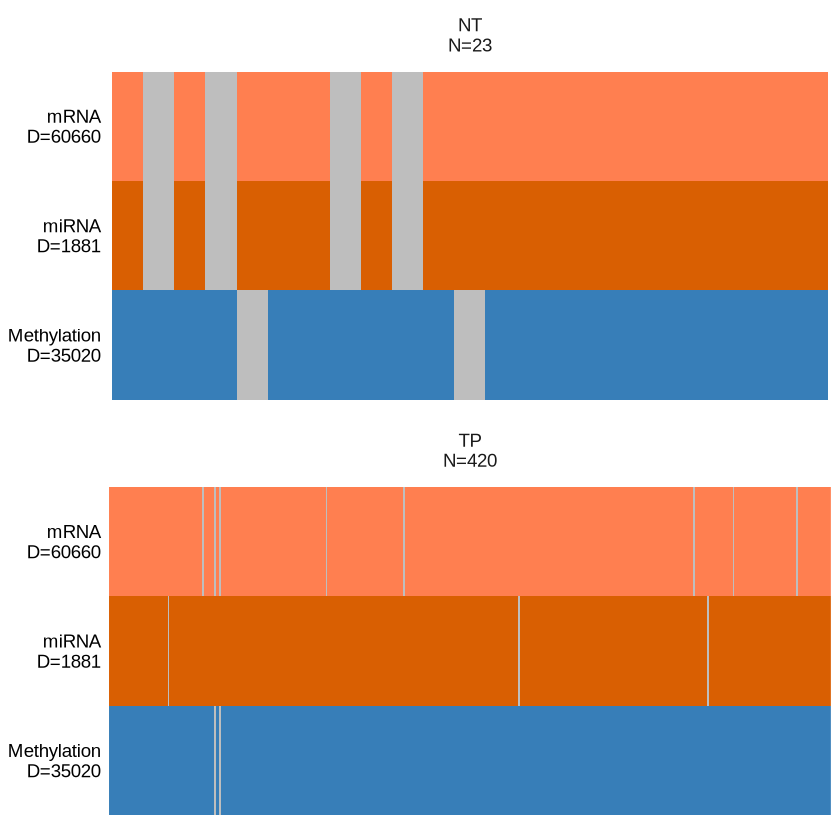

In [330]:
plot_data_overview(model)

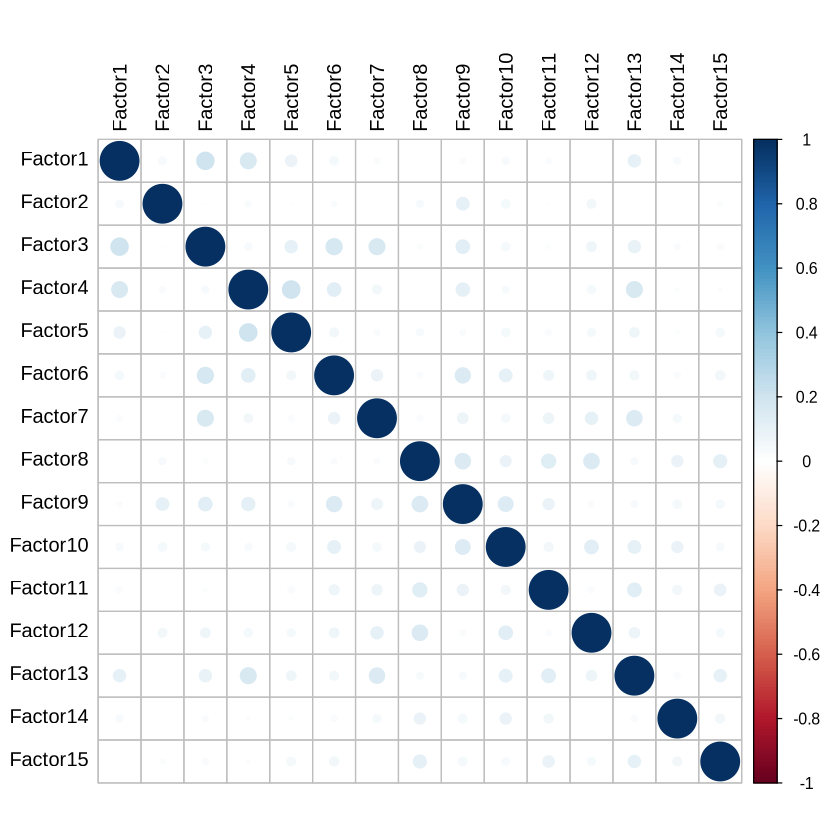

In [331]:
plot_factor_cor(model)

In [332]:
# Total variance explained per view and group
head(model@cache$variance_explained$r2_total)

$NT
       mRNA       miRNA Methylation 
  22.279054    4.516929   50.712052 

$TP
       mRNA       miRNA Methylation 
   29.76347    14.07508    50.33786

In [333]:
# Variance explained for every factor in per view and group
head(model@cache$variance_explained$r2_per_factor)

,mRNA,miRNA,Methylation
Factor1,6.064588e+00,2.24218965,6.724024e+00
Factor2,1.288885e+01,2.88316011,1.608771e+01
Factor3,3.236532e-03,0.00000000,7.125717e+00
Factor4,1.788139e-05,0.00000000,9.289402e+00
Factor5,1.354498e+00,0.52785873,1.160151e+00
Factor6,1.006365e-01,-0.01802444,8.190811e-01
Factor7,1.941979e-01,-0.05179644,1.855135e-01
Factor8,1.622623e+00,0.00000000,1.456141e-02
Factor9,0.000000e+00,0.00000000,2.037358e+00
Factor10,0.000000e+00,0.00000000,3.445315e+00


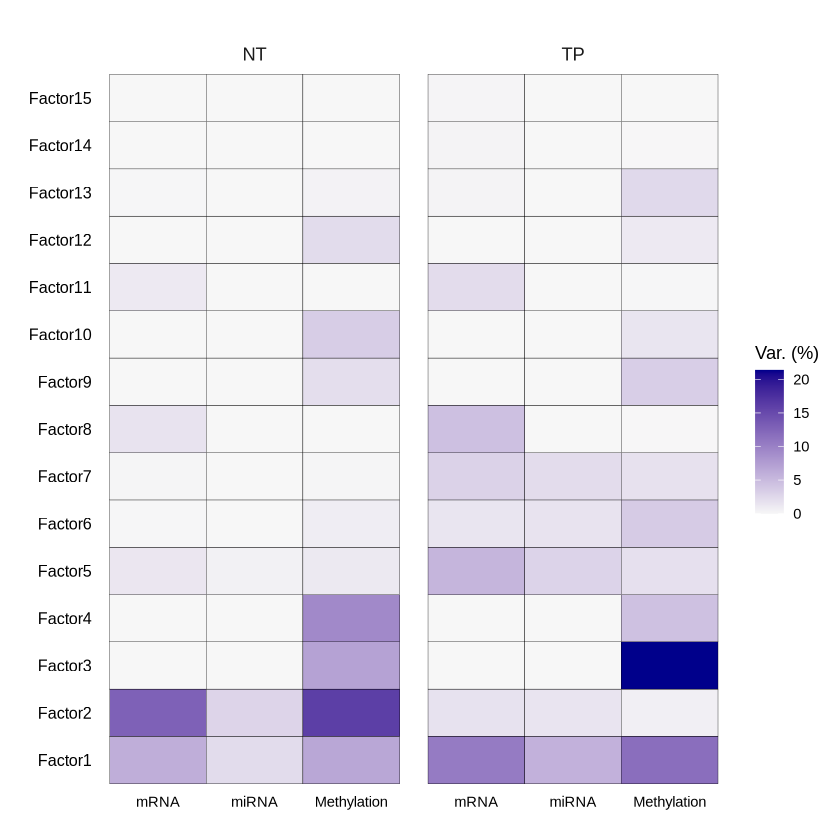

In [334]:
plot_variance_explained(model, x="view", y="factor")

### Save the plot from modelStage

In [65]:
# Generate the plot and store it in a variable
p <- plot_variance_explained(model, x = "view", y = "factor")

# Save the plot with increased width
ggsave("variance_explained_plot.png", plot = p, width = 15, height = 8)

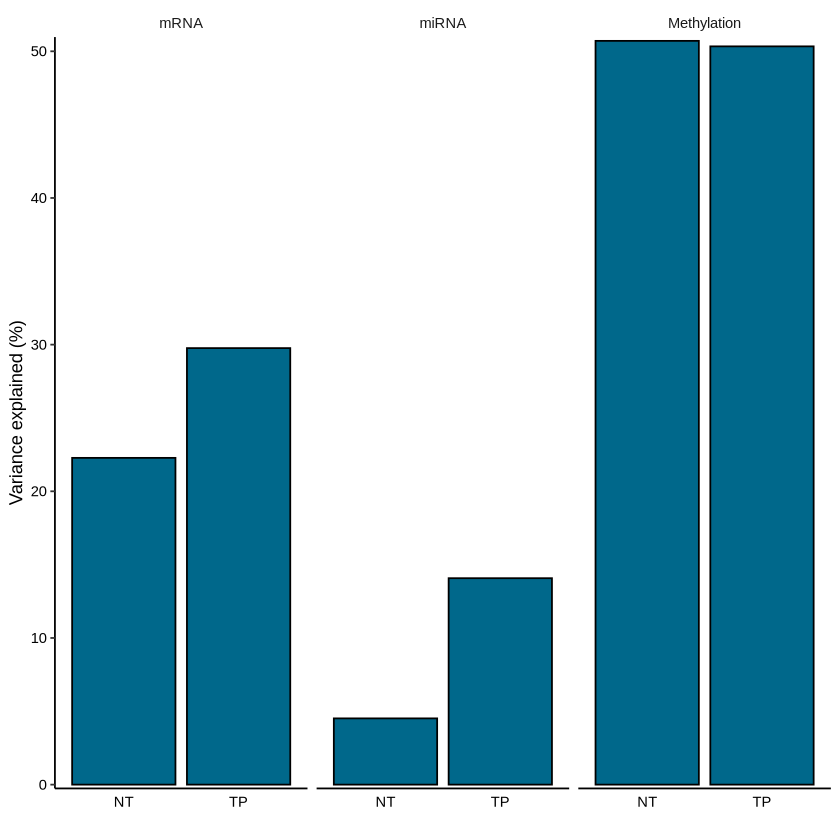

In [335]:
plot_variance_explained(model, x="group", y="factor", plot_total = T)[[2]]

In [106]:
colnames(model@samples_metadata)

[1] "group"                 "sample"                "ajcc_pathologic_stage"
 [4] "age_at_diagnosis"      "cigarettes_per_day"    "gender"               
 [7] "ethnicity"             "age_at_index"          "race"                 
[10] "days_to_death"

### plot_factor

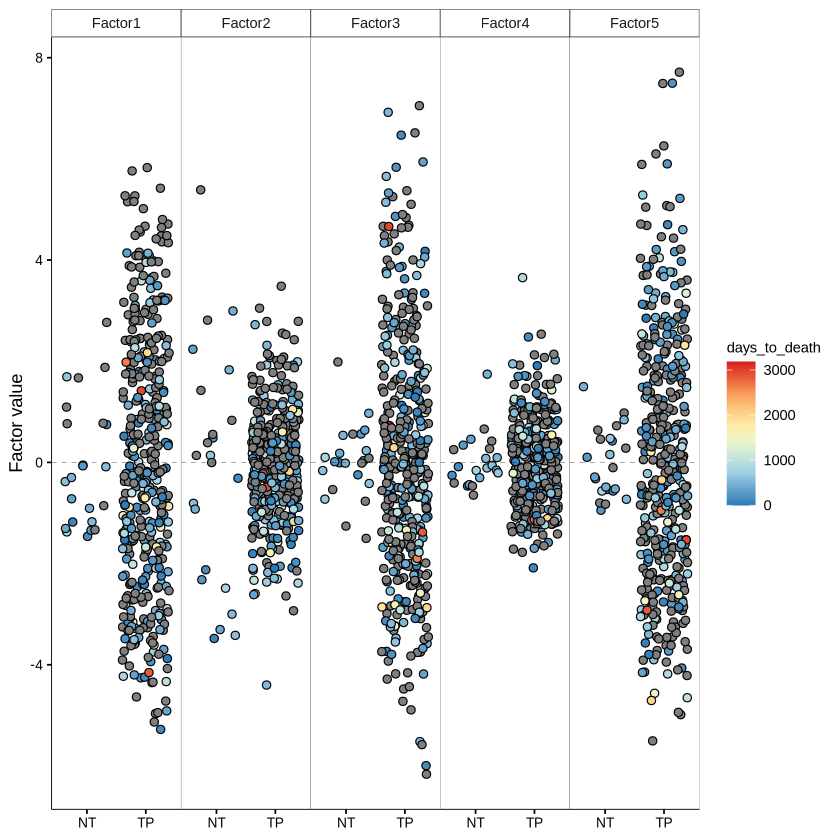

In [343]:
plot_factor(model, factor = 1:5, color_by = "days_to_death")

### Save the plot from modelStage

In [77]:
# Generate the plot and store it in a variable
p <- plot_factor(model, factor = 1:5, color_by = "days_to_death")

# Save the plot with increased width
ggsave("plot_factor_days_to_death.png", plot = p, width = 15, height = 8)

In [106]:
colnames(model@samples_metadata)

[1] "group"                 "sample"                "ajcc_pathologic_stage"
 [4] "age_at_diagnosis"      "cigarettes_per_day"    "gender"               
 [7] "ethnicity"             "age_at_index"          "race"                 
[10] "days_to_death"

In [118]:
head(model@samples_metadata$ethnicity)

[1] "not hispanic or latino" "not hispanic or latino" "not reported"          
[4] "not hispanic or latino" "not hispanic or latino" "not hispanic or latino"

In [349]:
p <- plot_factor(model, factors = c(1,2,3,4,5), color_by = "ajcc_pathologic_stage", dot_size = 3, dodge = T, legend = T, add_violin = T, violin_alpha = 0.25)

# The output of plot_factor is a ggplot2 object that we can edit
p <- p + 
  scale_color_manual(values=c("Stage I"="black", "Stage II"="green", "Stage III"="red", "Stage IV"="blue")) +
  scale_fill_manual(values=c("Stage I"="black", "Stage II"="green", "Stage III"="red", "Stage IV"="blue"))

# Save the plot with increased width
ggsave("plot_factor_ajcc_pathologic_stage.png", plot = p, width = 15, height = 8)

In [345]:
p <- plot_factor(model, factors = c(1,2,3,4,5), color_by = "gender", dot_size = 3, dodge = T, legend = T, add_violin = T, violin_alpha = 0.25)

# The output of plot_factor is a ggplot2 object that we can edit
p <- p + 
  scale_color_manual(values=c("male"="black", "female"="red")) +
  scale_fill_manual(values=c("male"="black", "female"="red"))

# Save the plot with increased width
ggsave("plot_factor_gender.png", plot = p, width = 15, height = 8)

In [347]:
p <- plot_factor(model, factors = c(1,2,3,4,5), color_by = "ethnicity", dot_size = 3, dodge = T, legend = T, add_violin = T, violin_alpha = 0.25)

# The output of plot_factor is a ggplot2 object that we can edit
p <- p + 
  scale_color_manual(values=c("hispanic or latino"="black", "not hispanic or latino"="green", "not reported"="red")) +
  scale_fill_manual(values=c("hispanic or latino"="black", "not hispanic or latino"="green", "not reported"="red"))

# Save the plot with increased width
ggsave("plot_factor_ethnicity.png", plot = p, width = 15, height = 8)

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


In [348]:
p <- plot_factor(model, factors = c(1,2,3,4,5), color_by = "race", dot_size = 3, dodge = T, legend = T, add_violin = T, violin_alpha = 0.25)

# The output of plot_factor is a ggplot2 object that we can edit
p <- p + 
  scale_color_manual(values=c("asian"="black", "black or african american"="green", "white"="blue", "not reported"="red")) +
  scale_fill_manual(values=c("asian"="black", "black or african american"="green", "white"="blue", "not reported"="red"))

# Save the plot with increased width
ggsave("plot_factor_race.png", plot = p, width = 15, height = 8)

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


### plot_factors

In [350]:
# Generate the plot and store it in a variable
p <- plot_factors(model, factors = 1:5, color_by = "group")

# Save the plot with increased width
ggsave("plot_factors.png", plot = p, width = 15, height = 8)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [ ]:
plot_top_weights(model, view = "mRNA", factor = 1, nfeatures = 10)

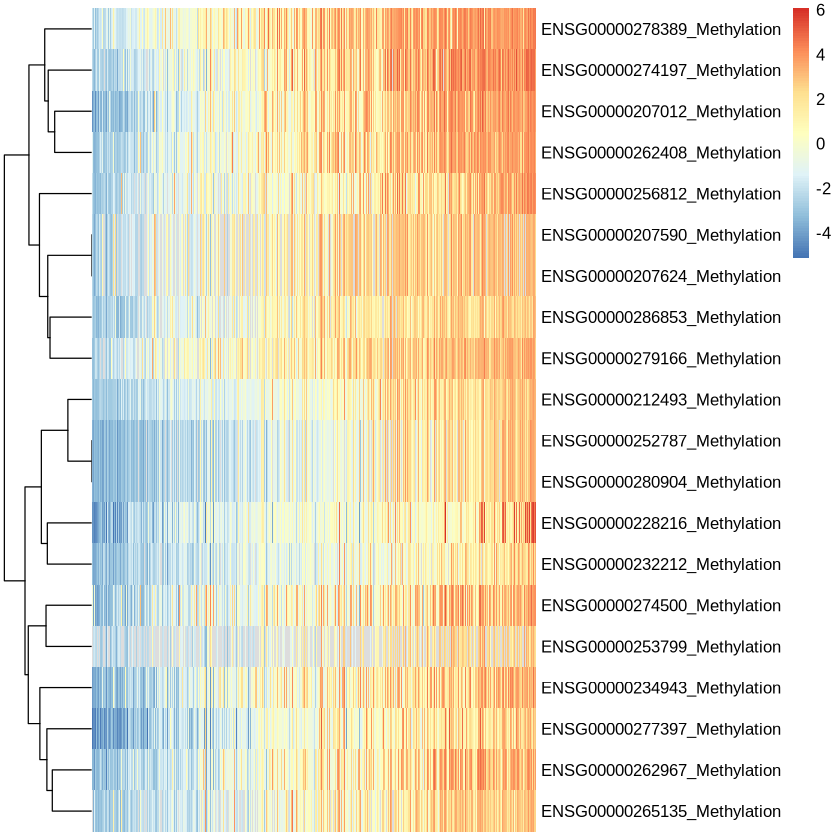

In [140]:
plot_data_heatmap(model,
  view = "Methylation",         # view of interest
  factor = 1,             # factor of interest
  features = 20,          # number of features to plot (they are selected by weight)
  
  # extra arguments that are passed to the `pheatmap` function
  cluster_rows = TRUE, cluster_cols = FALSE,
  show_rownames = TRUE, show_colnames = FALSE
)

### GSEA

In [408]:
colnames(reactomeGS) <- paste0(colnames(reactomeGS), "_methylation")
head(colnames(reactomeGS))

[1] "ENSG00000187634_methylation" "ENSG00000188976_methylation"
[3] "ENSG00000187961_methylation" "ENSG00000187583_methylation"
[5] "ENSG00000187642_methylation" "ENSG00000188290_methylation"

In [409]:
# data("reactomeGS")

enrichment.parametric <- run_enrichment(model,
  view = "Methylation", factors = 1:5,
  feature.sets = reactomeGS
)

Intersecting features names in the model and the gene set annotation results in a total of 18074 features.


Running feature set Enrichment Analysis with the following options...
View: Methylation 
Number of feature sets: 1275 
Set statistic: mean.diff 
Statistical test: parametric 







### Add suffix _methylation to match features names with colnames from gene set

In [421]:
data("MSigDB_v6.0_C5_human")

colnames(MSigDB_v6.0_C5_human) <- paste0(colnames(MSigDB_v6.0_C5_human), "_methylation")
head(colnames(MSigDB_v6.0_C5_human))

enrichment.parametric <- run_enrichment(model,
  view = "Methylation", factors = 1:5,
  feature.sets = MSigDB_v6.0_C5_human
)

[1] "ENSG00000186092_methylation" "ENSG00000237683_methylation"
[3] "ENSG00000235249_methylation" "ENSG00000185097_methylation"
[5] "ENSG00000269831_methylation" "ENSG00000187634_methylation"

Intersecting features names in the model and the gene set annotation results in a total of 18618 features.


Running feature set Enrichment Analysis with the following options...
View: Methylation 
Number of feature sets: 4407 
Set statistic: mean.diff 
Statistical test: parametric 







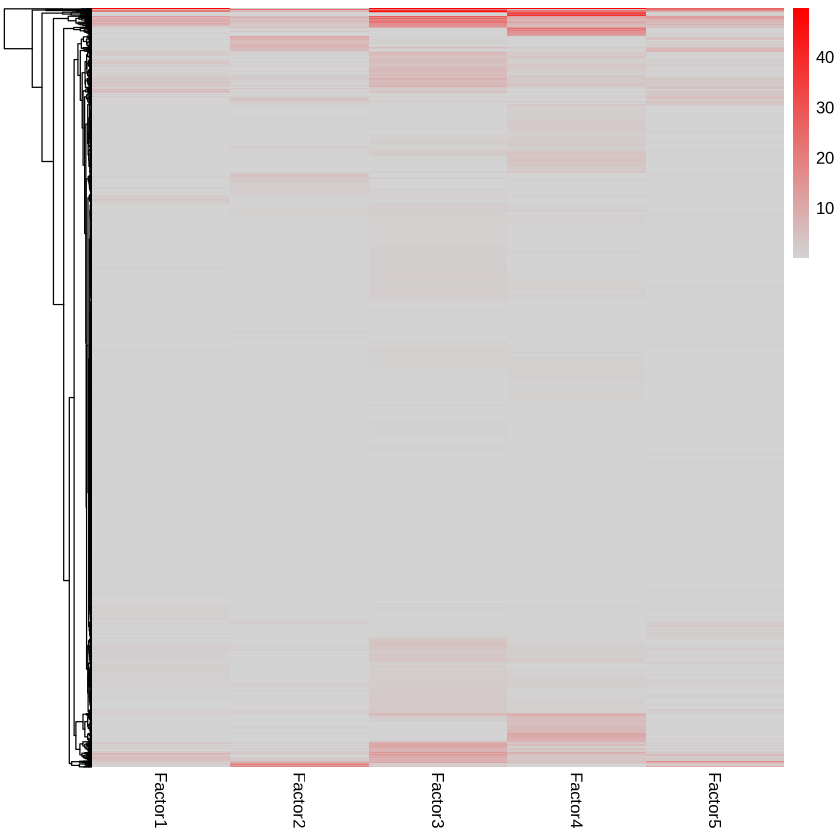

In [422]:
plot_enrichment_heatmap(enrichment.parametric)

In [423]:
for (x in 1:5){
    file=paste0("plot_enrichment_",as.character(x),".png")
    
    # Generate the plot and store it in a variable
    p <- plot_enrichment(enrichment.parametric, 
      factor = x, 
      max.pathways = 15
    )
    
    # Save the plot with increased width
    ggsave(file, plot = p, width = 15, height = 8)
}

In [424]:
for (x in 1:5){
    file=paste0("plot_enrichment_detailed_",as.character(x),".png")
    
    # Generate the plot and store it in a variable
    p <- plot_enrichment_detailed(enrichment.parametric, 
      factor = x
    )
    
    # Save the plot with increased width
    ggsave(file, plot = p, width = 15, height = 8)
}

### Remove pathways with rownames NA for reactomeGS

In [413]:
dim(enrichment.parametric$pval)
enrichment.parametric$feature.sets <- enrichment.parametric$feature.sets[! rownames(enrichment.parametric$feature.sets) %in% NA, ]
enrichment.parametric$pval <- enrichment.parametric$pval[! rownames(enrichment.parametric$pval) %in% NA, ]
enrichment.parametric$pval.adj <- enrichment.parametric$pval.adj[! rownames(enrichment.parametric$pval.adj) %in% NA, ]
enrichment.parametric$set.statistics <- enrichment.parametric$set.statistics[! rownames(enrichment.parametric$set.statistics) %in% NA, ]
dim(enrichment.parametric$pval)

[1] 1275    5

[1] 1274    5

# Integration


## mRNA
## Take barcode, sample_ids, patient, shortLetterCode ,definition and tumor stage data from dataPrep (mRNA)

In [25]:
barcode <- colnames(data_matrix)
sample_ids <- ""
sample_ids <- apply(as.matrix(barcode),1, function (x){dataPrep$sample[which(dataPrep$barcode %in% x)]})
definition <- ""
definition <- apply(as.matrix(barcode),1, function (x){dataPrep$definition[which(dataPrep$barcode %in% x)]})
stage <- ""
stage <- apply(as.matrix(barcode),1, function (x){dataPrep$ajcc_pathologic_stage[which(dataPrep$barcode %in% x)]})

In [26]:
mrna_info_df <- data.frame(barcode,sample_ids,definition,stage)
head(mrna_info_df)

,barcode,sample_ids,definition,stage
,<chr>,<chr>,<chr>,<chr>
1,TCGA-2F-A9KO-01A-11R-A38B-07,TCGA-2F-A9KO-01A,Primary solid Tumor,Stage IV
2,TCGA-2F-A9KP-01A-11R-A38B-07,TCGA-2F-A9KP-01A,Primary solid Tumor,Stage IV
3,TCGA-2F-A9KQ-01A-11R-A38B-07,TCGA-2F-A9KQ-01A,Primary solid Tumor,Stage III
4,TCGA-2F-A9KR-01A-11R-A38B-07,TCGA-2F-A9KR-01A,Primary solid Tumor,Stage III
5,TCGA-2F-A9KT-01A-11R-A38B-07,TCGA-2F-A9KT-01A,Primary solid Tumor,Stage II
6,TCGA-2F-A9KW-01A-11R-A38B-07,TCGA-2F-A9KW-01A,Primary solid Tumor,Stage III


### Add "-1" at the end of duplicate sample ids to modified_sample_ids to make integration easier.

In [ ]:
# mrna_info_df$modified_sample_ids <- mrna_info_df$sample_ids
# modified_ids <- which(duplicated(mrna_info_df$sample_ids))
# mrna_info_df$modified_sample_ids[modified_ids] <- paste0(mrna_info_df$modified_sample_ids[modified_ids], "-1")
# head(mrna_info_df)

In [19]:
# saveRDS(mrna_info_df, file="mrna_info_df.rds")

In [48]:
# mrna_info_df <- readRDS("mrna_info_df.rds")

### Replace barcodes with sample ids at colnames

In [27]:
colnames(data_matrix) <- apply(as.matrix(colnames(data_matrix)),1, function (x){dataPrep$sample[which(dataPrep$barcode %in% x)]})
head(data_matrix)

,TCGA-2F-A9KO-01A,TCGA-2F-A9KP-01A,TCGA-2F-A9KQ-01A,TCGA-2F-A9KR-01A,TCGA-2F-A9KT-01A,TCGA-2F-A9KW-01A,TCGA-4Z-AA7M-01A,TCGA-4Z-AA7N-01A,TCGA-4Z-AA7O-01A,TCGA-4Z-AA7Q-01A,⋯,TCGA-CU-A0YR-11A,TCGA-GC-A3BM-11A,TCGA-GC-A3WC-11A,TCGA-GC-A6I3-11A,TCGA-GD-A2C5-11A,TCGA-GD-A3OP-11A,TCGA-GD-A3OQ-11A,TCGA-K4-A3WV-11A,TCGA-K4-A54R-11A,TCGA-K4-A5RI-11A
ENSG00000000003.15,108.0135,186.7056,72.4201,73.9806,76.9549,49.0722,159.5696,69.2064,155.7212,50.5693,⋯,27.3519,66.9105,39.2798,56.5882,152.7241,105.0533,125.2822,149.4164,77.8400,48.6603
ENSG00000000005.6,0.0000,0.1976,0.0411,0.0521,0.0000,0.0000,0.2330,0.1677,0.0000,0.0000,⋯,2.5092,0.2993,0.6569,0.0000,0.1715,0.0968,0.1468,0.2980,0.6020,0.2206
ENSG00000000419.13,204.8328,160.0243,99.3833,130.6741,254.8962,141.8646,191.0809,112.4019,85.7129,65.7745,⋯,74.0063,95.1648,81.6075,72.1844,115.9472,97.5357,82.1939,94.4974,105.4736,100.1734
ENSG00000000457.14,12.7153,8.6971,8.5596,9.7330,6.2762,6.2773,12.6685,5.0176,10.4437,7.8561,⋯,6.3928,3.9367,5.9285,3.9360,4.2650,4.4628,9.8345,7.9554,3.6381,5.3825
ENSG00000000460.17,9.2959,10.0028,3.7096,4.2981,4.8005,12.0951,22.3698,3.3797,10.0988,4.5288,⋯,1.6691,2.1460,1.5430,4.4411,2.9673,1.2684,2.4673,3.2538,1.6372,0.9597
ENSG00000000938.13,10.3989,2.4793,5.5616,13.2662,11.2466,8.4259,4.4497,15.3726,6.7245,12.7909,⋯,11.9936,10.2761,10.6082,16.5978,15.8787,14.0674,11.0964,6.9791,13.3277,30.6876


### Transpose matrix

In [28]:
data_matrix<- t(data_matrix)
head(data_matrix)

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,⋯,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
TCGA-2F-A9KO-01A,108.0135,0.0000,204.8328,12.7153,9.2959,10.3989,85.2727,41.1606,67.2226,31.8547,⋯,0,0.000,0.6794,0,0,0.0000,8.3029,0,0.0252,0.0960
TCGA-2F-A9KP-01A,186.7056,0.1976,160.0243,8.6971,10.0028,2.4793,4.2396,74.9811,53.5222,42.5699,⋯,0,0.000,0.6909,0,0,0.0000,16.1807,0,0.0758,2.6909
TCGA-2F-A9KQ-01A,72.4201,0.0411,99.3833,8.5596,3.7096,5.5616,4.1743,65.1908,22.9030,23.6429,⋯,0,0.000,0.3194,0,0,0.0152,5.9433,0,0.0189,1.0113
TCGA-2F-A9KR-01A,73.9806,0.0521,130.6741,9.7330,4.2981,13.2662,52.5459,39.7470,39.5808,62.8356,⋯,0,0.000,0.8493,0,0,0.0000,14.1152,0,0.0479,0.8689
TCGA-2F-A9KT-01A,76.9549,0.0000,254.8962,6.2762,4.8005,11.2466,3.8422,73.8138,14.1576,33.3147,⋯,0,1.756,1.3681,0,0,0.0000,10.9036,0,0.0438,1.4425
TCGA-2F-A9KW-01A,49.0722,0.0000,141.8646,6.2773,12.0951,8.4259,9.2803,102.0816,7.9203,18.7707,⋯,0,1.401,0.7080,0,0,0.0000,7.6757,0,0.0087,0.7505


### Paste "-1" at the end of duplicated sample ids to make easier the integration

In [44]:
# duplicated_mrna <- which(duplicated(rownames(data_matrix)))
# rownames(data_matrix)[duplicated_mrna] <- paste0(rownames(data_matrix)[duplicated_mrna], "-1")

In [27]:
# rownames(data_matrix)[duplicated_mrna]
# grep("-1$", rownames(data_matrix), value = TRUE)

[1] "TCGA-BL-A0C8-01A-1" "TCGA-BL-A13I-01A-1" "TCGA-BL-A13J-01A-1"

## miRNA

In [29]:
head(data_matrix_miR, 2)

,TCGA-DK-A2I2-01A-11R-A17X-13,TCGA-E7-A6MF-01A-12R-A32J-13,TCGA-DK-A3IV-01A-22R-A21E-13,TCGA-FD-A6TA-01A-12R-A33A-13,TCGA-FD-A62S-01A-11R-A30J-13,TCGA-BT-A20T-01A-11R-A14X-13,TCGA-UY-A78M-01A-21R-A358-13,TCGA-DK-AA6L-01A-11R-A39B-13,TCGA-FD-A5BT-01A-11R-A26X-13,TCGA-KQ-A41S-01A-12R-A33A-13,⋯,TCGA-BT-A2LB-11A-11R-A18B-13,TCGA-GC-A3WC-11A-11R-A22V-13,TCGA-BL-A13J-11A-13R-A10V-13,TCGA-CU-A0YR-11A-13R-A10V-13,TCGA-BT-A2LA-11A-11R-A18B-13,TCGA-BT-A20U-11A-11R-A14X-13,TCGA-K4-A54R-11A-11R-A26X-13,TCGA-GD-A2C5-11A-11R-A17X-13,TCGA-CU-A0YN-11A-11R-A10V-13,TCGA-BT-A20Q-11A-11R-A14X-13
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-let-7a-1,4227.118,25109.46,9249.861,5408.821,5888.805,11645.36,5980.638,9529.839,6661.821,5619.656,⋯,8035.191,4950.450,3714.047,4619.003,11074.03,5780.253,8489.891,10270.60,4260.987,1261.238
hsa-let-7a-2,4233.940,25246.36,9116.643,5383.290,5912.460,11593.18,5987.890,9518.207,6645.946,5643.309,⋯,7985.394,4925.318,3717.455,4607.383,11031.28,5632.738,8302.043,10187.51,4336.998,1260.830


### Keep 16 first characters of barcode that are the sample id

In [30]:
colnames(data_matrix_miR) <- substr(colnames(data_matrix_miR), 1, 16)   
head(data_matrix_miR)

,TCGA-DK-A2I2-01A,TCGA-E7-A6MF-01A,TCGA-DK-A3IV-01A,TCGA-FD-A6TA-01A,TCGA-FD-A62S-01A,TCGA-BT-A20T-01A,TCGA-UY-A78M-01A,TCGA-DK-AA6L-01A,TCGA-FD-A5BT-01A,TCGA-KQ-A41S-01A,⋯,TCGA-BT-A2LB-11A,TCGA-GC-A3WC-11A,TCGA-BL-A13J-11A,TCGA-CU-A0YR-11A,TCGA-BT-A2LA-11A,TCGA-BT-A20U-11A,TCGA-K4-A54R-11A,TCGA-GD-A2C5-11A,TCGA-CU-A0YN-11A,TCGA-BT-A20Q-11A
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-let-7a-1,4227.1177,25109.4564,9249.8609,5408.8206,5888.8051,11645.356,5980.6385,9529.8385,6661.8208,5619.6561,⋯,8035.1911,4950.4501,3714.0472,4619.0035,11074.0287,5780.2525,8489.8909,10270.5963,4260.9867,1261.2378
hsa-let-7a-2,4233.9404,25246.3643,9116.6426,5383.2897,5912.4601,11593.182,5987.8897,9518.2066,6645.9460,5643.3093,⋯,7985.3940,4925.3184,3717.4546,4607.3831,11031.2758,5632.7381,8302.0429,10187.5130,4336.9983,1260.8299
hsa-let-7a-3,4268.5087,25491.1219,9274.9561,5376.3415,5971.2392,11779.430,6066.9944,9486.5916,6757.2302,5669.5452,⋯,8007.1540,4936.2668,3707.3048,4590.1914,11046.6361,5640.2158,8477.7264,10249.8755,4327.4969,1243.1743
hsa-let-7b,4716.7601,23586.7060,12412.2601,7233.1442,5388.8961,19418.633,5901.8635,13403.8706,13138.1145,4467.7218,⋯,10492.2676,5002.7041,3274.1237,5613.8951,15188.8047,8621.7738,12019.2358,11618.6477,4884.2489,1274.4067
hsa-let-7c,312.4797,1066.2047,475.8749,573.7974,760.9742,1329.520,384.3166,898.9401,2784.5112,932.9390,⋯,4830.4603,2524.6176,1882.3619,2935.4876,2578.8711,2897.2641,2251.6037,4651.8635,2379.6982,461.2593
hsa-let-7d,822.3628,813.0649,737.1056,409.7861,545.9288,355.206,593.6142,366.8534,780.5932,452.9437,⋯,562.9725,244.8476,190.7447,226.9945,568.7162,205.9763,447.5135,473.0743,162.3582,132.0381


### Transpose matrix 

In [31]:
data_matrix_miR <- t(as.matrix(data_matrix_miR))
head(data_matrix_miR)

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,⋯,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-DK-A2I2-01A,4227.118,4233.940,4268.509,4716.760,312.4797,822.3628,1067.5252,3774.545,3860.056,433.6963,⋯,0,9.096934,0.682270,35.93289,0.454847,0,100.521118,65.49792,124.4006,16710.84
TCGA-E7-A6MF-01A,25109.456,25246.364,25491.122,23586.706,1066.2047,813.0649,2279.3758,10773.250,10957.656,881.2394,⋯,0,2.794038,0.000000,78.23305,0.558808,0,6.146883,35.20487,368.2541,27880.58
TCGA-DK-A3IV-01A,9249.861,9116.643,9274.956,12412.260,475.8749,737.1056,1141.1655,6222.682,6259.658,786.4951,⋯,0,14.149437,0.000000,12.41413,1.601823,0,16.285201,61.00276,168.9923,17873.94
TCGA-FD-A6TA-01A,5408.821,5383.290,5376.341,7233.144,573.7974,409.7861,1528.6184,2816.794,2828.106,516.4339,⋯,0,3.878102,0.000000,38.61943,0.484763,0,23.268609,74.65345,171.7676,41512.01
TCGA-FD-A62S-01A,5888.805,5912.460,5971.239,5388.896,760.9742,545.9288,1126.4082,4066.653,4198.834,362.8534,⋯,0,4.157546,0.000000,56.48528,0.286727,0,16.343456,67.66764,171.1762,18888.30
TCGA-BT-A20T-01A,11645.356,11593.182,11779.430,19418.633,1329.5198,355.2060,937.0036,5790.979,5776.419,332.4558,⋯,0,6.673383,0.303336,74.31721,0.910007,0,18.503470,99.19073,176.5413,13970.12


### Paste "-1" at the end of duplicated sample ids to make easier the integration

In [48]:
# duplicated_mirna <- which(duplicated(rownames(data_matrix_miR)))
# rownames(data_matrix_miR)[duplicated_mirna] <- paste0(rownames(data_matrix_miR)[duplicated_mirna], "-1")

In [49]:
# rownames(data_matrix_miR)[duplicated_mirna]
# grep("-1$", rownames(data_matrix_miR), value = TRUE)

[1] "TCGA-C4-A0F7-01A-1" "TCGA-C4-A0F1-01A-1" "TCGA-BL-A0C8-01A-1"
[4] "TCGA-BL-A13I-01A-1" "TCGA-BL-A13J-01A-1"

[1] "TCGA-C4-A0F7-01A-1" "TCGA-C4-A0F1-01A-1" "TCGA-BL-A0C8-01A-1"
[4] "TCGA-BL-A13I-01A-1" "TCGA-BL-A13J-01A-1"

In [ ]:
# duplicated_mirna

## Meth

## Take sample_ids, patient, shortLetterCode, definition and tumor stage data from data_met (methylation). If they are duplicated i take only the first row that has the same data with duplicates

In [33]:
duplicated_rows <- duplicated(colData(data_met)$sample) 
sample_ids <- colData(data_met)[!duplicated_rows,"sample"]
definition <- colData(data_met)[!duplicated_rows,"definition"]
stage <- colData(data_met)[!duplicated_rows,"ajcc_pathologic_stage"]
info_df <- data.frame(sample_ids,definition,stage)
head(info_df)

,sample_ids,definition,stage
,<chr>,<chr>,<chr>
1,TCGA-FD-A3NA-01A,Primary solid Tumor,Stage II
2,TCGA-E7-A6MF-01A,Primary solid Tumor,Stage II
3,TCGA-UY-A9PB-01A,Primary solid Tumor,Stage III
4,TCGA-E7-A4IJ-01A,Primary solid Tumor,Stage II
5,TCGA-DK-A3IV-01A,Primary solid Tumor,Stage II
6,TCGA-FD-A6TA-01A,Primary solid Tumor,Stage IV


## Combine metadata from methylation and mRNA 

In [35]:
# remove barcode column from mrna_info_df, in order to have the same columns with info_df
mrna_info_df <- mrna_info_df[c("sample_ids","definition","stage")]
# Combine dataframes and remove duplicates based on sample_ids
combined_df <- bind_rows(mrna_info_df, info_df) %>% distinct(sample_ids, .keep_all = TRUE)
# .keep_all = TRUE ensures that all columns are kept in the resulting dataframe

head(combined_df, 2)

,sample_ids,definition,stage
,<chr>,<chr>,<chr>
1,TCGA-2F-A9KO-01A,Primary solid Tumor,Stage IV
2,TCGA-2F-A9KP-01A,Primary solid Tumor,Stage IV


In [ ]:
# missing_elements <- colData(dataPrep)$sample[!(colData(dataPrep)$sample %in% colData(data_met)$sample)]
# missing_patient <- apply(as.matrix(missing_elements),1, function (x){colData(dataPrep)$patient[which(colData(dataPrep)$sample %in% x)]})
# missing_shortLetterCode <- apply(as.matrix(missing_elements),1, function (x){colData(dataPrep)$shortLetterCode[which(colData(dataPrep)$sample %in% x)]})
# missing_definition <- apply(as.matrix(missing_elements),1, function (x){colData(dataPrep)$definition[which(colData(dataPrep)$sample %in% x)]})
# missing_stage <- apply(as.matrix(missing_elements),1, function (x){colData(dataPrep)$ajcc_pathologic_stage[which(colData(dataPrep)$sample %in% x)]})
# missing_info_df <- data.frame(sample_ids = missing_elements,patient = missing_patient,shortLetterCode = missing_shortLetterCode, definition = missing_definition,stage = missing_stage)
# missing_info_df

In [ ]:
# missing_elements <- colData(dataPrep)$sample[!(colData(dataPrep)$sample %in% colData(data_met)$sample)]
# missing_sample_ids <- missing_elements
# missing_patient <- apply(as.matrix(missing_sample_ids),1, function (x){colData(dataPrep)$patient[which(colData(dataPrep)$sample %in% x)]})
# missing_shortLetterCode <- apply(as.matrix(missing_sample_ids),1, function (x){colData(dataPrep)$shortLetterCode[which(colData(dataPrep)$sample %in% x)]})
# missing_definition <- apply(as.matrix(missing_sample_ids),1, function (x){colData(dataPrep)$definition[which(colData(dataPrep)$sample %in% x)]})
# missing_stage <- apply(as.matrix(missing_sample_ids),1, function (x){colData(dataPrep)$ajcc_pathologic_stage[which(colData(dataPrep)$sample %in% x)]})
# missing_info_df <- data.frame(sample_ids = missing_sample_ids,patient = missing_patient,shortLetterCode = missing_shortLetterCode, definition = missing_definition,stage = missing_stage)
# missing_info_df

In [175]:
# dim(info_df)

[1] 436   5

## Add missing data to methylation

In [176]:
# info_df <- rbind(info_df,missing_info_df)
# dim(info_df)

[1] 438   5

In [54]:
saveRDS(combined_df, file="info_df.rds")

In [36]:
# info_df <- readRDS("info_df.rds")
info_df <- combined_df

In [37]:
head(info_df, 2)

,sample_ids,definition,stage
,<chr>,<chr>,<chr>
1,TCGA-2F-A9KO-01A,Primary solid Tumor,Stage IV
2,TCGA-2F-A9KP-01A,Primary solid Tumor,Stage IV


In [38]:
length(which(info_df[,2] %in% "Primary solid Tumor"))
length(which(info_df[,2] %in% "Solid Tissue Normal"))

[1] 415

[1] 23

## Replace barcodes of meth matrix with sample ids

In [39]:
# meth_matrix <- readRDS("meth_mat_mean_with_na.rds")
meth_matrix <- meth_mat_mean
head(meth_matrix, 2)

,TCGA-FD-A3NA-01A-11D-A21B-05,TCGA-E7-A6MF-01A-12D-A32C-05,TCGA-UY-A9PB-01A-11D-A38H-05,TCGA-E7-A4IJ-01A-31D-A26N-05,TCGA-DK-A3IV-01A-22D-A21B-05,TCGA-FD-A6TA-01A-12D-A33I-05,TCGA-GU-A42R-01A-11D-A23O-05,TCGA-FD-A6TG-01A-11D-A32C-05,TCGA-UY-A78M-01A-21D-A34V-05,TCGA-FD-A5BT-01A-11D-A26N-05,⋯,TCGA-BT-A20W-11A-11D-A14Z-05,TCGA-K4-A5RI-11A-11D-A28N-05,TCGA-BT-A20V-11A-11D-A14Z-05,TCGA-BT-A20N-11A-11D-A14Z-05,TCGA-K4-A3WV-11A-21D-A231-05,TCGA-BT-A20P-11A-11D-A14Z-05,TCGA-CU-A0YN-11A-11D-A10W-05,TCGA-GD-A2C5-11A-11D-A17Y-05,TCGA-BL-A13J-11A-13D-A10W-05,TCGA-GD-A3OQ-11A-21D-A223-05
ENSG00000000003,0.2387135,0.1505393,0.2540724,0.2260951,0.1840992,0.2290696,0.2191703,0.1775396,0.3547583,0.2720790,⋯,0.2748137,0.3906787,0.3747581,0.3083741,0.4227088,0.4090733,0.2547194,0.3605443,0.314627,0.2483492
ENSG00000000005,0.6058278,0.7249236,0.5613239,0.4849353,0.8291706,0.7311190,0.9230132,0.6664457,0.4779466,0.6910677,⋯,0.8818483,0.7182355,0.7884270,0.8820460,0.8282769,0.7486529,0.8910061,0.7565295,0.905079,0.9114697


In [40]:
colnames(meth_matrix) <- apply(as.matrix(colnames(meth_matrix)),1, function (x){data_met$sample[which(data_met$barcode %in% x)]})
head(meth_matrix, 2)

,TCGA-FD-A3NA-01A,TCGA-E7-A6MF-01A,TCGA-UY-A9PB-01A,TCGA-E7-A4IJ-01A,TCGA-DK-A3IV-01A,TCGA-FD-A6TA-01A,TCGA-GU-A42R-01A,TCGA-FD-A6TG-01A,TCGA-UY-A78M-01A,TCGA-FD-A5BT-01A,⋯,TCGA-BT-A20W-11A,TCGA-K4-A5RI-11A,TCGA-BT-A20V-11A,TCGA-BT-A20N-11A,TCGA-K4-A3WV-11A,TCGA-BT-A20P-11A,TCGA-CU-A0YN-11A,TCGA-GD-A2C5-11A,TCGA-BL-A13J-11A,TCGA-GD-A3OQ-11A
ENSG00000000003,0.2387135,0.1505393,0.2540724,0.2260951,0.1840992,0.2290696,0.2191703,0.1775396,0.3547583,0.2720790,⋯,0.2748137,0.3906787,0.3747581,0.3083741,0.4227088,0.4090733,0.2547194,0.3605443,0.314627,0.2483492
ENSG00000000005,0.6058278,0.7249236,0.5613239,0.4849353,0.8291706,0.7311190,0.9230132,0.6664457,0.4779466,0.6910677,⋯,0.8818483,0.7182355,0.7884270,0.8820460,0.8282769,0.7486529,0.8910061,0.7565295,0.905079,0.9114697


## Transpose matrix

In [41]:
meth_matrix <- t(meth_matrix)
head(meth_matrix, 2)

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,⋯,ENSG00000288660,ENSG00000288661,ENSG00000288662,ENSG00000288663,ENSG00000288665,ENSG00000288669,ENSG00000288670,ENSG00000288671,ENSG00000288674,ENSG00000288675
TCGA-FD-A3NA-01A,0.2387135,0.6058278,0.1178325,0.2670827,0.4436307,0.5438053,0.6216070,0.3544977,0.4259433,0.10318446,⋯,0.03078356,0.08131249,0.9159662,0.1571971,0.9499048,0.3749561,0.4822817,0.3478446,0.5823420,0.21956767
TCGA-E7-A6MF-01A,0.1505393,0.7249236,0.1234904,0.2168660,0.3737125,0.4496814,0.6661692,0.3657452,0.3195113,0.07328518,⋯,0.03299015,0.05519355,0.9305587,0.1635864,0.9376853,0.5153893,0.5477752,0.3307829,0.4846426,0.04450059


## Paste "-1" at the end of duplicated sample ids to make easier the integration

In [63]:
# duplicated_meth <- which(duplicated(rownames(meth_matrix)))
# rownames(meth_matrix)[duplicated_meth] <- paste0(rownames(meth_matrix)[duplicated_meth], "-1")

## Combine the rownames from the three matrices, keep only unique names (the duplictes have -1) and sort them 

In [42]:
rownames_data_matrix <- rownames(data_matrix)
rownames_data_matrix_miR <- rownames(data_matrix_miR)
rownames_data_matrix_meth <- rownames(meth_matrix)
all_rownames <- c(rownames_data_matrix, rownames_data_matrix_miR, rownames_data_matrix_meth)
unique_rownames <- unique(all_rownames)
head(unique_rownames,10)
sorted_rownames <- sort(unique_rownames)
head(sorted_rownames,10)

[1] "TCGA-2F-A9KO-01A" "TCGA-2F-A9KP-01A" "TCGA-2F-A9KQ-01A" "TCGA-2F-A9KR-01A"
 [5] "TCGA-2F-A9KT-01A" "TCGA-2F-A9KW-01A" "TCGA-4Z-AA7M-01A" "TCGA-4Z-AA7N-01A"
 [9] "TCGA-4Z-AA7O-01A" "TCGA-4Z-AA7Q-01A"

[1] "TCGA-2F-A9KO-01A" "TCGA-2F-A9KP-01A" "TCGA-2F-A9KQ-01A" "TCGA-2F-A9KR-01A"
 [5] "TCGA-2F-A9KT-01A" "TCGA-2F-A9KW-01A" "TCGA-4Z-AA7M-01A" "TCGA-4Z-AA7N-01A"
 [9] "TCGA-4Z-AA7O-01A" "TCGA-4Z-AA7Q-01A"

## Create matrix with unique sorted rownames with the mRNA data

In [44]:
mrna_new_matrix <- matrix(NA, nrow=length(sorted_rownames), ncol=ncol(data_matrix))

rownames(mrna_new_matrix) <- sorted_rownames
colnames(mrna_new_matrix) <- colnames(data_matrix)

rows <- rownames(data_matrix)

mrna_new_matrix[rows, ] <- data_matrix[rows, ]
head(mrna_new_matrix, 2)

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,⋯,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
TCGA-2F-A9KO-01A,108.0135,0.0000,204.8328,12.7153,9.2959,10.3989,85.2727,41.1606,67.2226,31.8547,⋯,0,0,0.6794,0,0,0,8.3029,0,0.0252,0.0960
TCGA-2F-A9KP-01A,186.7056,0.1976,160.0243,8.6971,10.0028,2.4793,4.2396,74.9811,53.5222,42.5699,⋯,0,0,0.6909,0,0,0,16.1807,0,0.0758,2.6909


## Create matrix with unique sorted rownames with the miRNA data

In [45]:
mirna_new_matrix <- matrix(NA, nrow=length(sorted_rownames), ncol=ncol(data_matrix_miR))

rownames(mirna_new_matrix) <- sorted_rownames
colnames(mirna_new_matrix) <- colnames(data_matrix_miR)

rows_miR <- rownames(data_matrix_miR)

mirna_new_matrix[rows_miR, ] <- data_matrix_miR[rows_miR, ]

head(mirna_new_matrix, 2)

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,⋯,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-2F-A9KO-01A,6524.370,6586.408,6499.498,7784.978,924.9867,486.8057,1044.313,5857.876,5835.241,820.7510,⋯,0,12.29589,0,46.66851,0.558904,0,31.01919,71.81921,269.3919,11301.88
TCGA-2F-A9KP-01A,9504.759,9390.219,9459.109,9552.484,1336.7170,824.6062,2085.378,6095.944,6189.319,988.5315,⋯,0,14.94002,0,153.13523,2.905004,0,29.46504,121.18018,426.2056,39032.88


## Create matrix with unique sorted rownames with the methylation data

In [46]:
meth_new_matrix <- matrix(NA, nrow=length(sorted_rownames), ncol=ncol(meth_matrix))

rownames(meth_new_matrix) <- sorted_rownames
colnames(meth_new_matrix) <- colnames(meth_matrix)

rows_meth <- rownames(meth_matrix)

meth_new_matrix[rows_meth, ] <- meth_matrix[rows_meth, ]

head(meth_new_matrix, 2)

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,⋯,ENSG00000288660,ENSG00000288661,ENSG00000288662,ENSG00000288663,ENSG00000288665,ENSG00000288669,ENSG00000288670,ENSG00000288671,ENSG00000288674,ENSG00000288675
TCGA-2F-A9KO-01A,0.2394464,0.7097371,0.1120982,0.2472042,0.3787665,0.5957354,0.6870111,0.3733785,0.4145771,0.08814444,⋯,0.02663823,0.08024848,0.9105245,0.1453717,0.9568479,0.3982586,0.4619482,0.3348622,0.5809571,0.04180154
TCGA-2F-A9KP-01A,0.2147344,0.6498132,0.1107724,0.2497395,0.4159610,0.4672069,0.5008788,0.3394948,0.4058621,0.10142295,⋯,0.02518052,0.06901229,0.8638966,0.1341083,0.9553381,0.4540479,0.4730336,0.3430407,0.5682173,0.04503908


In [47]:
dim(meth_new_matrix)
dim(mirna_new_matrix)
dim(mrna_new_matrix)

[1]   438 37930

[1]  438 1881

[1]   438 60660

In [25]:
# saveRDS(meth_new_matrix,"meth_new_matrix.rds")
# saveRDS(mirna_new_matrix,"mirna_new_matrix.rds")
# saveRDS(mrna_new_matrix,"mrna_new_matrix.rds")

In [110]:
# meth_new_matrix <- readRDS("meth_new_matrix.rds")
# mirna_new_matrix <- readRDS("mirna_new_matrix.rds")
# mrna_new_matrix <- readRDS("mrna_new_matrix.rds")
# info_df <- readRDS("info_df.rds")

## Remove "-1" from rownames

In [36]:
# rownames(mrna_new_matrix) <- gsub("\\-1$", "", rownames(meth_new_matrix))
# rownames(mirna_new_matrix) <- gsub("\\-1$", "", rownames(meth_new_matrix))
# rownames(meth_new_matrix) <- gsub("\\-1$", "", rownames(meth_new_matrix))
# grep(".*-1$", rownames(mrna_new_matrix), value = TRUE)
# grep(".*-1$", rownames(mirna_new_matrix), value = TRUE)
# grep(".*-1$", rownames(meth_new_matrix), value = TRUE)

character(0)

character(0)

character(0)

## Encode classes of data with numbers

In [69]:
dim(info_df)
head(info_df, 2)

[1] 438   3

,sample_ids,definition,stage
,<chr>,<chr>,<chr>
1,TCGA-CU-A3KJ-01A,Primary solid Tumor,Stage III
2,TCGA-K4-A3WU-01B,Primary solid Tumor,Stage III
3,TCGA-DK-A3IU-01A,Primary solid Tumor,Stage II
4,TCGA-GV-A40G-01A,Primary solid Tumor,Stage II
5,TCGA-DK-A3IN-01A,Primary solid Tumor,Stage III
6,TCGA-SY-A9G0-01A,Primary solid Tumor,Stage IV


In [70]:
# find the ids that end in -1
# info_df_for_duplicates <- data.frame(sample_ids = c(grep(".*-1$", unique_rownames, value = TRUE)))
# remove -1 in order to search for patients' metadata
# sample_ids_drom_duplicates <- gsub("\\-1$", "", info_df_for_duplicates$sample_ids)
# map ids that ends in -1 with patients' metadata 
# info_df_for_duplicates$definition <-   sapply(sample_ids_drom_duplicates, function (x){info_df$definition[which(info_df$sample_ids %in% x)]})
# info_df_for_duplicates$stage      <-   sapply(sample_ids_drom_duplicates, function (x){info_df$stage[which(info_df$sample_ids %in% x)]})
# info_df_for_duplicates

sample_ids,definition,stage
<chr>,<chr>,<chr>
TCGA-BL-A13J-01A-1,Primary solid Tumor,Stage IV
TCGA-BL-A13I-01A-1,Primary solid Tumor,Stage III
TCGA-BL-A0C8-01A-1,Primary solid Tumor,Stage I
TCGA-C4-A0F7-01A-1,Primary solid Tumor,Stage IV
TCGA-C4-A0F1-01A-1,Primary solid Tumor,Stage III


In [71]:
# Compare info_df_for_duplicates with the data from the duplicated patients 
# info_df[info_df$sample_ids %in% c("TCGA-BL-A0C8-01A", "TCGA-BL-A13I-01A", "TCGA-BL-A13J-01A", "TCGA-C4-A0F7-01A", "TCGA-C4-A0F1-01A"), ]

,sample_ids,definition,stage
,<chr>,<chr>,<chr>
38,TCGA-BL-A13J-01A,Primary solid Tumor,Stage IV
115,TCGA-BL-A13I-01A,Primary solid Tumor,Stage III
144,TCGA-C4-A0F1-01A,Primary solid Tumor,Stage III
239,TCGA-BL-A0C8-01A,Primary solid Tumor,Stage I
379,TCGA-C4-A0F7-01A,Primary solid Tumor,Stage IV


In [72]:
dim(info_df)
dim(info_df_for_duplicates)
info_df <- rbind(info_df, info_df_for_duplicates)
dim(info_df)

[1] 438   3

[1] 5 3

[1] 443   3

In [73]:
unique(info_df$definition)
unique(info_df$stage)

[1] "Primary solid Tumor" "Solid Tissue Normal"

[1] "Stage III" "Stage II"  "Stage IV"  NA          "Stage I"

In [48]:

# creating a data vector 
companies =  c("Geekster","TCS","Geekster","Geekster", 
               "GeeksforGeeks", 
               "Wipro","Geekster", 
               "GeeksforGeeks", 
               "Geekster","Wipro","TCS") 
  
# printing the original vector 
print("Original Data") 
print(companies) 
  
# converting the data to factors 
factors <- factor(companies) 
  
# converting data to label encoded values 
print("Label Encoded Data") 
  
# printing the numeric equivalents of these vector values 
print(as.numeric(factors))

[1] "Original Data"
 [1] "Geekster"      "TCS"           "Geekster"      "Geekster"     
 [5] "GeeksforGeeks" "Wipro"         "Geekster"      "GeeksforGeeks"
 [9] "Geekster"      "Wipro"         "TCS"          
[1] "Label Encoded Data"
 [1] 2 3 2 2 1 4 2 1 2 4 3


In [52]:
info_df$num_definition <- as.numeric(factor(info_df$definition))
info_df$num_stage      <- as.numeric(factor(info_df$stage))

In [53]:
# info_df$num_definition <- NA
# info_df$num_stage <- NA
# info_df$num_definition[info_df$definition %in% "Solid Tissue Normal"] <- 0
# info_df$num_definition[info_df$definition %in% "Primary solid Tumor"] <- 1

# info_df$num_stage[which(is.na(info_df$stage))] <- 0
# info_df$num_stage[info_df$stage %in% "Stage I"] <- 1
# info_df$num_stage[info_df$stage %in% "Stage II"] <- 2
# info_df$num_stage[info_df$stage %in% "Stage III"] <- 3
# info_df$num_stage[info_df$stage %in% "Stage IV"] <- 4

head(info_df)

,sample_ids,definition,stage,num_definition,num_stage
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,TCGA-2F-A9KO-01A,Primary solid Tumor,Stage IV,1,4
2,TCGA-2F-A9KP-01A,Primary solid Tumor,Stage IV,1,4
3,TCGA-2F-A9KQ-01A,Primary solid Tumor,Stage III,1,3
4,TCGA-2F-A9KR-01A,Primary solid Tumor,Stage III,1,3
5,TCGA-2F-A9KT-01A,Primary solid Tumor,Stage II,1,2
6,TCGA-2F-A9KW-01A,Primary solid Tumor,Stage III,1,3


In [55]:
# write.csv(info_df, "classes.csv", row.names=TRUE)

In [54]:
unique(info_df$num_definition)
unique(info_df$num_stage)

[1] 1 2

[1]  4  3  2  1 NA

## Create a matrix with sample ids, shortLetterCode and tumor_stage

In [56]:
definition_code <- rep(NA,length(sorted_rownames))
tumor_stage <- rep(NA,length(sorted_rownames))

definition_code <- apply(as.matrix(sorted_rownames),1, function (x){info_df$num_definition[which(info_df$sample_ids %in% x)]})
tumor_stage <- apply(as.matrix(sorted_rownames),1, function (x){info_df$num_stage[which(info_df$sample_ids %in% x)]})

metadata_matrix <- matrix(c(definition_code, tumor_stage), ncol = 2)

rownames(metadata_matrix) <- sorted_rownames
colnames(metadata_matrix) <- c("definition_code","tumor_stage")

head(metadata_matrix)

,definition_code,tumor_stage
TCGA-2F-A9KO-01A,1,4
TCGA-2F-A9KP-01A,1,4
TCGA-2F-A9KQ-01A,1,3
TCGA-2F-A9KR-01A,1,3
TCGA-2F-A9KT-01A,1,2
TCGA-2F-A9KW-01A,1,3


## Data integration

In [57]:
integrated_matrix <-cbind(mrna_new_matrix,mirna_new_matrix,meth_new_matrix,metadata_matrix)
dim(integrated_matrix)
head(integrated_matrix, 2)

[1]    438 100473

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,⋯,ENSG00000288662,ENSG00000288663,ENSG00000288665,ENSG00000288669,ENSG00000288670,ENSG00000288671,ENSG00000288674,ENSG00000288675,definition_code,tumor_stage
TCGA-2F-A9KO-01A,108.0135,0.0000,204.8328,12.7153,9.2959,10.3989,85.2727,41.1606,67.2226,31.8547,⋯,0.9105245,0.1453717,0.9568479,0.3982586,0.4619482,0.3348622,0.5809571,0.04180154,1,4
TCGA-2F-A9KP-01A,186.7056,0.1976,160.0243,8.6971,10.0028,2.4793,4.2396,74.9811,53.5222,42.5699,⋯,0.8638966,0.1341083,0.9553381,0.4540479,0.4730336,0.3430407,0.5682173,0.04503908,1,4


## Save matrix to txt file 

In [58]:
write.table(integrated_matrix, 'normalized_data_integrated_matrix.txt')

In [ ]:
#raw_data_integrated_matrix.txt
#normalized_data_integrated_matrix.txt
df <- read.table(file='raw_data_integrated_matrix.txt', header=TRUE)
head(df, 2)

## Check tumor stage in df and metadata

In [122]:
# take sample ids that have specific number in tumor stage
sample_ids_check <- rownames(df)[which(df[, ncol(df)] == 0)]
# sample_ids_check

# unique values in tumor stage for these sample ids in df
unique(df[sample_ids_check, ncol(df)])

# colData(data_met)$sample[which(colData(data_met)$sample %in% sample_ids_check)]

# unique values in tumor stage for these sample ids in metadata
unique(colData(data_met)$ajcc_pathologic_stage[which(colData(data_met)$sample %in% sample_ids_check)])

[1] 0

[1] NA

In [ ]:
colData(dataPrep)[which(is.na(colData(dataPrep)$ajcc_pathologic_stage)), ]

In [239]:
sum(df[, ncol(df)] == 0)
sum(df[, ncol(df)] == 1)
sum(df[, ncol(df)] == 2)
sum(df[, ncol(df)] == 3)
sum(df[, ncol(df)] == 4)

[1] 2

[1] 4

[1] 136

[1] 152

[1] 149

In [240]:
sum(df[, ncol(df)-1] == 0)
sum(df[, ncol(df)-1] == 1)

[1] 23

[1] 420

## Check data for mRNA

In [108]:
# Check if matrices have the same row and column names
same_row_names <- identical(rownames(mrna_new_matrix), unique_rownames)
same_col_names <- identical(colnames(mrna_new_matrix), colnames(data_matrix_t))

# Print the result
if (same_row_names && same_col_names) {
  print("Matrices have the same row and column names.")
} else {
  print("Matrices do not have the same row and column names.")
}

# Identify common and non-common row names
common_row_names <- intersect(rownames(data_matrix_t), rownames(mrna_new_matrix))
non_common_row_names <- setdiff(union(rownames(data_matrix_t), rownames(mrna_new_matrix)), common_row_names)

# Check if values for common row names are identical
values_identical <- identical(data_matrix_t[common_row_names, ], mrna_new_matrix[common_row_names, ])

# Check if values for non-common row names in matrix2 are NA
non_common_rows_na <- all(is.na(mrna_new_matrix[non_common_row_names, ]))

# Print the results
if (values_identical && non_common_rows_na) {
  print("The values for the common row names are identical, and non-common row names in mrna_new_matrix have only NA values.")
} else {
  print("The values for the common row names are not identical, or non-common row names in mrna_new_matrix do not have only NA values.")
}

[1] "Matrices have the same row and column names."
[1] "The values for the common row names are identical, and non-common row names in mrna_new_matrix have only NA values."


## Check data for miRNA

In [52]:
# Check if matrices have the same row and column names
same_row_names <- identical(rownames(mirna_new_matrix), unique_rownames)
same_col_names <- identical(colnames(mirna_new_matrix), colnames(dataFilt.miR_t))

# Print the result
if (same_row_names && same_col_names) {
  print("Matrices have the same row and column names.")
} else {
  print("Matrices do not have the same row and column names.")
}

# Identify common and non-common row names
common_row_names <- intersect(rownames(dataFilt.miR_t), rownames(mirna_new_matrix))
non_common_row_names <- setdiff(union(rownames(dataFilt.miR_t), rownames(mirna_new_matrix)), common_row_names)

# Check if values for common row names are identical
values_identical <- identical(dataFilt.miR_t[common_row_names, ], mirna_new_matrix[common_row_names, ])

# Check if values for non-common row names in matrix2 are NA
non_common_rows_na <- all(is.na(mirna_new_matrix[non_common_row_names, ]))

# Print the results
if (values_identical && non_common_rows_na) {
  print("The values for the common row names are identical, and non-common row names in mirna_new_matrix have only NA values.")
} else {
  print("The values for the common row names are not identical, or non-common row names in mirna_new_matrix do not have only NA values.")
}

[1] "Matrices have the same row and column names."
[1] "The values for the common row names are identical, and non-common row names in mirna_new_matrix have only NA values."


## Check data for methylation

In [53]:
# Check if matrices have the same row and column names
same_row_names <- identical(rownames(meth_new_matrix), unique_rownames)
same_col_names <- identical(colnames(meth_new_matrix), colnames(data_met_t))

# Print the result
if (same_row_names && same_col_names) {
  print("Matrices have the same row and column names.")
} else {
  print("Matrices do not have the same row and column names.")
}

# Identify common and non-common row names
common_row_names <- intersect(rownames(data_met_t), rownames(meth_new_matrix))
non_common_row_names <- setdiff(union(rownames(data_met_t), rownames(meth_new_matrix)), common_row_names)

# Check if values for common row names are identical
values_identical <- identical(data_met_t[common_row_names, ], meth_new_matrix[common_row_names, ])

# Check if values for non-common row names in matrix2 are NA
non_common_rows_na <- all(is.na(meth_new_matrix[non_common_row_names, ]))

# Print the results
if (values_identical && non_common_rows_na) {
  print("The values for the common row names are identical, and non-common row names in meth_new_matrix have only NA values.")
} else {
  print("The values for the common row names are not identical, or non-common row names in meth_new_matrix do not have only NA values.")
}

[1] "Matrices have the same row and column names."
[1] "The values for the common row names are identical, and non-common row names in meth_new_matrix have only NA values."


# Clinical data

## Download clinical data

In [22]:
clin.blca <- GDCquery_clinic("TCGA-BLCA", "clinical")
head(clin.blca, 1)

,project,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,age_at_diagnosis,⋯,treatments_radiation_treatment_type,treatments_radiation_regimen_or_line_of_therapy,treatments_radiation_treatment_effect,treatments_radiation_therapeutic_agents,treatments_radiation_treatment_or_therapy,treatments_radiation_initial_disease_status,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_outcome,bcr_patient_barcode
,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<chr>,<chr>,<int>,<int>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
1,TCGA-BLCA,TCGA-FD-A43Y,No,Stage III,0,NA,not reported,Anterior wall of bladder,369,23889,⋯,"Radiation Therapy, NOS",NA,NA,NA,no,NA,NA,NA,NA,TCGA-FD-A43Y


In [6]:
colnames(clin.blca)

[1] "project"                                             
 [2] "submitter_id"                                        
 [3] "synchronous_malignancy"                              
 [4] "ajcc_pathologic_stage"                               
 [5] "days_to_diagnosis"                                   
 [6] "created_datetime"                                    
 [7] "last_known_disease_status"                           
 [8] "tissue_or_organ_of_origin"                           
 [9] "days_to_last_follow_up"                              
[10] "age_at_diagnosis"                                    
[11] "primary_diagnosis"                                   
[12] "updated_datetime"                                    
[13] "prior_malignancy"                                    
[14] "year_of_diagnosis"                                   
[15] "state"                                               
[16] "prior_treatment"                                     
[17] "days_to_last_known_disease_status"                   
[18] "ajcc_staging_system_edition"                         
[19] "ajcc_pathologic_t"                                   
[20] "days_to_recurrence"                                  
[21] "morphology"                                          
[22] "ajcc_pathologic_n"                                   
[23] "ajcc_pathologic_m"                                   
[24] "ajcc_clinical_t"                                     
[25] "classification_of_tumor"                             
[26] "diagnosis_id"                                        
[27] "icd_10_code"                                         
[28] "site_of_resection_or_biopsy"                         
[29] "tumor_grade"                                         
[30] "progression_or_recurrence"                           
[31] "cigarettes_per_day"                                  
[32] "alcohol_history"                                     
[33] "exposure_id"                                         
[34] "years_smoked"                                        
[35] "alcohol_intensity"                                   
[36] "pack_years_smoked"                                   
[37] "race"                                                
[38] "gender"                                              
[39] "ethnicity"                                           
[40] "vital_status"                                        
[41] "age_at_index"                                        
[42] "days_to_birth"                                       
[43] "year_of_birth"                                       
[44] "demographic_id"                                      
[45] "days_to_death"                                       
[46] "year_of_death"                                       
[47] "treatments_pharmaceutical_days_to_treatment_end"     
[48] "treatments_pharmaceutical_days_to_treatment_start"   
[49] "treatments_pharmaceutical_treatment_id"              
[50] "treatments_pharmaceutical_treatment_type"            
[51] "treatments_pharmaceutical_regimen_or_line_of_therapy"
[52] "treatments_pharmaceutical_treatment_effect"          
[53] "treatments_pharmaceutical_therapeutic_agents"        
[54] "treatments_pharmaceutical_treatment_or_therapy"      
[55] "treatments_pharmaceutical_initial_disease_status"    
[56] "treatments_pharmaceutical_treatment_intent_type"     
[57] "treatments_pharmaceutical_treatment_anatomic_site"   
[58] "treatments_pharmaceutical_treatment_outcome"         
[59] "treatments_radiation_days_to_treatment_end"          
[60] "treatments_radiation_days_to_treatment_start"        
[61] "treatments_radiation_treatment_id"                   
[62] "treatments_radiation_treatment_type"                 
[63] "treatments_radiation_regimen_or_line_of_therapy"     
[64] "treatments_radiation_treatment_effect"               
[65] "treatments_radiation_therapeutic_agents"             
[66] "treatments_radiation_treatment_or_therapy"           
[67] "treatments_radiation_initial_diseas

## Select columns from clinical data

In [23]:
clinical_columns <- c("project","submitter_id","ajcc_pathologic_stage","tissue_or_organ_of_origin","age_at_diagnosis","primary_diagnosis","site_of_resection_or_biopsy","cigarettes_per_day",
                      "alcohol_history","years_smoked","alcohol_intensity","pack_years_smoked","gender","ethnicity","bcr_patient_barcode")

selected_clinical_data <- clin.blca[,clinical_columns]
head(selected_clinical_data)

,project,submitter_id,ajcc_pathologic_stage,tissue_or_organ_of_origin,age_at_diagnosis,primary_diagnosis,site_of_resection_or_biopsy,cigarettes_per_day,alcohol_history,years_smoked,alcohol_intensity,pack_years_smoked,gender,ethnicity,bcr_patient_barcode
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<chr>,<chr>,<chr>
1,TCGA-BLCA,TCGA-FD-A43Y,Stage III,Anterior wall of bladder,23889,Transitional cell carcinoma,Anterior wall of bladder,2.739726,Not Reported,NA,NA,50,male,not hispanic or latino,TCGA-FD-A43Y
2,TCGA-BLCA,TCGA-DK-AA76,Stage II,Anterior wall of bladder,23542,Transitional cell carcinoma,Anterior wall of bladder,2.191781,Not Reported,NA,NA,40,female,not hispanic or latino,TCGA-DK-AA76
3,TCGA-BLCA,TCGA-E7-A677,Stage II,"Bladder, NOS",29613,Transitional cell carcinoma,"Bladder, NOS",NA,Not Reported,NA,NA,NA,male,not hispanic or latino,TCGA-E7-A677
4,TCGA-BLCA,TCGA-E7-A541,Stage II,"Bladder, NOS",24206,Papillary transitional cell carcinoma,"Bladder, NOS",NA,Not Reported,NA,NA,NA,male,not hispanic or latino,TCGA-E7-A541
5,TCGA-BLCA,TCGA-K4-A3WV,Stage II,"Bladder, NOS",28444,Transitional cell carcinoma,"Bladder, NOS",4.383562,Not Reported,NA,NA,80,female,hispanic or latino,TCGA-K4-A3WV
6,TCGA-BLCA,TCGA-DK-A6B5,Stage IV,Anterior wall of bladder,16453,Transitional cell carcinoma,Anterior wall of bladder,NA,Not Reported,NA,NA,NA,male,not hispanic or latino,TCGA-DK-A6B5


In [18]:
saveRDS(selected_clinical_data,"selected_clinical_data.rds")

In [72]:
selected_clinical_data <- readRDS ("selected_clinical_data.rds")

## TCGAanalyze_survival

In [73]:
TCGAanalyze_survival(
    data = clin.blca,
    clusterCol = "gender",
    main = "TCGA Set\n BLCA",
    height = 10,
    width=10
)

File saved as: survival.pdf



In [74]:
TCGAanalyze_survival(
    data = clin.blca,
    clusterCol = "ajcc_pathologic_stage",
    main = "TCGA Set\n BLCA",
    height = 10,
    width=10,
    filename="survival_stages.pdf"
)

File saved as: survival_stages.pdf

